In [3]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

import pandas as pd

from main import parse_config, instantiate_agents, instantiate_auction
from AuctionAllocation import *
from Bidder import *
from copy import copy, deepcopy
from tqdm.notebook import tqdm
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import shap
import os
import numpy as np
import pickle

import sys
sys.path.append("/Users/keithwu/Documents/GitHub/auction-gym/src/c_utree_boost")


from c_utree_boost import Agent_boost_Galen_action_numpy as Agent

from c_utree_boost import Problem
import statistics
from m5py import M5Prime, export_text_m5

In [4]:
estimator = "DR"
competition = "H"
agent_num = 6

# Normal Data

In [8]:
# Parse configuration file
rng, config, agent_configs, agents2items, agents2item_values,\
num_runs, max_slots, embedding_size, embedding_var,\
obs_embedding_size = parse_config('../config/FP_DR_TS_H.json')

In [9]:
# Instantiate Agent and Auction objects
agents = instantiate_agents(rng, agent_configs, agents2item_values, agents2items)
# bid = value * estimated_CTR * gamma
# Instantiate Auction object
auction, num_iter, rounds_per_iter, output_dir =\
    instantiate_auction(rng,
                        config,
                        agents2items,
                        agents2item_values,
                        agents,
                        max_slots,
                        embedding_size,
                        embedding_var,
                        obs_embedding_size)

  0%|          | 0/25 [00:00<?, ?it/s]

number of iteration: 0

agent: 0




DR 1:  34%|███▍      | 5562/16384 [00:01<00:02, 3784.45it/s]
The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3281.)


Stopping at Epoch 5562



DR 1: 100%|██████████| 32768/32768 [00:08<00:00, 4024.08it/s]


AUC predicting P(win):				 0.8666201493488379
Estimated Utility	 Mean Error:			 0.32839071588931595
Estimated Utility	 Mean Absolute Error:	 0.33930740997116854



Initialising Policy: 100%|██████████| 16384/16384 [00:14<00:00, 1159.89it/s]


Predicted mu Gammas:  tensor(0.9773, grad_fn=<MinBackward1>) tensor(1.0107, grad_fn=<MaxBackward1>) tensor(0.9999, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0439, grad_fn=<MinBackward1>) tensor(0.0698, grad_fn=<MaxBackward1>) tensor(0.0534, grad_fn=<MeanBackward0>)



DR 1:  17%|█▋        | 5484/32768 [00:07<00:38, 711.49it/s]


Stopping at Epoch 5484
DR 1 Number of samples:  torch.Size([6680, 2])
DR 1 Predicted Gammas:  0.61437297 0.76132303 0.6781325
agent: 1




DR 2:  27%|██▋       | 4467/16384 [00:01<00:03, 3787.88it/s]


Stopping at Epoch 4467



DR 2: 100%|██████████| 32768/32768 [00:08<00:00, 3938.37it/s]


AUC predicting P(win):				 0.8915272970062479
Estimated Utility	 Mean Error:			 0.2770617536221341
Estimated Utility	 Mean Absolute Error:	 0.28997617631359435



Initialising Policy:  28%|██▊       | 4648/16384 [00:04<00:10, 1160.13it/s]


Stopping at Epoch 4648
Predicted mu Gammas:  tensor(0.9979, grad_fn=<MinBackward1>) tensor(1.0010, grad_fn=<MaxBackward1>) tensor(0.9997, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0495, grad_fn=<MinBackward1>) tensor(0.0558, grad_fn=<MaxBackward1>) tensor(0.0509, grad_fn=<MeanBackward0>)



DR 2:  14%|█▍        | 4741/32768 [00:06<00:39, 717.74it/s]


Stopping at Epoch 4741
DR 2 Number of samples:  torch.Size([6649, 2])
DR 2 Predicted Gammas:  0.66167146 0.79850984 0.7203396
agent: 2




DR 3:  58%|█████▊    | 9469/16384 [00:01<00:01, 6022.28it/s]


Stopping at Epoch 9469



DR 3: 100%|██████████| 32768/32768 [00:08<00:00, 3948.01it/s]


AUC predicting P(win):				 0.6146256381255628
Estimated Utility	 Mean Error:			 0.08295619427274827
Estimated Utility	 Mean Absolute Error:	 0.08501141224988205



Initialising Policy: 100%|██████████| 16384/16384 [00:14<00:00, 1139.43it/s]


Predicted mu Gammas:  tensor(0.9978, grad_fn=<MinBackward1>) tensor(1.0033, grad_fn=<MaxBackward1>) tensor(0.9998, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0525, grad_fn=<MinBackward1>) tensor(0.0622, grad_fn=<MaxBackward1>) tensor(0.0555, grad_fn=<MeanBackward0>)



DR 3:   9%|▉         | 2957/32768 [00:04<00:42, 697.01it/s]


Stopping at Epoch 2957
DR 3 Number of samples:  torch.Size([6669, 2])
DR 3 Predicted Gammas:  0.56007266 0.8285101 0.6839705
agent: 3




DR 4:  43%|████▎     | 6984/16384 [00:01<00:02, 4257.83it/s]


Stopping at Epoch 6984



DR 4: 100%|██████████| 32768/32768 [00:08<00:00, 3897.03it/s]


AUC predicting P(win):				 0.9701912115403257
Estimated Utility	 Mean Error:			 0.331553428634477
Estimated Utility	 Mean Absolute Error:	 0.3400936610052697



Initialising Policy: 100%|██████████| 16384/16384 [00:14<00:00, 1153.67it/s]


Predicted mu Gammas:  tensor(0.9938, grad_fn=<MinBackward1>) tensor(1.0077, grad_fn=<MaxBackward1>) tensor(0.9999, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0302, grad_fn=<MinBackward1>) tensor(0.1063, grad_fn=<MaxBackward1>) tensor(0.0484, grad_fn=<MeanBackward0>)



DR 4:  45%|████▍     | 14738/32768 [00:21<00:26, 673.22it/s]


Stopping at Epoch 14738
DR 4 Number of samples:  torch.Size([6647, 2])
DR 4 Predicted Gammas:  0.58619195 1.0 0.7752719
agent: 4




DR 5:  37%|███▋      | 6033/16384 [00:01<00:02, 4200.94it/s]


Stopping at Epoch 6033



DR 5: 100%|██████████| 32768/32768 [00:08<00:00, 4047.05it/s]


AUC predicting P(win):				 0.6577423019402542
Estimated Utility	 Mean Error:			 0.30071427425114294
Estimated Utility	 Mean Absolute Error:	 0.3086439519079398



Initialising Policy: 100%|██████████| 16384/16384 [00:13<00:00, 1175.25it/s]


Predicted mu Gammas:  tensor(0.8997, grad_fn=<MinBackward1>) tensor(1.0230, grad_fn=<MaxBackward1>) tensor(0.9985, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0442, grad_fn=<MinBackward1>) tensor(0.0932, grad_fn=<MaxBackward1>) tensor(0.0520, grad_fn=<MeanBackward0>)



DR 5:  15%|█▌        | 4969/32768 [00:07<00:40, 690.90it/s]


Stopping at Epoch 4969
DR 5 Number of samples:  torch.Size([6609, 2])
DR 5 Predicted Gammas:  0.6128872 0.7713988 0.69820696
agent: 5




DR 6:  33%|███▎      | 5341/16384 [00:01<00:02, 3712.72it/s]


Stopping at Epoch 5341



DR 6: 100%|██████████| 32768/32768 [00:08<00:00, 3891.89it/s]


AUC predicting P(win):				 0.9032463403737462
Estimated Utility	 Mean Error:			 0.41130385547943243
Estimated Utility	 Mean Absolute Error:	 0.4269335404530015



Initialising Policy: 100%|██████████| 16384/16384 [00:14<00:00, 1158.74it/s]


Predicted mu Gammas:  tensor(0.9229, grad_fn=<MinBackward1>) tensor(1.0261, grad_fn=<MaxBackward1>) tensor(0.9990, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0368, grad_fn=<MinBackward1>) tensor(0.1022, grad_fn=<MaxBackward1>) tensor(0.0499, grad_fn=<MeanBackward0>)



DR 6:  45%|████▌     | 14774/32768 [00:20<00:25, 707.98it/s]


Stopping at Epoch 14774
DR 6 Number of samples:  torch.Size([6746, 2])
DR 6 Predicted Gammas:  0.6440723 0.9148668 0.73325056
number of iteration: 1

agent: 0




DR 1:  34%|███▍      | 5537/16384 [00:01<00:02, 3754.24it/s]


Stopping at Epoch 5537
AUC predicting P(win):				 0.76638359433483
Estimated Utility	 Mean Error:			 0.12625073189670197
Estimated Utility	 Mean Absolute Error:	 0.1835945245841798



DR 1: 100%|██████████| 32768/32768 [00:08<00:00, 3979.72it/s]


AUC predicting P(win):				 0.7724144634316872
Estimated Utility	 Mean Error:			 0.18987626340377978
Estimated Utility	 Mean Absolute Error:	 0.23165937637290426



DR 1:  11%|█         | 3601/32768 [00:05<00:40, 714.13it/s]


Stopping at Epoch 3601
DR 1 Number of samples:  torch.Size([6641, 2])
DR 1 Predicted Gammas:  0.5532333 0.642901 0.59697825
agent: 1




DR 2:  33%|███▎      | 5479/16384 [00:01<00:02, 4268.69it/s]


Stopping at Epoch 5479
AUC predicting P(win):				 0.8731599542747805
Estimated Utility	 Mean Error:			 0.12491562861352536
Estimated Utility	 Mean Absolute Error:	 0.1444307171606069



DR 2:  61%|██████    | 19954/32768 [00:05<00:03, 3940.61it/s]

Epoch 19182: reducing learning rate of group 0 to 6.0000e-04.
Epoch 19444: reducing learning rate of group 0 to 1.2000e-04.
Epoch 19701: reducing learning rate of group 0 to 2.4000e-05.
Epoch 19958: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  62%|██████▏   | 20467/32768 [00:05<00:03, 3949.47it/s]


Epoch 20215: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 20467
AUC predicting P(win):				 0.8747738834631731
Estimated Utility	 Mean Error:			 0.16847368213771807
Estimated Utility	 Mean Absolute Error:	 0.18426710449526093



DR 2:   9%|▊         | 2813/32768 [00:03<00:41, 718.04it/s]


Stopping at Epoch 2813
DR 2 Number of samples:  torch.Size([6637, 2])
DR 2 Predicted Gammas:  0.5972839 0.6934929 0.64459187
agent: 2




DR 3:  34%|███▎      | 5528/16384 [00:01<00:02, 4266.34it/s]


Stopping at Epoch 5528
AUC predicting P(win):				 0.8425853581460765
Estimated Utility	 Mean Error:			 0.11813031688159528
Estimated Utility	 Mean Absolute Error:	 0.1365179735796138



DR 3: 100%|██████████| 32768/32768 [00:08<00:00, 3939.76it/s]


AUC predicting P(win):				 0.8665599297708102
Estimated Utility	 Mean Error:			 0.1670276542945752
Estimated Utility	 Mean Absolute Error:	 0.1811675968818827



DR 3:  12%|█▏        | 4014/32768 [00:05<00:40, 709.08it/s]


Stopping at Epoch 4014
DR 3 Number of samples:  torch.Size([6729, 2])
DR 3 Predicted Gammas:  0.5147119 0.6233119 0.56258243
agent: 3




DR 4:  33%|███▎      | 5446/16384 [00:01<00:03, 3332.72it/s]


Stopping at Epoch 5446
AUC predicting P(win):				 0.9200878877552358
Estimated Utility	 Mean Error:			 0.24120386875628677
Estimated Utility	 Mean Absolute Error:	 0.2730141634594101



DR 4: 100%|██████████| 32768/32768 [00:08<00:00, 3824.05it/s]


AUC predicting P(win):				 0.9193702141837041
Estimated Utility	 Mean Error:			 0.2963736608460045
Estimated Utility	 Mean Absolute Error:	 0.32133191273376116



DR 4:  18%|█▊        | 6045/32768 [00:08<00:39, 681.10it/s]


Stopping at Epoch 6045
DR 4 Number of samples:  torch.Size([6644, 2])
DR 4 Predicted Gammas:  0.5118883 1.0 0.7747106
agent: 4




DR 5:  22%|██▏       | 3553/16384 [00:00<00:02, 4973.75it/s]


Stopping at Epoch 3553
AUC predicting P(win):				 0.8519127197559894
Estimated Utility	 Mean Error:			 0.048421877013661394
Estimated Utility	 Mean Absolute Error:	 0.07371484057090512



DR 5:  75%|███████▍  | 24487/32768 [00:06<00:02, 3893.05it/s]

Epoch 23740: reducing learning rate of group 0 to 6.0000e-04.
Epoch 24015: reducing learning rate of group 0 to 1.2000e-04.
Epoch 24272: reducing learning rate of group 0 to 2.4000e-05.



DR 5:  77%|███████▋  | 25239/32768 [00:06<00:01, 3918.25it/s]


Epoch 24529: reducing learning rate of group 0 to 4.8000e-06.
Epoch 24786: reducing learning rate of group 0 to 9.6000e-07.
Epoch 25043: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 25239
AUC predicting P(win):				 0.9294660080422621
Estimated Utility	 Mean Error:			 0.06366993306177138
Estimated Utility	 Mean Absolute Error:	 0.08121135245571276



DR 5:   6%|▌         | 2005/32768 [00:02<00:44, 689.26it/s]


Stopping at Epoch 2005
DR 5 Number of samples:  torch.Size([6623, 2])
DR 5 Predicted Gammas:  0.49442613 0.6279504 0.5648621
agent: 5




DR 6:  30%|███       | 4966/16384 [00:01<00:02, 4034.05it/s]


Stopping at Epoch 4966
AUC predicting P(win):				 0.8412515690252629
Estimated Utility	 Mean Error:			 0.10388255378133006
Estimated Utility	 Mean Absolute Error:	 0.13728906169579264



DR 6:  46%|████▌     | 15075/32768 [00:03<00:04, 3923.19it/s]

Epoch 14395: reducing learning rate of group 0 to 6.0000e-04.
Epoch 14654: reducing learning rate of group 0 to 1.2000e-04.
Epoch 14911: reducing learning rate of group 0 to 2.4000e-05.
Epoch 15168: reducing learning rate of group 0 to 4.8000e-06.



DR 6:  49%|████▊     | 15933/32768 [00:04<00:04, 3927.58it/s]


Epoch 15425: reducing learning rate of group 0 to 9.6000e-07.
Epoch 15682: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 15933
AUC predicting P(win):				 0.8416344293700715
Estimated Utility	 Mean Error:			 0.13937002566996834
Estimated Utility	 Mean Absolute Error:	 0.165718417060056



DR 6:   6%|▌         | 2044/32768 [00:03<00:45, 679.30it/s]


Stopping at Epoch 2044
DR 6 Number of samples:  torch.Size([6726, 2])
DR 6 Predicted Gammas:  0.6228587 0.8028233 0.70233184
number of iteration: 2

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3705.70it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8877215778523486
Estimated Utility	 Mean Error:			 -0.04693372495744997
Estimated Utility	 Mean Absolute Error:	 0.19615150635979484



DR 1:  56%|█████▌    | 18322/32768 [00:04<00:03, 3839.41it/s]

Epoch 17872: reducing learning rate of group 0 to 6.0000e-04.
Epoch 18141: reducing learning rate of group 0 to 1.2000e-04.
Epoch 18398: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  59%|█████▊    | 19231/32768 [00:04<00:03, 3861.66it/s]


Epoch 18655: reducing learning rate of group 0 to 4.8000e-06.
Epoch 18912: reducing learning rate of group 0 to 9.6000e-07.
Epoch 19169: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 19231
AUC predicting P(win):				 0.8938441257162373
Estimated Utility	 Mean Error:			 0.015679121999813122
Estimated Utility	 Mean Absolute Error:	 0.20502337982046717



DR 1:   3%|▎         | 984/32768 [00:01<00:45, 700.76it/s]


Stopping at Epoch 984
DR 1 Number of samples:  torch.Size([6695, 2])
DR 1 Predicted Gammas:  0.609388 0.68979317 0.6486543
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:03, 4826.55it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8435659844418419
Estimated Utility	 Mean Error:			 -0.020814823217761975
Estimated Utility	 Mean Absolute Error:	 0.07754859194112591



DR 2:  32%|███▏      | 10477/32768 [00:02<00:05, 4050.96it/s]

Epoch 09929: reducing learning rate of group 0 to 6.0000e-04.
Epoch 10206: reducing learning rate of group 0 to 1.2000e-04.
Epoch 10463: reducing learning rate of group 0 to 2.4000e-05.
Epoch 10720: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  35%|███▍      | 11452/32768 [00:02<00:05, 4003.28it/s]


Epoch 10977: reducing learning rate of group 0 to 9.6000e-07.
Epoch 11234: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 11452
AUC predicting P(win):				 0.8623197663566877
Estimated Utility	 Mean Error:			 -0.0008706812030274975
Estimated Utility	 Mean Absolute Error:	 0.09000606769674228



DR 2:   8%|▊         | 2711/32768 [00:03<00:42, 705.30it/s]


Stopping at Epoch 2711
DR 2 Number of samples:  torch.Size([6589, 2])
DR 2 Predicted Gammas:  0.5647676 0.65980273 0.6123782
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:02, 6086.65it/s][A

Stopping at Epoch 1025


AUC predicting P(win):				 0.8931315610836459
Estimated Utility	 Mean Error:			 -0.014216659354098474
Estimated Utility	 Mean Absolute Error:	 0.037492539172428514



DR 3:  17%|█▋        | 5557/32768 [00:01<00:06, 3961.31it/s]

Epoch 05010: reducing learning rate of group 0 to 6.0000e-04.
Epoch 05334: reducing learning rate of group 0 to 1.2000e-04.
Epoch 05591: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  19%|█▉        | 6290/32768 [00:01<00:06, 3913.82it/s]


Epoch 05848: reducing learning rate of group 0 to 4.8000e-06.
Epoch 06105: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 6290
AUC predicting P(win):				 0.8961218038823102
Estimated Utility	 Mean Error:			 0.0011106230541831257
Estimated Utility	 Mean Absolute Error:	 0.046163833264902636



DR 3:  10%|█         | 3353/32768 [00:04<00:43, 672.48it/s]

Epoch 03251: reducing learning rate of group 0 to 1.4000e-03.
Epoch 03352: reducing learning rate of group 0 to 2.8000e-04.



DR 3:  11%|█         | 3556/32768 [00:05<00:43, 669.23it/s]

Epoch 03453: reducing learning rate of group 0 to 5.6000e-05.
Epoch 03554: reducing learning rate of group 0 to 1.1200e-05.



DR 3:  11%|█         | 3662/32768 [00:05<00:41, 697.00it/s]


Epoch 03655: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 3662
DR 3 Number of samples:  torch.Size([6676, 2])
DR 3 Predicted Gammas:  0.61827815 0.8854467 0.7847594
agent: 3




DR 4:   6%|▋         | 1025/16384 [00:00<00:05, 2945.83it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7767352596514833
Estimated Utility	 Mean Error:			 -0.036165457238463226
Estimated Utility	 Mean Absolute Error:	 0.27371736843089317



DR 4:  21%|██        | 6779/32768 [00:01<00:06, 3765.35it/s]

Epoch 06370: reducing learning rate of group 0 to 6.0000e-04.
Epoch 06698: reducing learning rate of group 0 to 1.2000e-04.
Epoch 06955: reducing learning rate of group 0 to 2.4000e-05.



DR 4:  24%|██▎       | 7779/32768 [00:02<00:06, 3733.09it/s]


Epoch 07212: reducing learning rate of group 0 to 4.8000e-06.
Epoch 07469: reducing learning rate of group 0 to 9.6000e-07.
Epoch 07726: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 7779
AUC predicting P(win):				 0.7846416274241733
Estimated Utility	 Mean Error:			 -0.0032937091862549326
Estimated Utility	 Mean Absolute Error:	 0.2831681094649962



DR 4:   7%|▋         | 2143/32768 [00:03<00:45, 677.68it/s]


Stopping at Epoch 2143
DR 4 Number of samples:  torch.Size([6658, 2])
DR 4 Predicted Gammas:  0.46633035 1.0 0.7575365
agent: 4




DR 5:   6%|▋         | 1025/16384 [00:00<00:03, 4915.45it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8917120884043904
Estimated Utility	 Mean Error:			 -0.01660155312594935
Estimated Utility	 Mean Absolute Error:	 0.07810474338407004



DR 5: 100%|██████████| 32768/32768 [00:08<00:00, 3956.72it/s]


AUC predicting P(win):				 0.8908577351645506
Estimated Utility	 Mean Error:			 0.012826527158374242
Estimated Utility	 Mean Absolute Error:	 0.0914423334118577



DR 5:   8%|▊         | 2687/32768 [00:03<00:44, 680.21it/s]


Stopping at Epoch 2687
DR 5 Number of samples:  torch.Size([6678, 2])
DR 5 Predicted Gammas:  0.60188866 0.9190491 0.79162186
agent: 5




DR 6:   8%|▊         | 1283/16384 [00:00<00:03, 4011.64it/s]


Stopping at Epoch 1283
AUC predicting P(win):				 0.7787986141492581
Estimated Utility	 Mean Error:			 -0.010895420991206417
Estimated Utility	 Mean Absolute Error:	 0.1403682856935439



DR 6:  45%|████▌     | 14887/32768 [00:03<00:04, 3937.89it/s]

Epoch 14165: reducing learning rate of group 0 to 6.0000e-04.
Epoch 14481: reducing learning rate of group 0 to 1.2000e-04.
Epoch 14738: reducing learning rate of group 0 to 2.4000e-05.



DR 6:  47%|████▋     | 15548/32768 [00:04<00:04, 3883.73it/s]


Epoch 14995: reducing learning rate of group 0 to 4.8000e-06.
Epoch 15252: reducing learning rate of group 0 to 9.6000e-07.
Epoch 15509: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 15548
AUC predicting P(win):				 0.7836942651937729
Estimated Utility	 Mean Error:			 0.020134987851011962
Estimated Utility	 Mean Absolute Error:	 0.15855372612793764



DR 6:   8%|▊         | 2540/32768 [00:03<00:43, 692.54it/s]


Stopping at Epoch 2540
DR 6 Number of samples:  torch.Size([6704, 2])
DR 6 Predicted Gammas:  0.54540235 0.7336929 0.65884715
number of iteration: 3

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:03, 3959.73it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.896908275783091
Estimated Utility	 Mean Error:			 0.016587776742622004
Estimated Utility	 Mean Absolute Error:	 0.16030513440718921



DR 1:  26%|██▌       | 8540/32768 [00:02<00:06, 3862.00it/s]

Epoch 07796: reducing learning rate of group 0 to 6.0000e-04.
Epoch 08081: reducing learning rate of group 0 to 1.2000e-04.
Epoch 08338: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  28%|██▊       | 9104/32768 [00:02<00:06, 3836.35it/s]


Epoch 08595: reducing learning rate of group 0 to 4.8000e-06.
Epoch 08852: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 9104
AUC predicting P(win):				 0.9043985417370275
Estimated Utility	 Mean Error:			 -0.005597185175594868
Estimated Utility	 Mean Absolute Error:	 0.14672539671023196



DR 1:   3%|▎         | 916/32768 [00:01<00:46, 690.27it/s]


Stopping at Epoch 916
DR 1 Number of samples:  torch.Size([6683, 2])
DR 1 Predicted Gammas:  0.57683754 0.65945184 0.62083596
agent: 1




DR 2:   7%|▋         | 1107/16384 [00:00<00:03, 4736.10it/s][A


Stopping at Epoch 1107
AUC predicting P(win):				 0.7922509143896571
Estimated Utility	 Mean Error:			 0.016165165723475833
Estimated Utility	 Mean Absolute Error:	 0.08519359546109673



DR 2:   7%|▋         | 2390/32768 [00:00<00:07, 3974.29it/s]

Epoch 01860: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02117: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02374: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02631: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  10%|▉         | 3114/32768 [00:00<00:07, 3953.82it/s]


Epoch 02888: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 3114
AUC predicting P(win):				 0.7927286463121247
Estimated Utility	 Mean Error:			 0.0010942145047360024
Estimated Utility	 Mean Absolute Error:	 0.07389421065721903



DR 2:  41%|████      | 13338/32768 [00:18<00:26, 725.26it/s]


Stopping at Epoch 13338
DR 2 Number of samples:  torch.Size([6633, 2])
DR 2 Predicted Gammas:  0.43248516 0.67621446 0.6082045
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 4125.76it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8893533189330148
Estimated Utility	 Mean Error:			 0.02000257796158025
Estimated Utility	 Mean Absolute Error:	 0.11219750006506374



DR 3:  45%|████▍     | 14638/32768 [00:03<00:04, 3972.67it/s]

Epoch 13836: reducing learning rate of group 0 to 6.0000e-04.
Epoch 14100: reducing learning rate of group 0 to 1.2000e-04.
Epoch 14357: reducing learning rate of group 0 to 2.4000e-05.
Epoch 14614: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  47%|████▋     | 15285/32768 [00:03<00:04, 3925.40it/s]


Epoch 14871: reducing learning rate of group 0 to 9.6000e-07.
Epoch 15128: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 15285
AUC predicting P(win):				 0.8914737168398109
Estimated Utility	 Mean Error:			 0.015975517188718116
Estimated Utility	 Mean Absolute Error:	 0.10854468645228671



DR 3:   3%|▎         | 946/32768 [00:01<00:46, 685.24it/s]

Epoch 00816: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00917: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   4%|▎         | 1151/32768 [00:01<00:47, 670.42it/s]

Epoch 01018: reducing learning rate of group 0 to 5.6000e-05.
Epoch 01119: reducing learning rate of group 0 to 1.1200e-05.


DR 3:   4%|▎         | 1216/32768 [00:01<00:47, 668.13it/s]


Stopping at Epoch 1216
DR 3 Number of samples:  torch.Size([6710, 2])
DR 3 Predicted Gammas:  0.5520886 0.77722275 0.69982815
agent: 3




DR 4:   6%|▋         | 1025/16384 [00:00<00:04, 3253.82it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.6883021299874126
Estimated Utility	 Mean Error:			 0.030861113232688645
Estimated Utility	 Mean Absolute Error:	 0.24116481291403696



DR 4:   6%|▌         | 1939/32768 [00:00<00:08, 3846.73it/s]

Epoch 01420: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01677: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01934: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02191: reducing learning rate of group 0 to 4.8000e-06.



DR 4:   8%|▊         | 2568/32768 [00:00<00:07, 3851.76it/s]


Epoch 02448: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2568
AUC predicting P(win):				 0.6898205830479202
Estimated Utility	 Mean Error:			 0.01012434936547074
Estimated Utility	 Mean Absolute Error:	 0.2396228871218509



DR 4:   1%|          | 200/32768 [00:00<00:49, 664.06it/s]

Epoch 00103: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00204: reducing learning rate of group 0 to 2.8000e-04.



DR 4:   1%|          | 405/32768 [00:00<00:47, 675.25it/s]

Epoch 00305: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00406: reducing learning rate of group 0 to 1.1200e-05.



DR 4:   2%|▏         | 514/32768 [00:00<00:48, 662.81it/s]


Epoch 00507: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 514
DR 4 Number of samples:  torch.Size([6671, 2])
DR 4 Predicted Gammas:  0.4883793 1.0 0.817629
agent: 4




DR 5:   6%|▋         | 1025/16384 [00:00<00:03, 4317.26it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8623806791990659
Estimated Utility	 Mean Error:			 0.016456961461163887
Estimated Utility	 Mean Absolute Error:	 0.12920603993884489



DR 5:  40%|████      | 13174/32768 [00:03<00:04, 3993.38it/s]

Epoch 12587: reducing learning rate of group 0 to 6.0000e-04.
Epoch 12861: reducing learning rate of group 0 to 1.2000e-04.
Epoch 13118: reducing learning rate of group 0 to 2.4000e-05.
Epoch 13375: reducing learning rate of group 0 to 4.8000e-06.



DR 5:  43%|████▎     | 13944/32768 [00:03<00:04, 3966.28it/s]


Epoch 13632: reducing learning rate of group 0 to 9.6000e-07.
Epoch 13889: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 13944
AUC predicting P(win):				 0.871425703419324
Estimated Utility	 Mean Error:			 -0.005665346255547564
Estimated Utility	 Mean Absolute Error:	 0.11445972999722746



DR 5:   2%|▏         | 644/32768 [00:00<00:45, 703.37it/s]


Stopping at Epoch 644
DR 5 Number of samples:  torch.Size([6622, 2])
DR 5 Predicted Gammas:  0.5922405 0.86634356 0.76791817
agent: 5




DR 6:   6%|▋         | 1025/16384 [00:00<00:04, 3705.51it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8637262509306074
Estimated Utility	 Mean Error:			 0.018971773438646596
Estimated Utility	 Mean Absolute Error:	 0.2093265654492248



DR 6:  27%|██▋       | 8978/32768 [00:02<00:06, 3914.09it/s]

Epoch 08536: reducing learning rate of group 0 to 6.0000e-04.
Epoch 08838: reducing learning rate of group 0 to 1.2000e-04.
Epoch 09095: reducing learning rate of group 0 to 2.4000e-05.



DR 6:  30%|██▉       | 9758/32768 [00:02<00:05, 3863.37it/s]

Epoch 09352: reducing learning rate of group 0 to 4.8000e-06.
Epoch 09609: reducing learning rate of group 0 to 9.6000e-07.
Epoch 09866: reducing learning rate of group 0 to 1.9200e-07.
Epoch 10123: reducing learning rate of group 0 to 1.0000e-07.



DR 6:  31%|███       | 10175/32768 [00:02<00:05, 3878.30it/s]


Stopping at Epoch 10175
AUC predicting P(win):				 0.8682763273212459
Estimated Utility	 Mean Error:			 0.011348655943293226
Estimated Utility	 Mean Absolute Error:	 0.20353487842939616



DR 6:   5%|▍         | 1636/32768 [00:02<00:43, 708.46it/s]


Stopping at Epoch 1636
DR 6 Number of samples:  torch.Size([6681, 2])
DR 6 Predicted Gammas:  0.549794 0.6647388 0.6197879
number of iteration: 4

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:03, 4186.21it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.9019996990756723
Estimated Utility	 Mean Error:			 -0.0018136895552487995
Estimated Utility	 Mean Absolute Error:	 0.1494329656318242



DR 1:   6%|▌         | 1959/32768 [00:00<00:07, 3925.95it/s]

Epoch 01519: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01916: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02173: reducing learning rate of group 0 to 2.4000e-05.



DR 1:   9%|▉         | 3059/32768 [00:00<00:07, 3891.12it/s]


Epoch 02430: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02687: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02944: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3059
AUC predicting P(win):				 0.9042179642419739
Estimated Utility	 Mean Error:			 0.0018602615752939336
Estimated Utility	 Mean Absolute Error:	 0.15080248223051199



DR 1:   6%|▋         | 2115/32768 [00:02<00:42, 713.01it/s]


Stopping at Epoch 2115
DR 1 Number of samples:  torch.Size([6615, 2])
DR 1 Predicted Gammas:  0.54952866 0.64227134 0.59859514
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:02, 5168.54it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8176220542663752
Estimated Utility	 Mean Error:			 0.005868383179308004
Estimated Utility	 Mean Absolute Error:	 0.08296538228387945



DR 2:  28%|██▊       | 9197/32768 [00:02<00:05, 3939.12it/s]

Epoch 08415: reducing learning rate of group 0 to 6.0000e-04.
Epoch 08747: reducing learning rate of group 0 to 1.2000e-04.
Epoch 09004: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  30%|██▉       | 9764/32768 [00:02<00:05, 3962.18it/s]


Epoch 09261: reducing learning rate of group 0 to 4.8000e-06.
Epoch 09518: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 9764
AUC predicting P(win):				 0.831125561481445
Estimated Utility	 Mean Error:			 0.006301551213065354
Estimated Utility	 Mean Absolute Error:	 0.0828362256348331



DR 2:   5%|▌         | 1689/32768 [00:02<00:44, 699.04it/s]


Stopping at Epoch 1689
DR 2 Number of samples:  torch.Size([6674, 2])
DR 2 Predicted Gammas:  0.40616378 0.6337734 0.5683852
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 4897.35it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8421851131683874
Estimated Utility	 Mean Error:			 0.014939448917511797
Estimated Utility	 Mean Absolute Error:	 0.07441316692841028



DR 3:  23%|██▎       | 7588/32768 [00:01<00:06, 4028.15it/s]

Epoch 07002: reducing learning rate of group 0 to 6.0000e-04.
Epoch 07337: reducing learning rate of group 0 to 1.2000e-04.
Epoch 07594: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  26%|██▌       | 8503/32768 [00:02<00:06, 3961.93it/s]


Epoch 07851: reducing learning rate of group 0 to 4.8000e-06.
Epoch 08108: reducing learning rate of group 0 to 9.6000e-07.
Epoch 08365: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 8503
AUC predicting P(win):				 0.8481842337473361
Estimated Utility	 Mean Error:			 0.0012080602387414517
Estimated Utility	 Mean Absolute Error:	 0.06639350637654592



DR 3:   5%|▍         | 1523/32768 [00:02<00:44, 707.79it/s]


Stopping at Epoch 1523
DR 3 Number of samples:  torch.Size([6661, 2])
DR 3 Predicted Gammas:  0.64270794 1.0 0.8594021
agent: 3




DR 4:   6%|▋         | 1025/16384 [00:00<00:05, 2960.22it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7463108328467611
Estimated Utility	 Mean Error:			 -0.009202454974480618
Estimated Utility	 Mean Absolute Error:	 0.25359430756756063



DR 4:   5%|▍         | 1490/32768 [00:00<00:08, 3713.82it/s]

Epoch 01105: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01362: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01619: reducing learning rate of group 0 to 2.4000e-05.



DR 4:   7%|▋         | 2283/32768 [00:00<00:08, 3671.30it/s]


Epoch 01876: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02133: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2283
AUC predicting P(win):				 0.7554402064308446
Estimated Utility	 Mean Error:			 -0.010423586262642025
Estimated Utility	 Mean Absolute Error:	 0.2501237069651336



DR 4:  11%|█         | 3638/32768 [00:05<00:43, 668.78it/s]


Stopping at Epoch 3638
DR 4 Number of samples:  torch.Size([6715, 2])
DR 4 Predicted Gammas:  0.45726898 1.0 0.82934344
agent: 4




DR 5:   6%|▋         | 1025/16384 [00:00<00:04, 3719.94it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7644574824619008
Estimated Utility	 Mean Error:			 0.0075364314911190175
Estimated Utility	 Mean Absolute Error:	 0.16555632902694115



DR 5:   8%|▊         | 2732/32768 [00:00<00:07, 3915.22it/s]

Epoch 02203: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02460: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02717: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02974: reducing learning rate of group 0 to 4.8000e-06.



DR 5:  11%|█         | 3483/32768 [00:00<00:07, 3883.22it/s]


Epoch 03231: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 3483
AUC predicting P(win):				 0.7590536120727579
Estimated Utility	 Mean Error:			 0.008090414940541493
Estimated Utility	 Mean Absolute Error:	 0.1688092864269809



DR 5:   2%|▏         | 678/32768 [00:00<00:46, 683.98it/s]


Stopping at Epoch 678
DR 5 Number of samples:  torch.Size([6657, 2])
DR 5 Predicted Gammas:  0.5672362 0.89400774 0.7362825
agent: 5




DR 6:   7%|▋         | 1096/16384 [00:00<00:03, 4099.83it/s][A


Stopping at Epoch 1096
AUC predicting P(win):				 0.8479508484435173
Estimated Utility	 Mean Error:			 -0.0031877012478887558
Estimated Utility	 Mean Absolute Error:	 0.16607554392904728



DR 6:   6%|▌         | 1987/32768 [00:00<00:07, 3909.26it/s]

Epoch 01361: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01645: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01902: reducing learning rate of group 0 to 2.4000e-05.



DR 6:   9%|▊         | 2826/32768 [00:00<00:07, 3923.28it/s]


Epoch 02159: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02416: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02673: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2826
AUC predicting P(win):				 0.8475130250120346
Estimated Utility	 Mean Error:			 0.002489551325509694
Estimated Utility	 Mean Absolute Error:	 0.1700748951965658



DR 6:   4%|▍         | 1433/32768 [00:02<00:45, 681.78it/s]


Stopping at Epoch 1433
DR 6 Number of samples:  torch.Size([6678, 2])
DR 6 Predicted Gammas:  0.5600769 0.770624 0.6954564
number of iteration: 5

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:03, 4293.46it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8925083186804239
Estimated Utility	 Mean Error:			 0.0006271792202498994
Estimated Utility	 Mean Absolute Error:	 0.13901064648908204



DR 1:   1%|          | 380/32768 [00:00<00:08, 3793.58it/s]

Epoch 00703: reducing learning rate of group 0 to 6.0000e-04.



DR 1:   4%|▎         | 1149/32768 [00:00<00:08, 3822.43it/s]

Epoch 00960: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01217: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01474: reducing learning rate of group 0 to 4.8000e-06.



DR 1:   5%|▍         | 1540/32768 [00:00<00:08, 3854.51it/s]

Epoch 01731: reducing learning rate of group 0 to 9.6000e-07.



DR 1:   7%|▋         | 2145/32768 [00:00<00:08, 3811.46it/s]


Epoch 01988: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2145
AUC predicting P(win):				 0.8925883313486676
Estimated Utility	 Mean Error:			 -0.0007356782539651408
Estimated Utility	 Mean Absolute Error:	 0.13970695960784568



DR 1:  22%|██▏       | 7331/32768 [00:10<00:37, 684.31it/s]


Stopping at Epoch 7331
DR 1 Number of samples:  torch.Size([6730, 2])
DR 1 Predicted Gammas:  0.50141454 0.62824756 0.5608865
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:02, 6115.82it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8373555414183542
Estimated Utility	 Mean Error:			 0.00895552904208899
Estimated Utility	 Mean Absolute Error:	 0.045909255886779333



DR 2:   7%|▋         | 2365/32768 [00:00<00:07, 3930.42it/s]

Epoch 01884: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02141: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02398: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02655: reducing learning rate of group 0 to 4.8000e-06.



DR 2:   9%|▉         | 2997/32768 [00:00<00:07, 3921.32it/s]


Epoch 02912: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2997
AUC predicting P(win):				 0.8406203315141989
Estimated Utility	 Mean Error:			 0.0005612775604294884
Estimated Utility	 Mean Absolute Error:	 0.03898749791299946



DR 2:  11%|█         | 3593/32768 [00:05<00:41, 707.04it/s]


Stopping at Epoch 3593
DR 2 Number of samples:  torch.Size([6631, 2])
DR 2 Predicted Gammas:  0.40918028 0.6399094 0.57171935
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:04, 3703.80it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8637214294842633
Estimated Utility	 Mean Error:			 0.003557658219761102
Estimated Utility	 Mean Absolute Error:	 0.10975300858348683



DR 3:  11%|█         | 3579/32768 [00:00<00:07, 3926.28it/s]

Epoch 03186: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03480: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03737: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  15%|█▍        | 4753/32768 [00:01<00:07, 3880.73it/s]

Epoch 03994: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04251: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04508: reducing learning rate of group 0 to 1.9200e-07.
Epoch 04765: reducing learning rate of group 0 to 1.0000e-07.


DR 3:  15%|█▌        | 4919/32768 [00:01<00:07, 3907.17it/s]


Stopping at Epoch 4919
AUC predicting P(win):				 0.8674990639552196
Estimated Utility	 Mean Error:			 0.004803344463056587
Estimated Utility	 Mean Absolute Error:	 0.10732665138965392



DR 3:  23%|██▎       | 7405/32768 [00:10<00:37, 676.08it/s]


Stopping at Epoch 7405
DR 3 Number of samples:  torch.Size([6636, 2])
DR 3 Predicted Gammas:  0.66469306 0.9423604 0.8552854
agent: 3




DR 4:   6%|▋         | 1025/16384 [00:00<00:05, 3064.17it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.6499192354165946
Estimated Utility	 Mean Error:			 0.023716107909524487
Estimated Utility	 Mean Absolute Error:	 0.2616928263043372



DR 4:   5%|▍         | 1487/32768 [00:00<00:08, 3714.97it/s]

Epoch 00826: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01083: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01340: reducing learning rate of group 0 to 2.4000e-05.


DR 4:   6%|▌         | 1817/32768 [00:00<00:08, 3711.70it/s]


Epoch 01597: reducing learning rate of group 0 to 4.8000e-06.
Stopping at Epoch 1817
AUC predicting P(win):				 0.6437436105679943
Estimated Utility	 Mean Error:			 0.011310654593933286
Estimated Utility	 Mean Absolute Error:	 0.2626877141146898



DR 4:  17%|█▋        | 5671/32768 [00:08<00:40, 670.28it/s]


Stopping at Epoch 5671
DR 4 Number of samples:  torch.Size([6664, 2])
DR 4 Predicted Gammas:  0.4827367 1.0 0.85254
agent: 4




DR 5:   6%|▋         | 1025/16384 [00:00<00:04, 3733.05it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8141412617701436
Estimated Utility	 Mean Error:			 0.0038064881860890975
Estimated Utility	 Mean Absolute Error:	 0.1393689986584877



DR 5:   4%|▎         | 1165/32768 [00:00<00:08, 3815.72it/s]

Epoch 00777: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01034: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01291: reducing learning rate of group 0 to 2.4000e-05.



DR 5:   6%|▌         | 1918/32768 [00:00<00:08, 3835.06it/s]


Epoch 01548: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01805: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 1918
AUC predicting P(win):				 0.8147406791122829
Estimated Utility	 Mean Error:			 0.002680829416666971
Estimated Utility	 Mean Absolute Error:	 0.13785662339365867



DR 5:  14%|█▍        | 4742/32768 [00:06<00:41, 682.53it/s]


Stopping at Epoch 4742
DR 5 Number of samples:  torch.Size([6624, 2])
DR 5 Predicted Gammas:  0.5869098 0.94889146 0.7669796
agent: 5




DR 6:   6%|▋         | 1025/16384 [00:00<00:03, 3852.10it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8085441702596093
Estimated Utility	 Mean Error:			 0.015127670283601949
Estimated Utility	 Mean Absolute Error:	 0.1912687273099106



DR 6:   9%|▉         | 3084/32768 [00:00<00:07, 3837.93it/s]


Epoch 02697: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03030: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03287: reducing learning rate of group 0 to 2.4000e-05.


DR 6:  12%|█▏        | 4052/32768 [00:01<00:07, 3617.93it/s]


Epoch 03544: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03801: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 4052
AUC predicting P(win):				 0.8114607031465004
Estimated Utility	 Mean Error:			 0.0009810279547558956
Estimated Utility	 Mean Absolute Error:	 0.18197620116851776



DR 6:   2%|▏         | 743/32768 [00:01<00:53, 594.23it/s]


Stopping at Epoch 743
DR 6 Number of samples:  torch.Size([6715, 2])
DR 6 Predicted Gammas:  0.5677621 0.83148146 0.7408883
number of iteration: 6

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:03, 4305.24it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8924097208993328
Estimated Utility	 Mean Error:			 0.00475657798853577
Estimated Utility	 Mean Absolute Error:	 0.13652266019785395



DR 1:   7%|▋         | 2350/32768 [00:00<00:07, 3873.24it/s]

Epoch 01799: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02056: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02434: reducing learning rate of group 0 to 2.4000e-05.



DR 1:   9%|▉         | 3032/32768 [00:00<00:07, 3860.30it/s]


Epoch 02691: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02948: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 3032
AUC predicting P(win):				 0.8968299129385079
Estimated Utility	 Mean Error:			 0.006813179527232733
Estimated Utility	 Mean Absolute Error:	 0.13847036975963978



DR 1:  21%|██        | 6846/32768 [00:09<00:37, 692.53it/s]


Stopping at Epoch 6846
DR 1 Number of samples:  torch.Size([6678, 2])
DR 1 Predicted Gammas:  0.5036736 0.6017735 0.5574439
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:02, 6176.29it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8539074086158671
Estimated Utility	 Mean Error:			 -0.006938955756324962
Estimated Utility	 Mean Absolute Error:	 0.04139203208114005



DR 2:  12%|█▏        | 3903/32768 [00:01<00:07, 3868.02it/s]

Epoch 03238: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03709: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03966: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  14%|█▍        | 4702/32768 [00:01<00:07, 3855.74it/s]


Epoch 04223: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04480: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 4702
AUC predicting P(win):				 0.8543802970883836
Estimated Utility	 Mean Error:			 -0.005752589171691325
Estimated Utility	 Mean Absolute Error:	 0.04234018626724759



DR 2:   5%|▌         | 1713/32768 [00:02<00:44, 700.20it/s]


Stopping at Epoch 1713
DR 2 Number of samples:  torch.Size([6691, 2])
DR 2 Predicted Gammas:  0.3443183 0.6997513 0.5749291
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 3928.36it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8914431944665289
Estimated Utility	 Mean Error:			 0.010459285746703238
Estimated Utility	 Mean Absolute Error:	 0.09927287714385762



DR 3:  18%|█▊        | 5796/32768 [00:01<00:06, 3858.21it/s]

Epoch 05352: reducing learning rate of group 0 to 6.0000e-04.
Epoch 05652: reducing learning rate of group 0 to 1.2000e-04.
Epoch 05909: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  20%|██        | 6713/32768 [00:01<00:06, 3839.44it/s]


Epoch 06166: reducing learning rate of group 0 to 4.8000e-06.
Epoch 06423: reducing learning rate of group 0 to 9.6000e-07.
Epoch 06680: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 6713
AUC predicting P(win):				 0.8912113081040971
Estimated Utility	 Mean Error:			 0.008881098181247892
Estimated Utility	 Mean Absolute Error:	 0.09860869401012506



DR 3:  20%|█▉        | 6522/32768 [00:09<00:39, 668.82it/s]


Stopping at Epoch 6522
DR 3 Number of samples:  torch.Size([6721, 2])
DR 3 Predicted Gammas:  0.6276599 0.8892373 0.8121648
agent: 3




DR 4:   6%|▋         | 1025/16384 [00:00<00:05, 2964.97it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.635983372616211
Estimated Utility	 Mean Error:			 -0.005743157399127214
Estimated Utility	 Mean Absolute Error:	 0.2686296702294743



DR 4:   6%|▌         | 1913/32768 [00:00<00:08, 3817.32it/s]

Epoch 01463: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01720: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01977: reducing learning rate of group 0 to 2.4000e-05.



DR 4:   9%|▉         | 2958/32768 [00:00<00:07, 3793.10it/s]

Epoch 02234: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02491: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02748: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2958
AUC predicting P(win):				 0.6497154871476764
Estimated Utility	 Mean Error:			 -0.016818246896253795
Estimated Utility	 Mean Absolute Error:	 0.26795731039883414




DR 4:   4%|▍         | 1291/32768 [00:01<00:46, 671.52it/s]


Stopping at Epoch 1291
DR 4 Number of samples:  torch.Size([6684, 2])
DR 4 Predicted Gammas:  0.5004248 1.0 0.872501
agent: 4




DR 5:   6%|▋         | 1025/16384 [00:00<00:03, 4118.70it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8230292781465629
Estimated Utility	 Mean Error:			 0.005960040828849163
Estimated Utility	 Mean Absolute Error:	 0.1316445637890266



DR 5:   5%|▍         | 1562/32768 [00:00<00:08, 3876.96it/s]

Epoch 01038: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01295: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01552: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01809: reducing learning rate of group 0 to 4.8000e-06.



DR 5:   7%|▋         | 2432/32768 [00:00<00:07, 3846.94it/s]


Epoch 02066: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02323: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2432
AUC predicting P(win):				 0.8235857474192534
Estimated Utility	 Mean Error:			 0.0008295551890941141
Estimated Utility	 Mean Absolute Error:	 0.1290845048689063



DR 5:   8%|▊         | 2615/32768 [00:03<00:42, 702.49it/s]


Stopping at Epoch 2615
DR 5 Number of samples:  torch.Size([6693, 2])
DR 5 Predicted Gammas:  0.57697225 0.89119685 0.7506585
agent: 5




DR 6:   6%|▋         | 1025/16384 [00:00<00:04, 3658.21it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8007113698444932
Estimated Utility	 Mean Error:			 0.008606270795114142
Estimated Utility	 Mean Absolute Error:	 0.2002863061343927



DR 6:   1%|          | 401/32768 [00:00<00:08, 4003.63it/s]

Epoch 00647: reducing learning rate of group 0 to 6.0000e-04.



DR 6:   4%|▎         | 1198/32768 [00:00<00:08, 3903.69it/s]

Epoch 00904: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01161: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01418: reducing learning rate of group 0 to 4.8000e-06.



DR 6:   5%|▍         | 1589/32768 [00:00<00:08, 3893.05it/s]

Epoch 01675: reducing learning rate of group 0 to 9.6000e-07.


DR 6:   6%|▌         | 1920/32768 [00:00<00:07, 3891.32it/s]


Stopping at Epoch 1920
AUC predicting P(win):				 0.8005445745346123
Estimated Utility	 Mean Error:			 0.0020140902237199437
Estimated Utility	 Mean Absolute Error:	 0.19660937980662124



DR 6:  17%|█▋        | 5695/32768 [00:08<00:38, 696.57it/s]


Stopping at Epoch 5695
DR 6 Number of samples:  torch.Size([6533, 2])
DR 6 Predicted Gammas:  0.52134407 0.8210688 0.7140585
number of iteration: 7

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:03, 4718.83it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8803101603739951
Estimated Utility	 Mean Error:			 0.011659998129676412
Estimated Utility	 Mean Absolute Error:	 0.11228056351012149



DR 1:  11%|█         | 3503/32768 [00:00<00:07, 3848.86it/s]

Epoch 02930: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03187: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03444: reducing learning rate of group 0 to 2.4000e-05.
Epoch 03701: reducing learning rate of group 0 to 4.8000e-06.



DR 1:  13%|█▎        | 4160/32768 [00:01<00:07, 3866.91it/s]


Epoch 03958: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 4160
AUC predicting P(win):				 0.8811562532345059
Estimated Utility	 Mean Error:			 0.0012147626000211008
Estimated Utility	 Mean Absolute Error:	 0.107316746042459



DR 1:  15%|█▌        | 5003/32768 [00:07<00:40, 689.45it/s]


Stopping at Epoch 5003
DR 1 Number of samples:  torch.Size([6673, 2])
DR 1 Predicted Gammas:  0.5433191 0.9018323 0.76831746
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:03, 4254.86it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8608734284947528
Estimated Utility	 Mean Error:			 -0.00999702351031097
Estimated Utility	 Mean Absolute Error:	 0.133144207074751



DR 2:  11%|█         | 3460/32768 [00:00<00:07, 3805.94it/s]

Epoch 02854: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03111: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03368: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  13%|█▎        | 4130/32768 [00:01<00:07, 3809.05it/s]


Epoch 03625: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03882: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 4130
AUC predicting P(win):				 0.8649705285278656
Estimated Utility	 Mean Error:			 0.014111026134736413
Estimated Utility	 Mean Absolute Error:	 0.1422633390821733



DR 2:   3%|▎         | 875/32768 [00:01<00:46, 682.10it/s]


Stopping at Epoch 875
DR 2 Number of samples:  torch.Size([6703, 2])
DR 2 Predicted Gammas:  0.3278344 0.6499838 0.567442
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 4768.53it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.8705434112641574
Estimated Utility	 Mean Error:			 0.006757470999547184
Estimated Utility	 Mean Absolute Error:	 0.07198438892975549



DR 3:   8%|▊         | 2752/32768 [00:00<00:07, 3923.07it/s]

Epoch 02199: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02471: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02728: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  11%|█         | 3494/32768 [00:00<00:07, 3896.62it/s]


Epoch 02985: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03242: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 3494
AUC predicting P(win):				 0.8712934348060576
Estimated Utility	 Mean Error:			 -0.0006988849281122716
Estimated Utility	 Mean Absolute Error:	 0.06897762558884128



DR 3:  18%|█▊        | 5937/32768 [00:08<00:39, 676.82it/s]


Stopping at Epoch 5937
DR 3 Number of samples:  torch.Size([6666, 2])
DR 3 Predicted Gammas:  0.640036 0.8795945 0.80431277
agent: 3




DR 4:   6%|▋         | 1025/16384 [00:00<00:06, 2511.99it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.6827760969388803
Estimated Utility	 Mean Error:			 -0.009256840701221656
Estimated Utility	 Mean Absolute Error:	 0.2983732675900078



DR 4:   1%|          | 386/32768 [00:00<00:08, 3855.76it/s]

Epoch 00479: reducing learning rate of group 0 to 6.0000e-04.



DR 4:   4%|▎         | 1161/32768 [00:00<00:08, 3827.71it/s]

Epoch 00738: reducing learning rate of group 0 to 1.2000e-04.
Epoch 00995: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01252: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01509: reducing learning rate of group 0 to 9.6000e-07.



DR 4:   5%|▌         | 1732/32768 [00:00<00:08, 3828.66it/s]


Stopping at Epoch 1732
AUC predicting P(win):				 0.6881686846074888
Estimated Utility	 Mean Error:			 -0.002959197629470079
Estimated Utility	 Mean Absolute Error:	 0.2965442506655397



DR 4:  32%|███▏      | 10416/32768 [00:15<00:34, 651.21it/s]


Stopping at Epoch 10416
DR 4 Number of samples:  torch.Size([6637, 2])
DR 4 Predicted Gammas:  0.5191895 1.0 0.84789586
agent: 4




DR 5:   6%|▋         | 1025/16384 [00:00<00:03, 4406.64it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7924957568609401
Estimated Utility	 Mean Error:			 0.004473434637518723
Estimated Utility	 Mean Absolute Error:	 0.11628508144517793



DR 5:   5%|▍         | 1591/32768 [00:00<00:07, 3945.70it/s]

Epoch 00879: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01136: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01393: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01650: reducing learning rate of group 0 to 4.8000e-06.



DR 5:   7%|▋         | 2248/32768 [00:00<00:07, 3898.66it/s]


Epoch 01907: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02164: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2248
AUC predicting P(win):				 0.7923227230884299
Estimated Utility	 Mean Error:			 -0.00024353544667975952
Estimated Utility	 Mean Absolute Error:	 0.11469344113422686



DR 5:   7%|▋         | 2259/32768 [00:03<00:43, 698.19it/s]


Stopping at Epoch 2259
DR 5 Number of samples:  torch.Size([6648, 2])
DR 5 Predicted Gammas:  0.5764453 1.0 0.84833527
agent: 5




DR 6:   6%|▋         | 1025/16384 [00:00<00:03, 4043.52it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7914728992125867
Estimated Utility	 Mean Error:			 0.001273504613910838
Estimated Utility	 Mean Absolute Error:	 0.17555902341967902



DR 6:   1%|          | 398/32768 [00:00<00:08, 3976.46it/s]

Epoch 00507: reducing learning rate of group 0 to 6.0000e-04.



DR 6:   4%|▎         | 1181/32768 [00:00<00:08, 3828.56it/s]

Epoch 00764: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01021: reducing learning rate of group 0 to 2.4000e-05.


DR 6:   4%|▍         | 1417/32768 [00:00<00:08, 3807.91it/s]


Epoch 01278: reducing learning rate of group 0 to 4.8000e-06.
Stopping at Epoch 1417
AUC predicting P(win):				 0.7905179603668561
Estimated Utility	 Mean Error:			 0.0010204364161468943
Estimated Utility	 Mean Absolute Error:	 0.17577425325533996



DR 6:   1%|          | 279/32768 [00:00<00:47, 687.35it/s]

Epoch 00198: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00299: reducing learning rate of group 0 to 2.8000e-04.



DR 6:   1%|▏         | 487/32768 [00:00<00:47, 683.29it/s]

Epoch 00400: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00501: reducing learning rate of group 0 to 1.1200e-05.



DR 6:   2%|▏         | 609/32768 [00:00<00:47, 682.33it/s]


Epoch 00602: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 609
DR 6 Number of samples:  torch.Size([6673, 2])
DR 6 Predicted Gammas:  0.45082095 0.8510496 0.7128325
number of iteration: 8

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3709.51it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8227018161929338
Estimated Utility	 Mean Error:			 0.02154248105987249
Estimated Utility	 Mean Absolute Error:	 0.17979881554690622



DR 1:  59%|█████▉    | 19385/32768 [00:05<00:03, 3837.98it/s]

Epoch 18648: reducing learning rate of group 0 to 6.0000e-04.
Epoch 18906: reducing learning rate of group 0 to 1.2000e-04.
Epoch 19163: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  61%|██████    | 19967/32768 [00:05<00:03, 3845.29it/s]


Epoch 19420: reducing learning rate of group 0 to 4.8000e-06.
Epoch 19677: reducing learning rate of group 0 to 9.6000e-07.
Epoch 19934: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 19967
AUC predicting P(win):				 0.8728022838585695
Estimated Utility	 Mean Error:			 -0.0025559227740420813
Estimated Utility	 Mean Absolute Error:	 0.158738967002734



DR 1:   4%|▎         | 1217/32768 [00:01<00:45, 689.43it/s]


Stopping at Epoch 1217
DR 1 Number of samples:  torch.Size([6773, 2])
DR 1 Predicted Gammas:  0.5090737 1.0 0.831749
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:02, 5721.47it/s][A

Stopping at Epoch 1025


AUC predicting P(win):				 0.8465029013304477
Estimated Utility	 Mean Error:			 0.01992281501838539
Estimated Utility	 Mean Absolute Error:	 0.07358682161588274



DR 2:   7%|▋         | 2387/32768 [00:00<00:07, 3952.85it/s]

Epoch 01943: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02200: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02457: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02714: reducing learning rate of group 0 to 4.8000e-06.



DR 2:   9%|▉         | 3097/32768 [00:00<00:07, 3931.51it/s]


Epoch 02971: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 3097
AUC predicting P(win):				 0.8461300902467271
Estimated Utility	 Mean Error:			 0.0034267583309681377
Estimated Utility	 Mean Absolute Error:	 0.06206693891069596



DR 2:  11%|█         | 3559/32768 [00:05<00:41, 707.97it/s]


Stopping at Epoch 3559
DR 2 Number of samples:  torch.Size([6653, 2])
DR 2 Predicted Gammas:  0.65019166 1.0 0.8474877
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 4776.81it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8912561531581278
Estimated Utility	 Mean Error:			 -0.005550090670428207
Estimated Utility	 Mean Absolute Error:	 0.07814539456137208



DR 3:  11%|█         | 3611/32768 [00:00<00:07, 3998.55it/s]

Epoch 02878: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03143: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03400: reducing learning rate of group 0 to 2.4000e-05.
Epoch 03657: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  13%|█▎        | 4205/32768 [00:01<00:07, 3988.23it/s]


Epoch 03914: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04171: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 4205
AUC predicting P(win):				 0.8921309813474676
Estimated Utility	 Mean Error:			 -0.0006001083095783972
Estimated Utility	 Mean Absolute Error:	 0.07962217667347452



DR 3:   5%|▍         | 1480/32768 [00:02<00:46, 670.88it/s]


Stopping at Epoch 1480
DR 3 Number of samples:  torch.Size([6524, 2])
DR 3 Predicted Gammas:  0.68618554 0.88899565 0.8219613
agent: 3




DR 4:   6%|▋         | 1025/16384 [00:00<00:05, 2999.22it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7084680819030412
Estimated Utility	 Mean Error:			 0.003007521784921037
Estimated Utility	 Mean Absolute Error:	 0.2596849790865027



DR 4:   1%|          | 374/32768 [00:00<00:08, 3730.86it/s]

Epoch 00658: reducing learning rate of group 0 to 6.0000e-04.



DR 4:   3%|▎         | 1121/32768 [00:00<00:08, 3688.45it/s]

Epoch 00915: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01172: reducing learning rate of group 0 to 2.4000e-05.



DR 4:   5%|▍         | 1626/32768 [00:00<00:08, 3675.77it/s]

Epoch 01429: reducing learning rate of group 0 to 4.8000e-06.
Stopping at Epoch 1626
AUC predicting P(win):				 0.7112851816426662
Estimated Utility	 Mean Error:			 0.003578486859693894
Estimated Utility	 Mean Absolute Error:	 0.25856335199487285




DR 4:   5%|▌         | 1691/32768 [00:02<00:48, 636.74it/s]


Stopping at Epoch 1691
DR 4 Number of samples:  torch.Size([6725, 2])
DR 4 Predicted Gammas:  0.5295542 1.0 0.86795527
agent: 4




DR 5:   6%|▋         | 1025/16384 [00:00<00:04, 3735.11it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8147720620876105
Estimated Utility	 Mean Error:			 0.0053388205092960985
Estimated Utility	 Mean Absolute Error:	 0.1495128980274803



DR 5:  14%|█▍        | 4648/32768 [00:01<00:07, 3854.29it/s]

Epoch 04059: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04570: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04827: reducing learning rate of group 0 to 2.4000e-05.



DR 5:  18%|█▊        | 5818/32768 [00:01<00:06, 3883.19it/s]

Epoch 05084: reducing learning rate of group 0 to 4.8000e-06.
Epoch 05341: reducing learning rate of group 0 to 9.6000e-07.
Epoch 05598: reducing learning rate of group 0 to 1.9200e-07.
Epoch 05855: reducing learning rate of group 0 to 1.0000e-07.


DR 5:  18%|█▊        | 5896/32768 [00:01<00:06, 3854.23it/s]


Stopping at Epoch 5896
AUC predicting P(win):				 0.8235743566568127
Estimated Utility	 Mean Error:			 0.003070024551373886
Estimated Utility	 Mean Absolute Error:	 0.14553562978298493



DR 5:   3%|▎         | 955/32768 [00:01<00:45, 695.80it/s]


Stopping at Epoch 955
DR 5 Number of samples:  torch.Size([6642, 2])
DR 5 Predicted Gammas:  0.61762387 1.0 0.87096864
agent: 5




DR 6:   6%|▋         | 1025/16384 [00:00<00:03, 4235.48it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8182432049340719
Estimated Utility	 Mean Error:			 0.00010332750847629686
Estimated Utility	 Mean Absolute Error:	 0.1503379094097828



DR 6:  10%|▉         | 3122/32768 [00:00<00:07, 3890.65it/s]

Epoch 02505: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02890: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03147: reducing learning rate of group 0 to 2.4000e-05.



DR 6:  12%|█▏        | 3903/32768 [00:01<00:07, 3859.90it/s]


Epoch 03404: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03661: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 3903
AUC predicting P(win):				 0.8179175396018725
Estimated Utility	 Mean Error:			 0.0012639046174424179
Estimated Utility	 Mean Absolute Error:	 0.14747671628882875



DR 6:   6%|▌         | 1946/32768 [00:02<00:45, 679.02it/s]

Epoch 01850: reducing learning rate of group 0 to 1.4000e-03.



DR 6:   8%|▊         | 2553/32768 [00:03<00:44, 681.01it/s]


Stopping at Epoch 2553
DR 6 Number of samples:  torch.Size([6683, 2])
DR 6 Predicted Gammas:  0.4274902 0.93433094 0.7695818
number of iteration: 9

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3583.60it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8228312672399357
Estimated Utility	 Mean Error:			 0.019723977602679757
Estimated Utility	 Mean Absolute Error:	 0.15711586465396474



DR 1:  18%|█▊        | 5830/32768 [00:01<00:06, 3876.34it/s]

Epoch 05293: reducing learning rate of group 0 to 6.0000e-04.
Epoch 05550: reducing learning rate of group 0 to 1.2000e-04.
Epoch 05807: reducing learning rate of group 0 to 2.4000e-05.
Epoch 06064: reducing learning rate of group 0 to 4.8000e-06.



DR 1:  20%|██        | 6566/32768 [00:01<00:06, 3864.19it/s]


Epoch 06321: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 6566
AUC predicting P(win):				 0.8299996409850467
Estimated Utility	 Mean Error:			 0.006315734715496026
Estimated Utility	 Mean Absolute Error:	 0.15129102891074714



DR 1:   7%|▋         | 2282/32768 [00:03<00:44, 681.49it/s]


Stopping at Epoch 2282
DR 1 Number of samples:  torch.Size([6653, 2])
DR 1 Predicted Gammas:  0.5363988 1.0 0.8989243
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:03, 4442.42it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8156836820618136
Estimated Utility	 Mean Error:			 0.013838616245122073
Estimated Utility	 Mean Absolute Error:	 0.11875911553924333



DR 2:  13%|█▎        | 4316/32768 [00:01<00:07, 3895.90it/s]

Epoch 03848: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04107: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04364: reducing learning rate of group 0 to 2.4000e-05.
Epoch 04621: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  16%|█▌        | 5269/32768 [00:01<00:07, 3888.64it/s]


Epoch 04878: reducing learning rate of group 0 to 9.6000e-07.
Epoch 05135: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 5269
AUC predicting P(win):				 0.8359077171678089
Estimated Utility	 Mean Error:			 0.0013148035586883218
Estimated Utility	 Mean Absolute Error:	 0.10761475809159483



DR 2:  10%|▉         | 3167/32768 [00:04<00:42, 703.12it/s]

Epoch 03056: reducing learning rate of group 0 to 1.4000e-03.



DR 2:  15%|█▌        | 5059/32768 [00:07<00:39, 706.86it/s]


Stopping at Epoch 5059
DR 2 Number of samples:  torch.Size([6691, 2])
DR 2 Predicted Gammas:  0.6475006 1.0 0.82126063
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 4861.14it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8905992922640814
Estimated Utility	 Mean Error:			 0.00596232964760198
Estimated Utility	 Mean Absolute Error:	 0.07464085213824455



DR 3:  10%|▉         | 3141/32768 [00:00<00:07, 3934.29it/s]

Epoch 02389: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02786: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03043: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  12%|█▏        | 3789/32768 [00:00<00:07, 3913.94it/s]


Epoch 03300: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03557: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 3789
AUC predicting P(win):				 0.8909331480625523
Estimated Utility	 Mean Error:			 0.00030485231996677425
Estimated Utility	 Mean Absolute Error:	 0.07260641967328454



DR 3:  14%|█▎        | 4484/32768 [00:06<00:41, 676.36it/s]


Stopping at Epoch 4484
DR 3 Number of samples:  torch.Size([6632, 2])
DR 3 Predicted Gammas:  0.6330659 0.82818425 0.778259
agent: 3




DR 4:   6%|▋         | 1025/16384 [00:00<00:05, 3030.09it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7269698527479397
Estimated Utility	 Mean Error:			 0.004189331195043425
Estimated Utility	 Mean Absolute Error:	 0.2416369989741071



DR 4:   5%|▍         | 1513/32768 [00:00<00:08, 3705.27it/s]

Epoch 01099: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01356: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01613: reducing learning rate of group 0 to 2.4000e-05.



DR 4:   7%|▋         | 2256/32768 [00:00<00:08, 3696.17it/s]

Epoch 01870: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02127: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02384: reducing learning rate of group 0 to 1.9200e-07.



DR 4:   9%|▉         | 2869/32768 [00:00<00:08, 3709.99it/s]


Epoch 02641: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 2869
AUC predicting P(win):				 0.7288322684863575
Estimated Utility	 Mean Error:			 -0.0024392537358957273
Estimated Utility	 Mean Absolute Error:	 0.24106960672539243



DR 4:   4%|▍         | 1468/32768 [00:02<00:49, 628.84it/s]


Stopping at Epoch 1468
DR 4 Number of samples:  torch.Size([6671, 2])
DR 4 Predicted Gammas:  0.5190223 1.0 0.8458143
agent: 4




DR 5:   6%|▋         | 1025/16384 [00:00<00:06, 2458.81it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8442772447247764
Estimated Utility	 Mean Error:			 0.012043197554489009
Estimated Utility	 Mean Absolute Error:	 0.12849802749542302



DR 5:   1%|          | 388/32768 [00:00<00:08, 3871.79it/s]

Epoch 00332: reducing learning rate of group 0 to 6.0000e-04.
Epoch 00589: reducing learning rate of group 0 to 1.2000e-04.



DR 5:   2%|▏         | 776/32768 [00:00<00:08, 3849.22it/s]

Epoch 00846: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01103: reducing learning rate of group 0 to 4.8000e-06.



DR 5:   5%|▍         | 1528/32768 [00:00<00:08, 3815.73it/s]


Epoch 01360: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 1528
AUC predicting P(win):				 0.8450677533495942
Estimated Utility	 Mean Error:			 0.006156700186662662
Estimated Utility	 Mean Absolute Error:	 0.12641458545466888



DR 5:   3%|▎         | 1098/32768 [00:01<00:45, 692.34it/s]


Stopping at Epoch 1098
DR 5 Number of samples:  torch.Size([6645, 2])
DR 5 Predicted Gammas:  0.5965879 1.0 0.9188845
agent: 5




DR 6:   6%|▋         | 1025/16384 [00:00<00:03, 4172.11it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8365207337056316
Estimated Utility	 Mean Error:			 0.007891564761839446
Estimated Utility	 Mean Absolute Error:	 0.16991728153193966



DR 6:   6%|▌         | 1961/32768 [00:00<00:07, 3918.19it/s]

Epoch 01451: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01757: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02014: reducing learning rate of group 0 to 2.4000e-05.



DR 6:   9%|▉         | 2924/32768 [00:00<00:07, 3869.25it/s]


Epoch 02271: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02528: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02785: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2924
AUC predicting P(win):				 0.8360481466253652
Estimated Utility	 Mean Error:			 0.0031027778354200328
Estimated Utility	 Mean Absolute Error:	 0.1660426084106619



DR 6:  10%|▉         | 3165/32768 [00:04<00:43, 682.33it/s]


Stopping at Epoch 3165
DR 6 Number of samples:  torch.Size([6708, 2])
DR 6 Predicted Gammas:  0.53385055 1.0 0.88602346
number of iteration: 10

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3805.12it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8441427728045605
Estimated Utility	 Mean Error:			 -0.0007181670811716753
Estimated Utility	 Mean Absolute Error:	 0.17319568321861548



DR 1:   8%|▊         | 2757/32768 [00:00<00:07, 3914.40it/s]

Epoch 02314: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02650: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02907: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  12%|█▏        | 3802/32768 [00:00<00:07, 3874.89it/s]


Epoch 03164: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03421: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03678: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3802
AUC predicting P(win):				 0.8436490593673788
Estimated Utility	 Mean Error:			 -0.0024646238689660146
Estimated Utility	 Mean Absolute Error:	 0.1715918705801882



DR 1:   3%|▎         | 1027/32768 [00:01<00:45, 693.89it/s][A


Stopping at Epoch 1027
DR 1 Number of samples:  torch.Size([6629, 2])
DR 1 Predicted Gammas:  0.5821092 1.0 0.9328345
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:03, 5040.13it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8435757867701094
Estimated Utility	 Mean Error:			 0.0025719696699182744
Estimated Utility	 Mean Absolute Error:	 0.07776406797329637



DR 2:   1%|          | 386/32768 [00:00<00:08, 3856.90it/s]

Epoch 00334: reducing learning rate of group 0 to 6.0000e-04.
Epoch 00591: reducing learning rate of group 0 to 1.2000e-04.



DR 2:   2%|▏         | 776/32768 [00:00<00:08, 3878.39it/s]

Epoch 00848: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01105: reducing learning rate of group 0 to 4.8000e-06.



DR 2:   5%|▍         | 1560/32768 [00:00<00:07, 3909.79it/s]


Epoch 01362: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 1560
AUC predicting P(win):				 0.843503382336541
Estimated Utility	 Mean Error:			 5.91068482537387e-05
Estimated Utility	 Mean Absolute Error:	 0.07627475085340608



DR 2:  20%|██        | 6611/32768 [00:09<00:36, 711.69it/s]


Stopping at Epoch 6611
DR 2 Number of samples:  torch.Size([6683, 2])
DR 2 Predicted Gammas:  0.65717477 1.0 0.8244284
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 5043.45it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.866918010693188
Estimated Utility	 Mean Error:			 0.006093453696754789
Estimated Utility	 Mean Absolute Error:	 0.06124646626322891



DR 3:  42%|████▏     | 13914/32768 [00:03<00:04, 3933.76it/s]

Epoch 13479: reducing learning rate of group 0 to 6.0000e-04.
Epoch 13743: reducing learning rate of group 0 to 1.2000e-04.
Epoch 14000: reducing learning rate of group 0 to 2.4000e-05.
Epoch 14257: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  46%|████▌     | 14935/32768 [00:03<00:04, 3940.00it/s]


Epoch 14514: reducing learning rate of group 0 to 9.6000e-07.
Epoch 14771: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 14935
AUC predicting P(win):				 0.8679273217351099
Estimated Utility	 Mean Error:			 0.003385310615803342
Estimated Utility	 Mean Absolute Error:	 0.06012423879825098



DR 3:   7%|▋         | 2437/32768 [00:03<00:45, 665.63it/s]


Stopping at Epoch 2437
DR 3 Number of samples:  torch.Size([6691, 2])
DR 3 Predicted Gammas:  0.7055545 1.0 0.9017162
agent: 3




DR 4:   6%|▋         | 1025/16384 [00:00<00:04, 3248.49it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7089228421453516
Estimated Utility	 Mean Error:			 0.0040059749040827295
Estimated Utility	 Mean Absolute Error:	 0.23198956493353157



DR 4:   1%|          | 377/32768 [00:00<00:08, 3763.82it/s]

Epoch 00424: reducing learning rate of group 0 to 6.0000e-04.
Epoch 00681: reducing learning rate of group 0 to 1.2000e-04.



DR 4:   3%|▎         | 1142/32768 [00:00<00:08, 3806.81it/s]

Epoch 00938: reducing learning rate of group 0 to 2.4000e-05.



DR 4:   5%|▌         | 1645/32768 [00:00<00:08, 3784.58it/s]

Epoch 01195: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01452: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 1645
AUC predicting P(win):				 0.7079830023137836
Estimated Utility	 Mean Error:			 0.003925022676675237
Estimated Utility	 Mean Absolute Error:	 0.23296954706184836




DR 4:  12%|█▏        | 3992/32768 [00:06<00:45, 626.15it/s]


Stopping at Epoch 3992
DR 4 Number of samples:  torch.Size([6716, 2])
DR 4 Predicted Gammas:  0.53907233 1.0 0.8690463
agent: 4




DR 5:   6%|▋         | 1025/16384 [00:00<00:03, 4206.96it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8507899938839947
Estimated Utility	 Mean Error:			 0.0017638768462083147
Estimated Utility	 Mean Absolute Error:	 0.1303790240640343



DR 5:   5%|▍         | 1551/32768 [00:00<00:08, 3829.93it/s]

Epoch 01031: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01288: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01545: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01802: reducing learning rate of group 0 to 4.8000e-06.



DR 5:   7%|▋         | 2306/32768 [00:00<00:07, 3841.91it/s]


Epoch 02059: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2306
AUC predicting P(win):				 0.8520163298526124
Estimated Utility	 Mean Error:			 -0.0002911562318170857
Estimated Utility	 Mean Absolute Error:	 0.1295277938160863



DR 5:   3%|▎         | 833/32768 [00:01<00:46, 687.69it/s]

Epoch 00745: reducing learning rate of group 0 to 1.4000e-03.



DR 5:   6%|▌         | 1978/32768 [00:02<00:44, 685.05it/s]


Stopping at Epoch 1978
DR 5 Number of samples:  torch.Size([6661, 2])
DR 5 Predicted Gammas:  0.58058095 1.0 0.9385959
agent: 5




DR 6:   6%|▋         | 1025/16384 [00:00<00:04, 3753.60it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7932589521296646
Estimated Utility	 Mean Error:			 0.007544776594073867
Estimated Utility	 Mean Absolute Error:	 0.1920812107771154



DR 6:  12%|█▏        | 3930/32768 [00:01<00:07, 3891.32it/s]

Epoch 03316: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03722: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03979: reducing learning rate of group 0 to 2.4000e-05.



DR 6:  15%|█▍        | 4879/32768 [00:01<00:07, 3901.19it/s]


Epoch 04236: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04493: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04750: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 4879
AUC predicting P(win):				 0.7943726598818948
Estimated Utility	 Mean Error:			 0.00015173697820666435
Estimated Utility	 Mean Absolute Error:	 0.18823655542938939



DR 6:   2%|▏         | 710/32768 [00:01<00:45, 700.63it/s]


Stopping at Epoch 710
DR 6 Number of samples:  torch.Size([6620, 2])
DR 6 Predicted Gammas:  0.45840442 1.0 0.88702726
number of iteration: 11

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3673.61it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.831931132331825
Estimated Utility	 Mean Error:			 -0.0041918591355836615
Estimated Utility	 Mean Absolute Error:	 0.18659674367922144



DR 1:  14%|█▍        | 4634/32768 [00:01<00:07, 3827.10it/s]

Epoch 04217: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04487: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04744: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  18%|█▊        | 5769/32768 [00:01<00:07, 3832.90it/s]

Epoch 05001: reducing learning rate of group 0 to 4.8000e-06.
Epoch 05258: reducing learning rate of group 0 to 9.6000e-07.
Epoch 05515: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 5769


AUC predicting P(win):				 0.8359516847832974
Estimated Utility	 Mean Error:			 -0.006067007864879895
Estimated Utility	 Mean Absolute Error:	 0.18637385043010504



DR 1:  18%|█▊        | 6052/32768 [00:08<00:38, 692.33it/s]


Stopping at Epoch 6052
DR 1 Number of samples:  torch.Size([6685, 2])
DR 1 Predicted Gammas:  0.5597118 1.0 0.9169713
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:02, 5125.12it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8644053603122379
Estimated Utility	 Mean Error:			 -0.00016602949202176688
Estimated Utility	 Mean Absolute Error:	 0.07651931699178628



DR 2:   1%|          | 396/32768 [00:00<00:08, 3953.09it/s]

Epoch 00701: reducing learning rate of group 0 to 6.0000e-04.



DR 2:   4%|▎         | 1186/32768 [00:00<00:08, 3917.98it/s]

Epoch 00958: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01215: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01472: reducing learning rate of group 0 to 4.8000e-06.



DR 2:   5%|▌         | 1671/32768 [00:00<00:07, 3909.04it/s]


Stopping at Epoch 1671
AUC predicting P(win):				 0.8648238553898931
Estimated Utility	 Mean Error:			 -0.0006411810815731228
Estimated Utility	 Mean Absolute Error:	 0.07591732519094714



DR 2:  11%|█         | 3579/32768 [00:05<00:42, 687.07it/s]


Stopping at Epoch 3579
DR 2 Number of samples:  torch.Size([6636, 2])
DR 2 Predicted Gammas:  0.6873515 1.0 0.81025654
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 4851.82it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.9031793606558619
Estimated Utility	 Mean Error:			 0.008629751745081293
Estimated Utility	 Mean Absolute Error:	 0.06651346983663163



DR 3:  83%|████████▎ | 27346/32768 [00:06<00:01, 3916.02it/s]

Epoch 26581: reducing learning rate of group 0 to 6.0000e-04.
Epoch 26846: reducing learning rate of group 0 to 1.2000e-04.
Epoch 27103: reducing learning rate of group 0 to 2.4000e-05.
Epoch 27360: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  87%|████████▋ | 28351/32768 [00:07<00:01, 3923.28it/s]

Epoch 27617: reducing learning rate of group 0 to 9.6000e-07.
Epoch 27874: reducing learning rate of group 0 to 1.9200e-07.
Epoch 28131: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 28351
AUC predicting P(win):				 0.909313853287866
Estimated Utility	 Mean Error:			 -0.004230081461885961
Estimated Utility	 Mean Absolute Error:	 0.05960460475587805




DR 3:  34%|███▎      | 10980/32768 [00:16<00:32, 670.26it/s]


Stopping at Epoch 10980
DR 3 Number of samples:  torch.Size([6704, 2])
DR 3 Predicted Gammas:  0.72377986 0.92492265 0.8538299
agent: 3




DR 4:   6%|▋         | 1025/16384 [00:00<00:04, 3276.10it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.697331692730311
Estimated Utility	 Mean Error:			 -0.00047926447566551145
Estimated Utility	 Mean Absolute Error:	 0.22035076647916355



DR 4:  15%|█▌        | 4987/32768 [00:01<00:07, 3834.01it/s]

Epoch 04572: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04876: reducing learning rate of group 0 to 1.2000e-04.
Epoch 05133: reducing learning rate of group 0 to 2.4000e-05.



DR 4:  18%|█▊        | 6000/32768 [00:01<00:07, 3796.38it/s]


Epoch 05390: reducing learning rate of group 0 to 4.8000e-06.
Epoch 05647: reducing learning rate of group 0 to 9.6000e-07.
Epoch 05904: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 6000
AUC predicting P(win):				 0.7111783674614596
Estimated Utility	 Mean Error:			 -0.0069877311712341905
Estimated Utility	 Mean Absolute Error:	 0.21996439958060987



DR 4:  25%|██▍       | 8084/32768 [00:12<00:38, 647.46it/s]


Stopping at Epoch 8084
DR 4 Number of samples:  torch.Size([6655, 2])
DR 4 Predicted Gammas:  0.5747776 1.0 0.8957992
agent: 4




DR 5:   6%|▋         | 1025/16384 [00:00<00:03, 4223.01it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8253134135227721
Estimated Utility	 Mean Error:			 0.00443446341922886
Estimated Utility	 Mean Absolute Error:	 0.1299707547108743



DR 5:   6%|▌         | 1958/32768 [00:00<00:07, 3923.17it/s]

Epoch 01508: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01774: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02031: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02288: reducing learning rate of group 0 to 4.8000e-06.



DR 5:   9%|▉         | 3027/32768 [00:00<00:07, 3870.54it/s]


Epoch 02545: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02802: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3027
AUC predicting P(win):				 0.8266076268000379
Estimated Utility	 Mean Error:			 0.0010487599101570591
Estimated Utility	 Mean Absolute Error:	 0.12938976371152203



DR 5:   3%|▎         | 908/32768 [00:01<00:46, 690.66it/s]


Stopping at Epoch 908
DR 5 Number of samples:  torch.Size([6659, 2])
DR 5 Predicted Gammas:  0.5718119 1.0 0.9258211
agent: 5




DR 6:   6%|▋         | 1025/16384 [00:00<00:03, 4227.25it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7712744386683867
Estimated Utility	 Mean Error:			 0.005504669971163344
Estimated Utility	 Mean Absolute Error:	 0.16927431379265506



DR 6:   5%|▍         | 1579/32768 [00:00<00:07, 3964.67it/s]

Epoch 01020: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01392: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01649: reducing learning rate of group 0 to 2.4000e-05.



DR 6:   8%|▊         | 2510/32768 [00:00<00:07, 3929.29it/s]


Epoch 01906: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02163: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02420: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2510
AUC predicting P(win):				 0.7710110650096336
Estimated Utility	 Mean Error:			 0.0015214171623110573
Estimated Utility	 Mean Absolute Error:	 0.16802499726946613



DR 6:   6%|▌         | 1827/32768 [00:02<00:44, 692.55it/s]

Epoch 01723: reducing learning rate of group 0 to 1.4000e-03.
Epoch 01824: reducing learning rate of group 0 to 2.8000e-04.



DR 6:   6%|▌         | 2041/32768 [00:02<00:44, 689.01it/s]

Epoch 01925: reducing learning rate of group 0 to 5.6000e-05.
Epoch 02026: reducing learning rate of group 0 to 1.1200e-05.


DR 6:   6%|▋         | 2081/32768 [00:03<00:44, 691.95it/s]


Stopping at Epoch 2081
DR 6 Number of samples:  torch.Size([6661, 2])
DR 6 Predicted Gammas:  0.5006963 1.0 0.91130054
number of iteration: 12

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3796.49it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8489211103161267
Estimated Utility	 Mean Error:			 0.0158166139149546
Estimated Utility	 Mean Absolute Error:	 0.17512483138932455



DR 1:  19%|█▉        | 6294/32768 [00:01<00:06, 3905.24it/s]

Epoch 05658: reducing learning rate of group 0 to 6.0000e-04.
Epoch 05941: reducing learning rate of group 0 to 1.2000e-04.
Epoch 06198: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  22%|██▏       | 7076/32768 [00:01<00:06, 3901.36it/s]


Epoch 06455: reducing learning rate of group 0 to 4.8000e-06.
Epoch 06712: reducing learning rate of group 0 to 9.6000e-07.
Epoch 06969: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 7076
AUC predicting P(win):				 0.8497107351460761
Estimated Utility	 Mean Error:			 0.014449643694831996
Estimated Utility	 Mean Absolute Error:	 0.17463506541775559



DR 1:   2%|▏         | 806/32768 [00:01<00:44, 715.03it/s]


Stopping at Epoch 806
DR 1 Number of samples:  torch.Size([6602, 2])
DR 1 Predicted Gammas:  0.51864487 1.0 0.8876783
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:03, 4816.50it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8487948589529845
Estimated Utility	 Mean Error:			 0.011724617385069814
Estimated Utility	 Mean Absolute Error:	 0.09450368397430622



DR 2:   5%|▍         | 1558/32768 [00:00<00:07, 3907.37it/s]

Epoch 00942: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01199: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01456: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01713: reducing learning rate of group 0 to 4.8000e-06.


DR 2:   6%|▌         | 1917/32768 [00:00<00:07, 3885.71it/s]


Stopping at Epoch 1917
AUC predicting P(win):				 0.8524559037458262
Estimated Utility	 Mean Error:			 0.010251677310035137
Estimated Utility	 Mean Absolute Error:	 0.09458466422968778



DR 2:  12%|█▏        | 3821/32768 [00:05<00:40, 708.88it/s]


Stopping at Epoch 3821
DR 2 Number of samples:  torch.Size([6710, 2])
DR 2 Predicted Gammas:  0.7509218 1.0 0.8290211
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 4623.84it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8769035647696225
Estimated Utility	 Mean Error:			 0.008627698349494572
Estimated Utility	 Mean Absolute Error:	 0.08231804265782543



DR 3:   6%|▌         | 1981/32768 [00:00<00:07, 3957.23it/s]

Epoch 01554: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01811: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02068: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02325: reducing learning rate of group 0 to 4.8000e-06.



DR 3:   8%|▊         | 2726/32768 [00:00<00:07, 3923.64it/s]


Epoch 02582: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2726
AUC predicting P(win):				 0.8771326736546894
Estimated Utility	 Mean Error:			 0.007965016542161764
Estimated Utility	 Mean Absolute Error:	 0.08340387017610304



DR 3:  10%|▉         | 3240/32768 [00:04<00:44, 664.09it/s]


Stopping at Epoch 3240
DR 3 Number of samples:  torch.Size([6590, 2])
DR 3 Predicted Gammas:  0.7882208 0.93160343 0.87793326
agent: 3




DR 4:   6%|▋         | 1025/16384 [00:00<00:04, 3162.81it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7166470886314514
Estimated Utility	 Mean Error:			 0.002807353333147805
Estimated Utility	 Mean Absolute Error:	 0.2065486316227002



DR 4:   1%|          | 387/32768 [00:00<00:08, 3864.71it/s]

Epoch 00684: reducing learning rate of group 0 to 6.0000e-04.



DR 4:   4%|▎         | 1160/32768 [00:00<00:08, 3829.79it/s]

Epoch 00941: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01198: reducing learning rate of group 0 to 2.4000e-05.


DR 4:   5%|▍         | 1537/32768 [00:00<00:08, 3832.39it/s]


Epoch 01455: reducing learning rate of group 0 to 4.8000e-06.
Stopping at Epoch 1537
AUC predicting P(win):				 0.7299834953236751
Estimated Utility	 Mean Error:			 0.0004969041399978249
Estimated Utility	 Mean Absolute Error:	 0.20568411117037622



DR 4:  10%|▉         | 3186/32768 [00:04<00:45, 655.25it/s]


Stopping at Epoch 3186
DR 4 Number of samples:  torch.Size([6674, 2])
DR 4 Predicted Gammas:  0.58918655 1.0 0.9015949
agent: 4




DR 5:   6%|▋         | 1025/16384 [00:00<00:03, 4066.67it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8367055590425623
Estimated Utility	 Mean Error:			 -0.003726648634563896
Estimated Utility	 Mean Absolute Error:	 0.11158459600379231



DR 5:   5%|▍         | 1570/32768 [00:00<00:07, 3948.73it/s]

Epoch 01085: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01342: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01599: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01856: reducing learning rate of group 0 to 4.8000e-06.



DR 5:   7%|▋         | 2310/32768 [00:00<00:07, 3888.59it/s]


Epoch 02113: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2310
AUC predicting P(win):				 0.8348646457106991
Estimated Utility	 Mean Error:			 -0.003937874169330999
Estimated Utility	 Mean Absolute Error:	 0.11119763728229538



DR 5:   2%|▏         | 632/32768 [00:00<00:48, 665.99it/s]


Stopping at Epoch 632
DR 5 Number of samples:  torch.Size([6734, 2])
DR 5 Predicted Gammas:  0.53546655 1.0 0.92626125
agent: 5




DR 6:   6%|▋         | 1025/16384 [00:00<00:04, 3641.85it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7822507516235281
Estimated Utility	 Mean Error:			 0.01108729214073741
Estimated Utility	 Mean Absolute Error:	 0.18542861294635826



DR 6:  10%|▉         | 3116/32768 [00:00<00:07, 3833.52it/s]

Epoch 02532: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02976: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03233: reducing learning rate of group 0 to 2.4000e-05.



DR 6:  12%|█▏        | 3892/32768 [00:01<00:07, 3848.85it/s]

Epoch 03490: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03747: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04004: reducing learning rate of group 0 to 1.9200e-07.
Epoch 04261: reducing learning rate of group 0 to 1.0000e-07.



DR 6:  14%|█▎        | 4503/32768 [00:01<00:07, 3842.97it/s]


Stopping at Epoch 4503
AUC predicting P(win):				 0.7857775207799164
Estimated Utility	 Mean Error:			 0.007831680488723819
Estimated Utility	 Mean Absolute Error:	 0.18321713463858627



DR 6:   3%|▎         | 878/32768 [00:01<00:46, 689.37it/s]


Stopping at Epoch 878
DR 6 Number of samples:  torch.Size([6690, 2])
DR 6 Predicted Gammas:  0.49479732 1.0 0.8647623
number of iteration: 13

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:03, 4110.22it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.828600100230337
Estimated Utility	 Mean Error:			 -0.0034724502043944976
Estimated Utility	 Mean Absolute Error:	 0.1519225446460494



DR 1:   6%|▌         | 1925/32768 [00:00<00:07, 3859.73it/s]

Epoch 01372: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01629: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01886: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02143: reducing learning rate of group 0 to 4.8000e-06.



DR 1:   8%|▊         | 2624/32768 [00:00<00:07, 3829.25it/s]


Epoch 02400: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2624
AUC predicting P(win):				 0.8314288966952901
Estimated Utility	 Mean Error:			 -0.0011093590995703416
Estimated Utility	 Mean Absolute Error:	 0.1527378735107483



DR 1:   1%|          | 200/32768 [00:00<00:49, 663.20it/s]

Epoch 00102: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00203: reducing learning rate of group 0 to 2.8000e-04.



DR 1:   1%|          | 405/32768 [00:00<00:48, 672.64it/s]

Epoch 00304: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00405: reducing learning rate of group 0 to 1.1200e-05.



DR 1:   2%|▏         | 513/32768 [00:00<00:48, 664.63it/s]


Epoch 00506: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 513
DR 1 Number of samples:  torch.Size([6687, 2])
DR 1 Predicted Gammas:  0.46075106 1.0 0.8450568
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:03, 5024.49it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.8889253505308313
Estimated Utility	 Mean Error:			 0.0032938952600872957
Estimated Utility	 Mean Absolute Error:	 0.08270751933296998



DR 2:  13%|█▎        | 4326/32768 [00:01<00:07, 3956.77it/s]

Epoch 03877: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04277: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04534: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  16%|█▌        | 5269/32768 [00:01<00:07, 3911.15it/s]


Epoch 04791: reducing learning rate of group 0 to 4.8000e-06.
Epoch 05048: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 5269
AUC predicting P(win):				 0.8907218953891792
Estimated Utility	 Mean Error:			 0.0017799118966430987
Estimated Utility	 Mean Absolute Error:	 0.08146942678888738



DR 2:   9%|▊         | 2801/32768 [00:04<00:42, 700.00it/s]


Stopping at Epoch 2801
DR 2 Number of samples:  torch.Size([6569, 2])
DR 2 Predicted Gammas:  0.5850429 1.0 0.8208462
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 4660.91it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.9272699289655413
Estimated Utility	 Mean Error:			 -0.00014515758754942153
Estimated Utility	 Mean Absolute Error:	 0.07190620922628149



DR 3:   5%|▍         | 1563/32768 [00:00<00:08, 3858.09it/s]

Epoch 01065: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01322: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01579: reducing learning rate of group 0 to 2.4000e-05.



DR 3:   7%|▋         | 2247/32768 [00:00<00:07, 3851.13it/s]


Epoch 01836: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02093: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2247
AUC predicting P(win):				 0.927461900628217
Estimated Utility	 Mean Error:			 -0.0024951699252597982
Estimated Utility	 Mean Absolute Error:	 0.07110114156215376



DR 3:   1%|          | 205/32768 [00:00<00:48, 676.47it/s]

Epoch 00102: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00203: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|          | 409/32768 [00:00<00:48, 672.66it/s]

Epoch 00304: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00405: reducing learning rate of group 0 to 1.1200e-05.



DR 3:   2%|▏         | 513/32768 [00:00<00:48, 670.90it/s]


Epoch 00506: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 513
DR 3 Number of samples:  torch.Size([6629, 2])
DR 3 Predicted Gammas:  0.7128598 0.87613523 0.8062436
agent: 3




DR 4:   6%|▋         | 1025/16384 [00:00<00:04, 3078.15it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7223652146761024
Estimated Utility	 Mean Error:			 0.003118319202526052
Estimated Utility	 Mean Absolute Error:	 0.2278009751568397



DR 4:  10%|█         | 3358/32768 [00:00<00:07, 3715.74it/s]

Epoch 02931: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03192: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03449: reducing learning rate of group 0 to 2.4000e-05.



DR 4:  14%|█▎        | 4437/32768 [00:01<00:07, 3690.80it/s]

Epoch 03706: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03963: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04220: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 4437


AUC predicting P(win):				 0.719133236456325
Estimated Utility	 Mean Error:			 0.0018023927159197034
Estimated Utility	 Mean Absolute Error:	 0.228730761503948



DR 4:  12%|█▏        | 4088/32768 [00:06<00:44, 639.93it/s]


Stopping at Epoch 4088
DR 4 Number of samples:  torch.Size([6685, 2])
DR 4 Predicted Gammas:  0.5920172 1.0 0.88597214
agent: 4




DR 5:   6%|▋         | 1025/16384 [00:00<00:04, 3761.58it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7422704659846515
Estimated Utility	 Mean Error:			 0.008101505191511389
Estimated Utility	 Mean Absolute Error:	 0.14253802853372394



DR 5:   8%|▊         | 2697/32768 [00:00<00:07, 3803.65it/s]

Epoch 02274: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02531: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02788: reducing learning rate of group 0 to 2.4000e-05.



DR 5:  11%|█         | 3470/32768 [00:00<00:07, 3832.08it/s]

Epoch 03045: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03302: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03559: reducing learning rate of group 0 to 1.9200e-07.
Epoch 03816: reducing learning rate of group 0 to 1.0000e-07.



DR 5:  12%|█▏        | 4061/32768 [00:01<00:07, 3825.58it/s]


Stopping at Epoch 4061
AUC predicting P(win):				 0.7562617987462463
Estimated Utility	 Mean Error:			 0.009034267742493975
Estimated Utility	 Mean Absolute Error:	 0.14350266791518743



DR 5:   0%|          | 68/32768 [00:00<00:48, 676.52it/s]

Epoch 00103: reducing learning rate of group 0 to 1.4000e-03.



DR 5:   1%|          | 205/32768 [00:00<00:48, 668.90it/s]

Epoch 00204: reducing learning rate of group 0 to 2.8000e-04.



DR 5:   1%|          | 272/32768 [00:00<00:49, 662.46it/s]

Epoch 00305: reducing learning rate of group 0 to 5.6000e-05.



DR 5:   1%|          | 406/32768 [00:00<00:49, 652.19it/s]

Epoch 00406: reducing learning rate of group 0 to 1.1200e-05.



DR 5:   2%|▏         | 514/32768 [00:00<00:49, 656.44it/s]


Epoch 00507: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 514
DR 5 Number of samples:  torch.Size([6790, 2])
DR 5 Predicted Gammas:  0.56219196 1.0 0.9458528
agent: 5




DR 6:   6%|▋         | 1025/16384 [00:00<00:03, 3899.47it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.761093779843382
Estimated Utility	 Mean Error:			 0.0011099252950247153
Estimated Utility	 Mean Absolute Error:	 0.1652677433689598



DR 6:   7%|▋         | 2338/32768 [00:00<00:07, 3849.56it/s]

Epoch 01911: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02168: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02425: reducing learning rate of group 0 to 2.4000e-05.



DR 6:  10%|▉         | 3141/32768 [00:00<00:07, 3851.70it/s]


Epoch 02682: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02939: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 3141
AUC predicting P(win):				 0.7594549862925429
Estimated Utility	 Mean Error:			 0.005610985558994589
Estimated Utility	 Mean Absolute Error:	 0.16816116546889245



DR 6:   8%|▊         | 2564/32768 [00:03<00:44, 684.46it/s]


Stopping at Epoch 2564
DR 6 Number of samples:  torch.Size([6640, 2])
DR 6 Predicted Gammas:  0.47281596 1.0 0.84130263
number of iteration: 14

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:03, 3851.92it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.818366242246298
Estimated Utility	 Mean Error:			 -0.015228172682857083
Estimated Utility	 Mean Absolute Error:	 0.1530468682344375



DR 1:  13%|█▎        | 4216/32768 [00:01<00:07, 3818.71it/s]

Epoch 03539: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03833: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04090: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  15%|█▍        | 4894/32768 [00:01<00:07, 3795.06it/s]


Epoch 04347: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04604: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04861: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 4894
AUC predicting P(win):				 0.8169398062361014
Estimated Utility	 Mean Error:			 -0.0007552159819465327
Estimated Utility	 Mean Absolute Error:	 0.15752978107810411



DR 1:  31%|███▏      | 10267/32768 [00:15<00:33, 671.56it/s]


Stopping at Epoch 10267
DR 1 Number of samples:  torch.Size([6642, 2])
DR 1 Predicted Gammas:  0.5127586 1.0 0.8733408
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:02, 5274.48it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8274919363301292
Estimated Utility	 Mean Error:			 -0.004199222969440348
Estimated Utility	 Mean Absolute Error:	 0.06824533788685076



DR 2:   6%|▌         | 1966/32768 [00:00<00:07, 3951.79it/s]

Epoch 01275: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01532: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01789: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02046: reducing learning rate of group 0 to 4.8000e-06.



DR 2:   8%|▊         | 2767/32768 [00:00<00:07, 3904.43it/s]


Epoch 02303: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02560: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2767
AUC predicting P(win):				 0.8273409186134719
Estimated Utility	 Mean Error:			 -0.003477620749607726
Estimated Utility	 Mean Absolute Error:	 0.06901163564846911



DR 2:   2%|▏         | 784/32768 [00:01<00:46, 692.11it/s]

Epoch 00650: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00751: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   3%|▎         | 923/32768 [00:01<00:46, 682.36it/s]

Epoch 00852: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00953: reducing learning rate of group 0 to 1.1200e-05.



DR 2:   3%|▎         | 996/32768 [00:01<00:45, 692.96it/s]


Stopping at Epoch 996
DR 2 Number of samples:  torch.Size([6606, 2])
DR 2 Predicted Gammas:  0.50594497 1.0 0.75319874
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 4503.35it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.9141925380251007
Estimated Utility	 Mean Error:			 -0.010070948926323722
Estimated Utility	 Mean Absolute Error:	 0.07483157882610604



DR 3:  13%|█▎        | 4287/32768 [00:01<00:07, 3863.76it/s]

Epoch 03564: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03821: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04078: reducing learning rate of group 0 to 2.4000e-05.
Epoch 04335: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  15%|█▍        | 4784/32768 [00:01<00:07, 3855.71it/s]


Epoch 04592: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 4784
AUC predicting P(win):				 0.9153184178408479
Estimated Utility	 Mean Error:			 -0.0018427933903247466
Estimated Utility	 Mean Absolute Error:	 0.07767735752025781



DR 3:  31%|███       | 10143/32768 [00:14<00:33, 681.12it/s]


Stopping at Epoch 10143
DR 3 Number of samples:  torch.Size([6693, 2])
DR 3 Predicted Gammas:  0.73691857 0.852051 0.7960016
agent: 3




DR 4:   6%|▋         | 1025/16384 [00:00<00:05, 2972.25it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7355801291231246
Estimated Utility	 Mean Error:			 -0.0020867761553570417
Estimated Utility	 Mean Absolute Error:	 0.23159397025171763



DR 4:   1%|          | 373/32768 [00:00<00:08, 3726.83it/s]

Epoch 00553: reducing learning rate of group 0 to 6.0000e-04.



DR 4:   3%|▎         | 1127/32768 [00:00<00:08, 3752.94it/s]

Epoch 00810: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01067: reducing learning rate of group 0 to 2.4000e-05.



DR 4:   5%|▍         | 1503/32768 [00:00<00:08, 3710.36it/s]

Epoch 01324: reducing learning rate of group 0 to 4.8000e-06.



DR 4:   6%|▌         | 1875/32768 [00:00<00:08, 3690.07it/s]

Epoch 01581: reducing learning rate of group 0 to 9.6000e-07.
Epoch 01838: reducing learning rate of group 0 to 1.9200e-07.



DR 4:   7%|▋         | 2245/32768 [00:00<00:08, 3673.18it/s]

Epoch 02095: reducing learning rate of group 0 to 1.0000e-07.


DR 4:   7%|▋         | 2342/32768 [00:00<00:08, 3687.64it/s]


Stopping at Epoch 2342
AUC predicting P(win):				 0.7367862480425158
Estimated Utility	 Mean Error:			 0.0037438962740054854
Estimated Utility	 Mean Absolute Error:	 0.231111112652312



DR 4:   4%|▍         | 1264/32768 [00:02<00:49, 631.02it/s]


Stopping at Epoch 1264
DR 4 Number of samples:  torch.Size([6677, 2])
DR 4 Predicted Gammas:  0.5942075 1.0 0.8551291
agent: 4




DR 5:   6%|▋         | 1025/16384 [00:00<00:04, 3742.91it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8404991785738473
Estimated Utility	 Mean Error:			 -0.0009496581467255367
Estimated Utility	 Mean Absolute Error:	 0.1471057089545496



DR 5:  22%|██▏       | 7195/32768 [00:01<00:06, 3693.64it/s]

Epoch 06679: reducing learning rate of group 0 to 6.0000e-04.
Epoch 06972: reducing learning rate of group 0 to 1.2000e-04.
Epoch 07229: reducing learning rate of group 0 to 2.4000e-05.



DR 5:  25%|██▌       | 8196/32768 [00:02<00:06, 3716.74it/s]

Epoch 07486: reducing learning rate of group 0 to 4.8000e-06.
Epoch 07743: reducing learning rate of group 0 to 9.6000e-07.
Epoch 08000: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 8196
AUC predicting P(win):				 0.8415176541748428
Estimated Utility	 Mean Error:			 -0.00014207595795331782
Estimated Utility	 Mean Absolute Error:	 0.14697740019767389




DR 5:   3%|▎         | 1088/32768 [00:01<00:46, 675.63it/s]


Stopping at Epoch 1088
DR 5 Number of samples:  torch.Size([6725, 2])
DR 5 Predicted Gammas:  0.5875859 1.0 0.9463998
agent: 5




DR 6:   6%|▋         | 1025/16384 [00:00<00:03, 4107.48it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8065809919501289
Estimated Utility	 Mean Error:			 -0.006378676658224514
Estimated Utility	 Mean Absolute Error:	 0.14657587512924497



DR 6:   5%|▍         | 1575/32768 [00:00<00:08, 3871.22it/s]

Epoch 00865: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01122: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01379: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01636: reducing learning rate of group 0 to 4.8000e-06.



DR 6:   6%|▋         | 2107/32768 [00:00<00:07, 3870.71it/s]


Epoch 01893: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2107
AUC predicting P(win):				 0.8132665892652713
Estimated Utility	 Mean Error:			 -0.00047316831289114983
Estimated Utility	 Mean Absolute Error:	 0.14792284806048245



DR 6:   1%|          | 213/32768 [00:00<00:46, 702.38it/s]

Epoch 00102: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00203: reducing learning rate of group 0 to 2.8000e-04.



DR 6:   1%|▏         | 426/32768 [00:00<00:46, 699.05it/s]

Epoch 00304: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00405: reducing learning rate of group 0 to 1.1200e-05.



DR 6:   2%|▏         | 513/32768 [00:00<00:46, 696.51it/s]


Epoch 00506: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 513
DR 6 Number of samples:  torch.Size([6657, 2])
DR 6 Predicted Gammas:  0.4127978 1.0 0.7925259
number of iteration: 15

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3708.59it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8339305259074076
Estimated Utility	 Mean Error:			 -0.0047240108325139665
Estimated Utility	 Mean Absolute Error:	 0.1785343592424676



DR 1:   6%|▌         | 1967/32768 [00:00<00:07, 3898.83it/s]

Epoch 01216: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01473: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01730: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01987: reducing learning rate of group 0 to 4.8000e-06.



DR 1:   7%|▋         | 2392/32768 [00:00<00:07, 3877.03it/s]


Epoch 02244: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2392
AUC predicting P(win):				 0.8434266829301711
Estimated Utility	 Mean Error:			 -0.0019829594137851085
Estimated Utility	 Mean Absolute Error:	 0.1773625027692785



DR 1:  19%|█▉        | 6288/32768 [00:09<00:38, 696.52it/s]


Stopping at Epoch 6288
DR 1 Number of samples:  torch.Size([6574, 2])
DR 1 Predicted Gammas:  0.49599203 1.0 0.8509202
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:02, 5847.05it/s][A

Stopping at Epoch 1025


AUC predicting P(win):				 0.7866100749112264
Estimated Utility	 Mean Error:			 0.0007334129475538128
Estimated Utility	 Mean Absolute Error:	 0.05546244234326454



DR 2:   5%|▍         | 1551/32768 [00:00<00:08, 3841.87it/s]

Epoch 00835: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01092: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01349: reducing learning rate of group 0 to 2.4000e-05.



DR 2:   7%|▋         | 2322/32768 [00:00<00:07, 3852.34it/s]


Epoch 01606: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01863: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02120: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2322
AUC predicting P(win):				 0.7820567647470061
Estimated Utility	 Mean Error:			 0.002543129504082872
Estimated Utility	 Mean Absolute Error:	 0.05715376463984639



DR 2:   4%|▍         | 1303/32768 [00:01<00:46, 680.86it/s]


Stopping at Epoch 1303
DR 2 Number of samples:  torch.Size([6692, 2])
DR 2 Predicted Gammas:  0.50128484 1.0 0.74503064
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 4374.45it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.9121526646023468
Estimated Utility	 Mean Error:			 -0.00260941395006874
Estimated Utility	 Mean Absolute Error:	 0.08408213762314347



DR 3:  16%|█▌        | 5123/32768 [00:01<00:07, 3915.09it/s]

Epoch 04608: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04963: reducing learning rate of group 0 to 1.2000e-04.
Epoch 05220: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  18%|█▊        | 5905/32768 [00:01<00:06, 3885.43it/s]

Epoch 05477: reducing learning rate of group 0 to 4.8000e-06.
Epoch 05734: reducing learning rate of group 0 to 9.6000e-07.
Epoch 05991: reducing learning rate of group 0 to 1.9200e-07.
Epoch 06248: reducing learning rate of group 0 to 1.0000e-07.



DR 3:  20%|█▉        | 6404/32768 [00:01<00:06, 3906.01it/s]


Stopping at Epoch 6404
AUC predicting P(win):				 0.9129302040650029
Estimated Utility	 Mean Error:			 0.0020657130324232766
Estimated Utility	 Mean Absolute Error:	 0.08533469717598802



DR 3:  17%|█▋        | 5503/32768 [00:08<00:40, 670.95it/s]

Epoch 05408: reducing learning rate of group 0 to 1.4000e-03.



DR 3:  17%|█▋        | 5635/32768 [00:08<00:40, 668.02it/s]


Stopping at Epoch 5635
DR 3 Number of samples:  torch.Size([6649, 2])
DR 3 Predicted Gammas:  0.697638 0.84112847 0.76618445
agent: 3




DR 4:   6%|▋         | 1025/16384 [00:00<00:04, 3263.06it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7305080881119148
Estimated Utility	 Mean Error:			 -0.013980277333719817
Estimated Utility	 Mean Absolute Error:	 0.21997978801707302



DR 4:   5%|▍         | 1543/32768 [00:00<00:08, 3856.62it/s]

Epoch 00808: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01065: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01322: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01579: reducing learning rate of group 0 to 4.8000e-06.



DR 4:   8%|▊         | 2504/32768 [00:00<00:07, 3805.70it/s]


Epoch 01836: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02093: reducing learning rate of group 0 to 1.9200e-07.
Epoch 02350: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 2504
AUC predicting P(win):				 0.7298509406210147
Estimated Utility	 Mean Error:			 -0.008921034283206425
Estimated Utility	 Mean Absolute Error:	 0.22011516523623406



DR 4:  11%|█         | 3661/32768 [00:05<00:45, 640.98it/s]


Stopping at Epoch 3661
DR 4 Number of samples:  torch.Size([6704, 2])
DR 4 Predicted Gammas:  0.604825 1.0 0.8509578
agent: 4




DR 5:   6%|▋         | 1025/16384 [00:00<00:04, 3742.13it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8434128105871881
Estimated Utility	 Mean Error:			 -0.00015591375645418733
Estimated Utility	 Mean Absolute Error:	 0.15203700338869633



DR 5:  30%|███       | 9948/32768 [00:02<00:06, 3794.43it/s]

Epoch 09240: reducing learning rate of group 0 to 6.0000e-04.
Epoch 09501: reducing learning rate of group 0 to 1.2000e-04.
Epoch 09758: reducing learning rate of group 0 to 2.4000e-05.



DR 5:  32%|███▏      | 10646/32768 [00:02<00:05, 3781.99it/s]


Epoch 10015: reducing learning rate of group 0 to 4.8000e-06.
Epoch 10272: reducing learning rate of group 0 to 9.6000e-07.
Epoch 10529: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 10646
AUC predicting P(win):				 0.8448711159508928
Estimated Utility	 Mean Error:			 0.0014111057277975127
Estimated Utility	 Mean Absolute Error:	 0.15224613366767833



DR 5:   5%|▌         | 1689/32768 [00:02<00:46, 669.46it/s]


Stopping at Epoch 1689
DR 5 Number of samples:  torch.Size([6741, 2])
DR 5 Predicted Gammas:  0.58150965 1.0 0.9526316
agent: 5




DR 6:   6%|▋         | 1025/16384 [00:00<00:03, 4313.03it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7743422720414144
Estimated Utility	 Mean Error:			 -0.007984311880064265
Estimated Utility	 Mean Absolute Error:	 0.13223407020677588



DR 6:   4%|▎         | 1187/32768 [00:00<00:08, 3899.59it/s]

Epoch 00785: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01042: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01299: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01556: reducing learning rate of group 0 to 4.8000e-06.



DR 6:   5%|▌         | 1798/32768 [00:00<00:07, 3897.82it/s]


Stopping at Epoch 1798
AUC predicting P(win):				 0.7738025169568002
Estimated Utility	 Mean Error:			 -0.004562464443418946
Estimated Utility	 Mean Absolute Error:	 0.13504697314964



DR 6:  30%|███       | 9912/32768 [00:14<00:33, 688.39it/s]


Stopping at Epoch 9912
DR 6 Number of samples:  torch.Size([6640, 2])
DR 6 Predicted Gammas:  0.37790784 1.0 0.7649511
number of iteration: 16

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3770.44it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8326214579601905
Estimated Utility	 Mean Error:			 1.545641718864585e-05
Estimated Utility	 Mean Absolute Error:	 0.1782939441001565



DR 1:   5%|▍         | 1566/32768 [00:00<00:08, 3867.52it/s]

Epoch 00996: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01253: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01510: reducing learning rate of group 0 to 2.4000e-05.



DR 1:   7%|▋         | 2230/32768 [00:00<00:07, 3845.94it/s]


Epoch 01767: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02024: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2230
AUC predicting P(win):				 0.8321122765367849
Estimated Utility	 Mean Error:			 0.002280393228966479
Estimated Utility	 Mean Absolute Error:	 0.17956910743422258



DR 1:  12%|█▏        | 3952/32768 [00:05<00:43, 667.92it/s]


Stopping at Epoch 3952
DR 1 Number of samples:  torch.Size([6692, 2])
DR 1 Predicted Gammas:  0.5419767 0.93655986 0.76588315
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:02, 6135.70it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8090844010276047
Estimated Utility	 Mean Error:			 0.0003066750911183072
Estimated Utility	 Mean Absolute Error:	 0.047697699695579



DR 2:   1%|          | 399/32768 [00:00<00:08, 3986.14it/s]

Epoch 00599: reducing learning rate of group 0 to 6.0000e-04.



DR 2:   4%|▎         | 1200/32768 [00:00<00:07, 3980.27it/s]

Epoch 00856: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01113: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01370: reducing learning rate of group 0 to 4.8000e-06.



DR 2:   5%|▍         | 1599/32768 [00:00<00:07, 3965.42it/s]

Epoch 01627: reducing learning rate of group 0 to 9.6000e-07.


DR 2:   6%|▌         | 1884/32768 [00:00<00:07, 3938.06it/s]


Epoch 01884: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 1884
AUC predicting P(win):				 0.8103934514751363
Estimated Utility	 Mean Error:			 -0.0016395987022897122
Estimated Utility	 Mean Absolute Error:	 0.04609933238388249



DR 2:   4%|▎         | 1182/32768 [00:01<00:45, 699.07it/s]


Stopping at Epoch 1182
DR 2 Number of samples:  torch.Size([6658, 2])
DR 2 Predicted Gammas:  0.5076157 1.0 0.760743
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 4750.43it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.9160298430193381
Estimated Utility	 Mean Error:			 0.0038466747939838483
Estimated Utility	 Mean Absolute Error:	 0.07233966848014073



DR 3:   5%|▍         | 1561/32768 [00:00<00:07, 3922.89it/s]

Epoch 00982: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01239: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01496: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01753: reducing learning rate of group 0 to 4.8000e-06.



DR 3:   7%|▋         | 2250/32768 [00:00<00:07, 3837.18it/s]


Epoch 02010: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2250
AUC predicting P(win):				 0.9158420400254392
Estimated Utility	 Mean Error:			 0.004556886806958971
Estimated Utility	 Mean Absolute Error:	 0.07281587896632562



DR 3:   1%|          | 333/32768 [00:00<00:50, 647.30it/s]

Epoch 00206: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00307: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   2%|▏         | 531/32768 [00:00<00:49, 649.85it/s]

Epoch 00408: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00509: reducing learning rate of group 0 to 1.1200e-05.



DR 3:   2%|▏         | 599/32768 [00:00<00:49, 643.97it/s]


Stopping at Epoch 599
DR 3 Number of samples:  torch.Size([6713, 2])
DR 3 Predicted Gammas:  0.6525297 0.8268254 0.7360773
agent: 3




DR 4:   6%|▋         | 1025/16384 [00:00<00:05, 2991.48it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7170469077021946
Estimated Utility	 Mean Error:			 0.0006021290619368829
Estimated Utility	 Mean Absolute Error:	 0.2277683745336114



DR 4:   5%|▍         | 1524/32768 [00:00<00:08, 3800.05it/s]

Epoch 00977: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01234: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01491: reducing learning rate of group 0 to 2.4000e-05.



DR 4:   7%|▋         | 2236/32768 [00:00<00:08, 3775.76it/s]


Epoch 01748: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02005: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2236
AUC predicting P(win):				 0.7200158417933866
Estimated Utility	 Mean Error:			 0.00517741238797415
Estimated Utility	 Mean Absolute Error:	 0.2282274189391974



DR 4:  12%|█▏        | 3785/32768 [00:05<00:43, 662.32it/s]


Stopping at Epoch 3785
DR 4 Number of samples:  torch.Size([6660, 2])
DR 4 Predicted Gammas:  0.59777224 1.0 0.81998557
agent: 4




DR 5:   6%|▋         | 1025/16384 [00:00<00:04, 3700.23it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8687287318730119
Estimated Utility	 Mean Error:			 0.006057547244890662
Estimated Utility	 Mean Absolute Error:	 0.1686550736700269



DR 5:   1%|          | 377/32768 [00:00<00:08, 3760.71it/s]

Epoch 00550: reducing learning rate of group 0 to 6.0000e-04.



DR 5:   4%|▎         | 1147/32768 [00:00<00:08, 3824.16it/s]

Epoch 00807: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01064: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01321: reducing learning rate of group 0 to 4.8000e-06.



DR 5:   5%|▍         | 1531/32768 [00:00<00:08, 3829.70it/s]

Epoch 01578: reducing learning rate of group 0 to 9.6000e-07.



DR 5:   7%|▋         | 2141/32768 [00:00<00:08, 3816.17it/s]


Epoch 01835: reducing learning rate of group 0 to 1.9200e-07.
Epoch 02092: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 2141
AUC predicting P(win):				 0.8690967378350163
Estimated Utility	 Mean Error:			 0.00620062508931779
Estimated Utility	 Mean Absolute Error:	 0.16858076565766203



DR 5:   4%|▍         | 1265/32768 [00:01<00:45, 686.31it/s]


Stopping at Epoch 1265
DR 5 Number of samples:  torch.Size([6623, 2])
DR 5 Predicted Gammas:  0.62175316 1.0 0.9642095
agent: 5




DR 6:   6%|▋         | 1025/16384 [00:00<00:03, 4646.29it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7723639878934045
Estimated Utility	 Mean Error:			 0.009170445106077653
Estimated Utility	 Mean Absolute Error:	 0.1328002243753973



DR 6:   1%|          | 395/32768 [00:00<00:08, 3946.02it/s]

Epoch 00590: reducing learning rate of group 0 to 6.0000e-04.



DR 6:   4%|▎         | 1183/32768 [00:00<00:08, 3910.51it/s]

Epoch 00847: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01104: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01361: reducing learning rate of group 0 to 4.8000e-06.



DR 6:   5%|▍         | 1575/32768 [00:00<00:08, 3896.03it/s]

Epoch 01618: reducing learning rate of group 0 to 9.6000e-07.


DR 6:   6%|▌         | 1960/32768 [00:00<00:07, 3885.17it/s]


Epoch 01875: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 1960
AUC predicting P(win):				 0.771869678965369
Estimated Utility	 Mean Error:			 0.010636336781762467
Estimated Utility	 Mean Absolute Error:	 0.1340207801815948



DR 6:  16%|█▋        | 5377/32768 [00:07<00:39, 701.09it/s]

Epoch 05303: reducing learning rate of group 0 to 1.4000e-03.



DR 6:  30%|██▉       | 9795/32768 [00:14<00:33, 693.88it/s]


Stopping at Epoch 9795
DR 6 Number of samples:  torch.Size([6654, 2])
DR 6 Predicted Gammas:  0.42499334 1.0 0.7943454
number of iteration: 17

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3664.14it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8421836170702636
Estimated Utility	 Mean Error:			 0.002493314379281854
Estimated Utility	 Mean Absolute Error:	 0.16442005127316853



DR 1:  12%|█▏        | 3859/32768 [00:01<00:07, 3839.32it/s]

Epoch 03204: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03461: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03747: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  14%|█▍        | 4625/32768 [00:01<00:07, 3804.50it/s]

Epoch 04004: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04261: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04518: reducing learning rate of group 0 to 1.9200e-07.


DR 1:  15%|█▍        | 4841/32768 [00:01<00:07, 3816.28it/s]


Epoch 04775: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 4841
AUC predicting P(win):				 0.8403488479234223
Estimated Utility	 Mean Error:			 0.007026906492311329
Estimated Utility	 Mean Absolute Error:	 0.16883974806821303



DR 1:   2%|▏         | 766/32768 [00:01<00:46, 688.61it/s]

Epoch 00652: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00753: reducing learning rate of group 0 to 2.8000e-04.



DR 1:   3%|▎         | 976/32768 [00:01<00:46, 690.73it/s]

Epoch 00854: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00955: reducing learning rate of group 0 to 1.1200e-05.



DR 1:   3%|▎         | 1062/32768 [00:01<00:46, 681.76it/s]


Epoch 01056: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 1062
DR 1 Number of samples:  torch.Size([6623, 2])
DR 1 Predicted Gammas:  0.58250916 0.99254227 0.82460165
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:03, 5070.84it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8234605520563019
Estimated Utility	 Mean Error:			 -0.00437071291843495
Estimated Utility	 Mean Absolute Error:	 0.07334115729831352



DR 2:  22%|██▏       | 7140/32768 [00:01<00:06, 3992.41it/s]

Epoch 06340: reducing learning rate of group 0 to 6.0000e-04.
Epoch 06682: reducing learning rate of group 0 to 1.2000e-04.
Epoch 06939: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  24%|██▎       | 7702/32768 [00:01<00:06, 3932.34it/s]


Epoch 07196: reducing learning rate of group 0 to 4.8000e-06.
Epoch 07453: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 7702
AUC predicting P(win):				 0.8268620659980681
Estimated Utility	 Mean Error:			 0.0024646387145035044
Estimated Utility	 Mean Absolute Error:	 0.07849111040552684



DR 2:   3%|▎         | 1047/32768 [00:01<00:45, 692.81it/s][A


Stopping at Epoch 1047
DR 2 Number of samples:  torch.Size([6705, 2])
DR 2 Predicted Gammas:  0.47404152 1.0 0.74245054
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 4951.19it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.9066435712892591
Estimated Utility	 Mean Error:			 -0.010083853579839812
Estimated Utility	 Mean Absolute Error:	 0.0619188478211505



DR 3:  13%|█▎        | 4375/32768 [00:01<00:07, 3959.80it/s]

Epoch 03584: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03890: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04147: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  15%|█▌        | 5054/32768 [00:01<00:07, 3942.28it/s]


Epoch 04404: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04661: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04918: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 5054
AUC predicting P(win):				 0.9095129747634776
Estimated Utility	 Mean Error:			 -0.005306523278714729
Estimated Utility	 Mean Absolute Error:	 0.06385725611953603



DR 3:  25%|██▌       | 8252/32768 [00:12<00:36, 679.31it/s]


Stopping at Epoch 8252
DR 3 Number of samples:  torch.Size([6702, 2])
DR 3 Predicted Gammas:  0.7529234 0.88157064 0.8240349
agent: 3




DR 4:   6%|▋         | 1025/16384 [00:00<00:04, 3238.76it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7204528533372274
Estimated Utility	 Mean Error:			 -0.01262057933816156
Estimated Utility	 Mean Absolute Error:	 0.2094715703494382



DR 4:   1%|          | 389/32768 [00:00<00:08, 3885.65it/s]

Epoch 00381: reducing learning rate of group 0 to 6.0000e-04.
Epoch 00638: reducing learning rate of group 0 to 1.2000e-04.



DR 4:   2%|▏         | 780/32768 [00:00<00:08, 3897.93it/s]

Epoch 00895: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01152: reducing learning rate of group 0 to 4.8000e-06.



DR 4:   4%|▍         | 1431/32768 [00:00<00:08, 3852.39it/s]


Epoch 01409: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 1431
AUC predicting P(win):				 0.7201584886192496
Estimated Utility	 Mean Error:			 -0.01164184272458717
Estimated Utility	 Mean Absolute Error:	 0.20984386480348774



DR 4:   2%|▏         | 540/32768 [00:00<00:48, 667.26it/s]

Epoch 00425: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00526: reducing learning rate of group 0 to 2.8000e-04.



DR 4:   2%|▏         | 740/32768 [00:01<00:48, 657.87it/s]

Epoch 00627: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00728: reducing learning rate of group 0 to 1.1200e-05.



DR 4:   3%|▎         | 825/32768 [00:01<00:48, 659.25it/s]


Stopping at Epoch 825
DR 4 Number of samples:  torch.Size([6654, 2])
DR 4 Predicted Gammas:  0.5280529 1.0 0.80377156
agent: 4




DR 5:   6%|▋         | 1025/16384 [00:00<00:04, 3639.91it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8825791149479505
Estimated Utility	 Mean Error:			 -0.001977078107085827
Estimated Utility	 Mean Absolute Error:	 0.17257913701106406



DR 5:   1%|          | 388/32768 [00:00<00:08, 3874.85it/s]

Epoch 00575: reducing learning rate of group 0 to 6.0000e-04.



DR 5:   4%|▎         | 1159/32768 [00:00<00:08, 3775.12it/s]

Epoch 00832: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01089: reducing learning rate of group 0 to 2.4000e-05.


DR 5:   5%|▍         | 1536/32768 [00:00<00:08, 3775.58it/s]

Epoch 01346: reducing learning rate of group 0 to 4.8000e-06.
Stopping at Epoch 1536
AUC predicting P(win):				 0.8819818481723035
Estimated Utility	 Mean Error:			 -0.0038833341015457514
Estimated Utility	 Mean Absolute Error:	 0.17290027461474272




DR 5:   3%|▎         | 1143/32768 [00:01<00:46, 681.78it/s]


Stopping at Epoch 1143
DR 5 Number of samples:  torch.Size([6678, 2])
DR 5 Predicted Gammas:  0.6060099 1.0 0.9698131
agent: 5




DR 6:   6%|▋         | 1025/16384 [00:00<00:03, 4215.61it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7189918940907949
Estimated Utility	 Mean Error:			 -0.004448381539874895
Estimated Utility	 Mean Absolute Error:	 0.14761075463361023



DR 6:  13%|█▎        | 4392/32768 [00:01<00:07, 3941.08it/s]

Epoch 03687: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03944: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04201: reducing learning rate of group 0 to 2.4000e-05.
Epoch 04458: reducing learning rate of group 0 to 4.8000e-06.



DR 6:  16%|█▌        | 5251/32768 [00:01<00:06, 3945.97it/s]


Epoch 04715: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04972: reducing learning rate of group 0 to 1.9200e-07.
Epoch 05229: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 5251
AUC predicting P(win):				 0.7267436987408403
Estimated Utility	 Mean Error:			 -0.005811668461879952
Estimated Utility	 Mean Absolute Error:	 0.1474624401780353



DR 6:  16%|█▋        | 5356/32768 [00:07<00:39, 688.00it/s]


Stopping at Epoch 5356
DR 6 Number of samples:  torch.Size([6638, 2])
DR 6 Predicted Gammas:  0.45041662 1.0 0.80828923
number of iteration: 18

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3702.49it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8574630387401795
Estimated Utility	 Mean Error:			 0.0020930838877476227
Estimated Utility	 Mean Absolute Error:	 0.18282072650756853



DR 1:   7%|▋         | 2293/32768 [00:00<00:08, 3784.01it/s]

Epoch 01596: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01883: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02140: reducing learning rate of group 0 to 2.4000e-05.



DR 1:   9%|▉         | 2873/32768 [00:00<00:07, 3771.44it/s]


Epoch 02397: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02654: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2873
AUC predicting P(win):				 0.864273565826224
Estimated Utility	 Mean Error:			 -0.004804758537602927
Estimated Utility	 Mean Absolute Error:	 0.17817523986858613



DR 1:   5%|▍         | 1525/32768 [00:02<00:45, 686.31it/s]


Epoch 01469: reducing learning rate of group 0 to 1.4000e-03.
Stopping at Epoch 1525
DR 1 Number of samples:  torch.Size([6762, 2])
DR 1 Predicted Gammas:  0.6013211 0.94582385 0.7846783
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:02, 6119.05it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7877957920014235
Estimated Utility	 Mean Error:			 0.008447783681619764
Estimated Utility	 Mean Absolute Error:	 0.05303559839153658



DR 2:   1%|          | 396/32768 [00:00<00:08, 3951.38it/s]

Epoch 00344: reducing learning rate of group 0 to 6.0000e-04.
Epoch 00707: reducing learning rate of group 0 to 1.2000e-04.



DR 2:   2%|▏         | 800/32768 [00:00<00:07, 4003.42it/s]

Epoch 00964: reducing learning rate of group 0 to 2.4000e-05.



DR 2:   4%|▍         | 1274/32768 [00:00<00:07, 3964.77it/s]


Epoch 01221: reducing learning rate of group 0 to 4.8000e-06.
Stopping at Epoch 1274
AUC predicting P(win):				 0.7874388948881886
Estimated Utility	 Mean Error:			 0.0006917629709820146
Estimated Utility	 Mean Absolute Error:	 0.04647568245831956



DR 2:   2%|▏         | 690/32768 [00:00<00:45, 708.12it/s]


Stopping at Epoch 690
DR 2 Number of samples:  torch.Size([6613, 2])
DR 2 Predicted Gammas:  0.5136025 1.0 0.8005276
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 4190.99it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8849132315353991
Estimated Utility	 Mean Error:			 0.018036924674532634
Estimated Utility	 Mean Absolute Error:	 0.09992490421146676



DR 3:  11%|█         | 3507/32768 [00:00<00:07, 3846.80it/s]

Epoch 03066: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03323: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03580: reducing learning rate of group 0 to 2.4000e-05.
Epoch 03837: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  13%|█▎        | 4283/32768 [00:01<00:07, 3862.23it/s]


Epoch 04094: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 4283
AUC predicting P(win):				 0.8980861459527993
Estimated Utility	 Mean Error:			 0.009174665353337103
Estimated Utility	 Mean Absolute Error:	 0.09347206961248129



DR 3:   6%|▋         | 2079/32768 [00:03<00:45, 676.39it/s]


Stopping at Epoch 2079
DR 3 Number of samples:  torch.Size([6707, 2])
DR 3 Predicted Gammas:  0.7223987 0.85881495 0.8007999
agent: 3




DR 4:   6%|▋         | 1025/16384 [00:00<00:04, 3337.51it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.6740781922633787
Estimated Utility	 Mean Error:			 0.011901187376419734
Estimated Utility	 Mean Absolute Error:	 0.2061536106242029



DR 4:   6%|▌         | 1918/32768 [00:00<00:08, 3808.35it/s]

Epoch 01528: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02001: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02258: reducing learning rate of group 0 to 2.4000e-05.



DR 4:  10%|█         | 3283/32768 [00:00<00:07, 3823.14it/s]

Epoch 02515: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02772: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03029: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3283


AUC predicting P(win):				 0.6686213722515162
Estimated Utility	 Mean Error:			 0.002687945154498698
Estimated Utility	 Mean Absolute Error:	 0.20631574957748378



DR 4:   3%|▎         | 884/32768 [00:01<00:48, 660.62it/s]


Stopping at Epoch 884
DR 4 Number of samples:  torch.Size([6730, 2])
DR 4 Predicted Gammas:  0.55576247 1.0 0.76404494
agent: 4




DR 5:   6%|▋         | 1025/16384 [00:00<00:04, 3576.36it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8810761776585272
Estimated Utility	 Mean Error:			 0.004205596650941065
Estimated Utility	 Mean Absolute Error:	 0.16251772184996774



DR 5:   1%|          | 377/32768 [00:00<00:08, 3768.08it/s]

Epoch 00296: reducing learning rate of group 0 to 6.0000e-04.
Epoch 00553: reducing learning rate of group 0 to 1.2000e-04.



DR 5:   2%|▏         | 754/32768 [00:00<00:08, 3734.15it/s]

Epoch 00810: reducing learning rate of group 0 to 2.4000e-05.



DR 5:   5%|▍         | 1503/32768 [00:00<00:08, 3734.19it/s]

Epoch 01067: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01324: reducing learning rate of group 0 to 9.6000e-07.


DR 5:   6%|▌         | 1813/32768 [00:00<00:08, 3728.70it/s]

Epoch 01581: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 1813


AUC predicting P(win):				 0.8811169379444798
Estimated Utility	 Mean Error:			 0.0026580264598706225
Estimated Utility	 Mean Absolute Error:	 0.1628418100475758



DR 5:   4%|▎         | 1158/32768 [00:01<00:46, 687.01it/s]


Stopping at Epoch 1158
DR 5 Number of samples:  torch.Size([6632, 2])
DR 5 Predicted Gammas:  0.6196477 1.0 0.9727658
agent: 5




DR 6:   6%|▋         | 1025/16384 [00:00<00:03, 4036.67it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7327558529129676
Estimated Utility	 Mean Error:			 -0.0004238415265212971
Estimated Utility	 Mean Absolute Error:	 0.15755103625906652



DR 6:   1%|          | 397/32768 [00:00<00:08, 3961.52it/s]

Epoch 00287: reducing learning rate of group 0 to 6.0000e-04.
Epoch 00544: reducing learning rate of group 0 to 1.2000e-04.



DR 6:   2%|▏         | 796/32768 [00:00<00:08, 3975.17it/s]

Epoch 00801: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01058: reducing learning rate of group 0 to 4.8000e-06.



DR 6:   4%|▍         | 1449/32768 [00:00<00:08, 3908.83it/s]


Epoch 01315: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 1449
AUC predicting P(win):				 0.7317840168832076
Estimated Utility	 Mean Error:			 -0.0023431555945972633
Estimated Utility	 Mean Absolute Error:	 0.15677484843509915



DR 6:   5%|▌         | 1682/32768 [00:02<00:45, 679.18it/s]


Stopping at Epoch 1682
DR 6 Number of samples:  torch.Size([6556, 2])
DR 6 Predicted Gammas:  0.47846913 1.0 0.8361295
number of iteration: 19

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3229.72it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8825946409097991
Estimated Utility	 Mean Error:			 0.004150907449802327
Estimated Utility	 Mean Absolute Error:	 0.1702333416566007



DR 1:   7%|▋         | 2237/32768 [00:00<00:08, 3720.47it/s]

Epoch 01504: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01761: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02018: reducing learning rate of group 0 to 2.4000e-05.


DR 1:   8%|▊         | 2519/32768 [00:00<00:08, 3700.52it/s]


Epoch 02275: reducing learning rate of group 0 to 4.8000e-06.
Stopping at Epoch 2519
AUC predicting P(win):				 0.8821641671004652
Estimated Utility	 Mean Error:			 0.007796845195994706
Estimated Utility	 Mean Absolute Error:	 0.1735923304264354



DR 1:  11%|█         | 3535/32768 [00:05<00:43, 665.39it/s]


Stopping at Epoch 3535
DR 1 Number of samples:  torch.Size([6725, 2])
DR 1 Predicted Gammas:  0.5654374 0.971674 0.7579702
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:02, 5321.83it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7233651463616747
Estimated Utility	 Mean Error:			 0.005895157308932525
Estimated Utility	 Mean Absolute Error:	 0.06516549770703306



DR 2:   7%|▋         | 2404/32768 [00:00<00:07, 4046.87it/s]

Epoch 01790: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02047: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02304: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02561: reducing learning rate of group 0 to 4.8000e-06.



DR 2:   9%|▉         | 3073/32768 [00:00<00:07, 3950.32it/s]


Epoch 02818: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 3073
AUC predicting P(win):				 0.7302741217229286
Estimated Utility	 Mean Error:			 0.006732478770088457
Estimated Utility	 Mean Absolute Error:	 0.06584639265636699



DR 2:   2%|▏         | 791/32768 [00:01<00:43, 729.88it/s]


Stopping at Epoch 791
DR 2 Number of samples:  torch.Size([6671, 2])
DR 2 Predicted Gammas:  0.6522046 1.0 0.89812744
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 4868.81it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.9033487757817265
Estimated Utility	 Mean Error:			 -0.0022010871620763792
Estimated Utility	 Mean Absolute Error:	 0.06992224971805633



DR 3:  11%|█         | 3610/32768 [00:00<00:07, 4046.26it/s]

Epoch 02825: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03082: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03339: reducing learning rate of group 0 to 2.4000e-05.
Epoch 03596: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  12%|█▏        | 4018/32768 [00:01<00:07, 3966.56it/s]


Epoch 03853: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 4018
AUC predicting P(win):				 0.9066879475108682
Estimated Utility	 Mean Error:			 8.058876992593e-05
Estimated Utility	 Mean Absolute Error:	 0.07059253900998338



DR 3:   9%|▉         | 2959/32768 [00:04<00:40, 737.27it/s]

Epoch 02827: reducing learning rate of group 0 to 1.4000e-03.
Epoch 02928: reducing learning rate of group 0 to 2.8000e-04.


DR 3:   9%|▉         | 2973/32768 [00:04<00:41, 726.01it/s]


Stopping at Epoch 2973
DR 3 Number of samples:  torch.Size([6617, 2])
DR 3 Predicted Gammas:  0.7768381 0.92449427 0.86267114
agent: 3




DR 4:   6%|▋         | 1025/16384 [00:00<00:04, 3551.61it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7517373913936143
Estimated Utility	 Mean Error:			 -0.0036355020715706857
Estimated Utility	 Mean Absolute Error:	 0.18871478967117875



DR 4:   5%|▍         | 1553/32768 [00:00<00:08, 3839.50it/s]

Epoch 00878: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01135: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01392: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01649: reducing learning rate of group 0 to 4.8000e-06.



DR 4:   7%|▋         | 2142/32768 [00:00<00:07, 3868.44it/s]


Epoch 01906: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2142
AUC predicting P(win):				 0.7466284251086616
Estimated Utility	 Mean Error:			 0.0017210334992603343
Estimated Utility	 Mean Absolute Error:	 0.19023529639276254



DR 4:   4%|▎         | 1157/32768 [00:01<00:46, 683.41it/s]

Epoch 01059: reducing learning rate of group 0 to 1.4000e-03.
Epoch 01160: reducing learning rate of group 0 to 2.8000e-04.



DR 4:   4%|▍         | 1351/32768 [00:01<00:45, 693.39it/s]


Epoch 01261: reducing learning rate of group 0 to 5.6000e-05.
Stopping at Epoch 1351
DR 4 Number of samples:  torch.Size([6623, 2])
DR 4 Predicted Gammas:  0.58454996 1.0 0.80270565
agent: 4




DR 5:   6%|▋         | 1025/16384 [00:00<00:04, 3665.37it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8783381986219847
Estimated Utility	 Mean Error:			 -0.0020341450498752097
Estimated Utility	 Mean Absolute Error:	 0.15627410831512092



DR 5:  10%|▉         | 3118/32768 [00:00<00:07, 3842.01it/s]

Epoch 02573: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02830: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03087: reducing learning rate of group 0 to 2.4000e-05.
Epoch 03344: reducing learning rate of group 0 to 4.8000e-06.



DR 5:  12%|█▏        | 3812/32768 [00:00<00:07, 3845.35it/s]


Epoch 03601: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 3812
AUC predicting P(win):				 0.8792439104622378
Estimated Utility	 Mean Error:			 -0.002476219348249705
Estimated Utility	 Mean Absolute Error:	 0.15643500550884473



DR 5:   1%|          | 216/32768 [00:00<00:46, 703.05it/s]

Epoch 00105: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00206: reducing learning rate of group 0 to 2.8000e-04.



DR 5:   1%|▏         | 427/32768 [00:00<00:47, 687.92it/s]

Epoch 00307: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00408: reducing learning rate of group 0 to 1.1200e-05.



DR 5:   2%|▏         | 516/32768 [00:00<00:46, 690.18it/s]


Epoch 00509: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 516
DR 5 Number of samples:  torch.Size([6745, 2])
DR 5 Predicted Gammas:  0.6522684 1.0 0.97894865
agent: 5




DR 6:   6%|▋         | 1025/16384 [00:00<00:04, 3771.49it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7325174200669095
Estimated Utility	 Mean Error:			 0.014666873543630339
Estimated Utility	 Mean Absolute Error:	 0.17895301509796407



DR 6:   1%|          | 401/32768 [00:00<00:08, 4003.56it/s]

Epoch 00404: reducing learning rate of group 0 to 6.0000e-04.
Epoch 00661: reducing learning rate of group 0 to 1.2000e-04.



DR 6:   2%|▏         | 802/32768 [00:00<00:08, 3961.91it/s]

Epoch 00918: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01175: reducing learning rate of group 0 to 4.8000e-06.



DR 6:   5%|▍         | 1624/32768 [00:00<00:07, 3920.04it/s]


Epoch 01432: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 1624
AUC predicting P(win):				 0.7288536531191251
Estimated Utility	 Mean Error:			 0.014268886722210312
Estimated Utility	 Mean Absolute Error:	 0.17926911298065806



DR 6:   6%|▌         | 1978/32768 [00:02<00:42, 716.27it/s]


Stopping at Epoch 1978
DR 6 Number of samples:  torch.Size([6619, 2])
DR 6 Predicted Gammas:  0.46266824 1.0 0.86944824
number of iteration: 20

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:03, 4086.83it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8661309224474788
Estimated Utility	 Mean Error:			 0.007404725868997323
Estimated Utility	 Mean Absolute Error:	 0.14527613045931423



DR 1:   8%|▊         | 2655/32768 [00:00<00:07, 3791.45it/s]

Epoch 02077: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02334: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02591: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  11%|█         | 3585/32768 [00:00<00:07, 3761.98it/s]

Epoch 02848: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03105: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03362: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3585
AUC predicting P(win):				 0.8698171287727852
Estimated Utility	 Mean Error:			 0.0054852465144505135
Estimated Utility	 Mean Absolute Error:	 0.1458793632072747




DR 1:  23%|██▎       | 7647/32768 [00:11<00:36, 694.54it/s]


Stopping at Epoch 7647
DR 1 Number of samples:  torch.Size([6677, 2])
DR 1 Predicted Gammas:  0.46968663 1.0 0.77734977
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:03, 4749.85it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8082144922507517
Estimated Utility	 Mean Error:			 -0.002951850663090597
Estimated Utility	 Mean Absolute Error:	 0.08870402224450386



DR 2:   6%|▌         | 1998/32768 [00:00<00:07, 3950.99it/s]

Epoch 01389: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01646: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01903: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02160: reducing learning rate of group 0 to 4.8000e-06.



DR 2:   8%|▊         | 2559/32768 [00:00<00:07, 3916.02it/s]


Epoch 02417: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2559
AUC predicting P(win):				 0.8108244660343896
Estimated Utility	 Mean Error:			 -0.006074772774736356
Estimated Utility	 Mean Absolute Error:	 0.08613103492493657



DR 2:  10%|█         | 3382/32768 [00:04<00:40, 717.27it/s]


Stopping at Epoch 3382
DR 2 Number of samples:  torch.Size([6664, 2])
DR 2 Predicted Gammas:  0.6905215 1.0 0.919795
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 4387.90it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.9092117337435985
Estimated Utility	 Mean Error:			 0.005418662506967509
Estimated Utility	 Mean Absolute Error:	 0.07970485088898646



DR 3:  30%|███       | 9993/32768 [00:02<00:05, 4042.83it/s]

Epoch 09393: reducing learning rate of group 0 to 6.0000e-04.
Epoch 09683: reducing learning rate of group 0 to 1.2000e-04.
Epoch 09940: reducing learning rate of group 0 to 2.4000e-05.
Epoch 10197: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  33%|███▎      | 10713/32768 [00:02<00:05, 3959.07it/s]


Epoch 10454: reducing learning rate of group 0 to 9.6000e-07.
Epoch 10711: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 10713
AUC predicting P(win):				 0.913121946861381
Estimated Utility	 Mean Error:			 -0.0008229411946767302
Estimated Utility	 Mean Absolute Error:	 0.07746664399551162



DR 3:   2%|▏         | 794/32768 [00:01<00:45, 702.68it/s]

Epoch 00685: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00786: reducing learning rate of group 0 to 2.8000e-04.


DR 3:   3%|▎         | 852/32768 [00:01<00:45, 708.98it/s]


Stopping at Epoch 852
DR 3 Number of samples:  torch.Size([6633, 2])
DR 3 Predicted Gammas:  0.7012121 0.91450274 0.81790453
agent: 3




DR 4:   6%|▋         | 1025/16384 [00:00<00:04, 3493.00it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7137479605527857
Estimated Utility	 Mean Error:			 0.004868615269594016
Estimated Utility	 Mean Absolute Error:	 0.18693512670665202



DR 4:   6%|▌         | 1950/32768 [00:00<00:07, 3879.99it/s]

Epoch 01201: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01458: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01715: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01972: reducing learning rate of group 0 to 4.8000e-06.



DR 4:   8%|▊         | 2681/32768 [00:00<00:07, 3858.63it/s]


Epoch 02229: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02486: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2681
AUC predicting P(win):				 0.7199528480000408
Estimated Utility	 Mean Error:			 -0.0029686047747300524
Estimated Utility	 Mean Absolute Error:	 0.18520521845439256



DR 4:   3%|▎         | 866/32768 [00:01<00:46, 685.95it/s]


Stopping at Epoch 866
DR 4 Number of samples:  torch.Size([6691, 2])
DR 4 Predicted Gammas:  0.6080727 1.0 0.8159942
agent: 4




DR 5:   6%|▋         | 1025/16384 [00:00<00:04, 3695.67it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8761280835356632
Estimated Utility	 Mean Error:			 0.0008752492987910352
Estimated Utility	 Mean Absolute Error:	 0.164233489521611



DR 5:   4%|▎         | 1147/32768 [00:00<00:08, 3820.16it/s]

Epoch 00764: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01021: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01278: reducing learning rate of group 0 to 2.4000e-05.



DR 5:   6%|▌         | 2036/32768 [00:00<00:08, 3758.75it/s]


Epoch 01535: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01792: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2036
AUC predicting P(win):				 0.8755824999901892
Estimated Utility	 Mean Error:			 -0.0008625467994178547
Estimated Utility	 Mean Absolute Error:	 0.1645850523624782



DR 5:   2%|▏         | 752/32768 [00:01<00:48, 663.48it/s]


Stopping at Epoch 752
DR 5 Number of samples:  torch.Size([6664, 2])
DR 5 Predicted Gammas:  0.62841386 1.0 0.9752231
agent: 5




DR 6:   6%|▋         | 1025/16384 [00:00<00:04, 3534.02it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7270270463592264
Estimated Utility	 Mean Error:			 -0.011249015419389585
Estimated Utility	 Mean Absolute Error:	 0.17268218971377172



DR 6:   6%|▌         | 1865/32768 [00:00<00:10, 3007.21it/s]

Epoch 01574: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01831: reducing learning rate of group 0 to 1.2000e-04.



DR 6:   7%|▋         | 2173/32768 [00:00<00:14, 2179.04it/s]

Epoch 02088: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02345: reducing learning rate of group 0 to 4.8000e-06.



DR 6:   9%|▊         | 2799/32768 [00:01<00:13, 2294.67it/s]


Epoch 02602: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2799
AUC predicting P(win):				 0.7332495448958596
Estimated Utility	 Mean Error:			 -0.015155315765879852
Estimated Utility	 Mean Absolute Error:	 0.17051753041371334



DR 6:   2%|▏         | 817/32768 [00:02<01:27, 364.24it/s]


Stopping at Epoch 817
DR 6 Number of samples:  torch.Size([6671, 2])
DR 6 Predicted Gammas:  0.50297976 1.0 0.8668594
number of iteration: 21

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:03, 4439.96it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7980372323921812
Estimated Utility	 Mean Error:			 0.013199303939593007
Estimated Utility	 Mean Absolute Error:	 0.1250628688255093



DR 1:  12%|█▏        | 3825/32768 [00:01<00:07, 3757.02it/s]

Epoch 03215: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03729: reducing learning rate of group 0 to 1.2000e-04.



DR 1:  14%|█▍        | 4736/32768 [00:01<00:07, 3784.68it/s]

Epoch 03986: reducing learning rate of group 0 to 2.4000e-05.
Epoch 04243: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04500: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 4736
AUC predicting P(win):				 0.8168367980142723
Estimated Utility	 Mean Error:			 0.0010010149814163696
Estimated Utility	 Mean Absolute Error:	 0.12040243844907017




DR 1:   4%|▍         | 1303/32768 [00:02<00:51, 616.50it/s]


Stopping at Epoch 1303
DR 1 Number of samples:  torch.Size([6672, 2])
DR 1 Predicted Gammas:  0.5237825 1.0 0.8717635
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:06, 2472.30it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8409106272381857
Estimated Utility	 Mean Error:			 -0.005025438100479997
Estimated Utility	 Mean Absolute Error:	 0.12999355135333496



DR 2:  40%|████      | 13190/32768 [00:04<00:07, 2676.68it/s]

Epoch 12841: reducing learning rate of group 0 to 6.0000e-04.
Epoch 13117: reducing learning rate of group 0 to 1.2000e-04.
Epoch 13374: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  43%|████▎     | 14150/32768 [00:05<00:06, 2698.45it/s]


Epoch 13631: reducing learning rate of group 0 to 4.8000e-06.
Epoch 13888: reducing learning rate of group 0 to 9.6000e-07.
Epoch 14145: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 14150
AUC predicting P(win):				 0.8452409182793862
Estimated Utility	 Mean Error:			 -0.0010718765726893216
Estimated Utility	 Mean Absolute Error:	 0.13153285776602772



DR 2:   5%|▌         | 1762/32768 [00:04<01:14, 417.45it/s]


Epoch 01654: reducing learning rate of group 0 to 1.4000e-03.
Epoch 01755: reducing learning rate of group 0 to 2.8000e-04.
Stopping at Epoch 1762
DR 2 Number of samples:  torch.Size([6675, 2])
DR 2 Predicted Gammas:  0.5271836 1.0 0.840022
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 4732.21it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8866120791300931
Estimated Utility	 Mean Error:			 0.0033001638548794377
Estimated Utility	 Mean Absolute Error:	 0.06366147550200504



DR 3:   4%|▍         | 1229/32768 [00:00<00:11, 2745.61it/s]

Epoch 00862: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01119: reducing learning rate of group 0 to 1.2000e-04.



DR 3:   5%|▌         | 1765/32768 [00:00<00:15, 1958.53it/s]

Epoch 01376: reducing learning rate of group 0 to 2.4000e-05.



DR 3:   6%|▌         | 2033/32768 [00:00<00:14, 2077.18it/s]


Epoch 01833: reducing learning rate of group 0 to 4.8000e-06.
Stopping at Epoch 2033
AUC predicting P(win):				 0.8858803374013644
Estimated Utility	 Mean Error:			 0.003693081911104945
Estimated Utility	 Mean Absolute Error:	 0.06435720655750683



DR 3:   4%|▍         | 1286/32768 [00:01<00:46, 674.12it/s]


Stopping at Epoch 1286
DR 3 Number of samples:  torch.Size([6687, 2])
DR 3 Predicted Gammas:  0.7345561 0.90695053 0.82477355
agent: 3




DR 4:   6%|▋         | 1025/16384 [00:00<00:04, 3220.94it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7652837882638326
Estimated Utility	 Mean Error:			 -0.0036959681293125485
Estimated Utility	 Mean Absolute Error:	 0.18676608410034998



DR 4:   8%|▊         | 2614/32768 [00:00<00:08, 3714.57it/s]


Epoch 02240: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02752: reducing learning rate of group 0 to 1.2000e-04.


DR 4:  11%|█▏        | 3744/32768 [00:01<00:07, 3713.27it/s]

Epoch 03009: reducing learning rate of group 0 to 2.4000e-05.
Epoch 03266: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03523: reducing learning rate of group 0 to 9.6000e-07.


DR 4:  12%|█▏        | 3870/32768 [00:01<00:07, 3703.86it/s]


Epoch 03780: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3870
AUC predicting P(win):				 0.7632599320636949
Estimated Utility	 Mean Error:			 -0.002490560501601543
Estimated Utility	 Mean Absolute Error:	 0.18513722829753856



DR 4:   6%|▋         | 2090/32768 [00:04<01:00, 504.05it/s]


Stopping at Epoch 2090
DR 4 Number of samples:  torch.Size([6677, 2])
DR 4 Predicted Gammas:  0.62829316 0.94079685 0.76773953
agent: 4




DR 5:   6%|▋         | 1025/16384 [00:00<00:11, 1325.96it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8846448240512741
Estimated Utility	 Mean Error:			 -0.0005169304224058628
Estimated Utility	 Mean Absolute Error:	 0.1608478358710097



DR 5:   7%|▋         | 2392/32768 [00:01<00:14, 2131.36it/s]


Epoch 02241: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02498: reducing learning rate of group 0 to 1.2000e-04.


DR 5:   9%|▉         | 3040/32768 [00:01<00:15, 1897.38it/s]

Epoch 02755: reducing learning rate of group 0 to 2.4000e-05.
Epoch 03012: reducing learning rate of group 0 to 4.8000e-06.



DR 5:  11%|█         | 3491/32768 [00:01<00:13, 2210.03it/s]


Epoch 03269: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 3491
AUC predicting P(win):				 0.8845203351606689
Estimated Utility	 Mean Error:			 -2.4157833998871783e-05
Estimated Utility	 Mean Absolute Error:	 0.1607040436470771



DR 5:   5%|▍         | 1613/32768 [00:03<01:07, 461.68it/s]


Stopping at Epoch 1613
DR 5 Number of samples:  torch.Size([6643, 2])
DR 5 Predicted Gammas:  0.6466933 1.0 0.97578865
agent: 5




DR 6:   6%|▋         | 1025/16384 [00:00<00:10, 1428.12it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7423140745210439
Estimated Utility	 Mean Error:			 0.0008688370892293947
Estimated Utility	 Mean Absolute Error:	 0.1900781538876888



DR 6:  10%|▉         | 3268/32768 [00:01<00:09, 3014.90it/s]

Epoch 02814: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03114: reducing learning rate of group 0 to 1.2000e-04.



DR 6:  12%|█▏        | 3939/32768 [00:01<00:10, 2877.77it/s]

Epoch 03371: reducing learning rate of group 0 to 2.4000e-05.
Epoch 03628: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03885: reducing learning rate of group 0 to 9.6000e-07.



DR 6:  13%|█▎        | 4388/32768 [00:01<00:09, 2985.32it/s]


Epoch 04142: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 4388
AUC predicting P(win):				 0.7409746385760868
Estimated Utility	 Mean Error:			 0.0032523855082178324
Estimated Utility	 Mean Absolute Error:	 0.190940242500366



DR 6:  21%|██        | 6906/32768 [00:15<00:57, 449.07it/s]


Stopping at Epoch 6906
DR 6 Number of samples:  torch.Size([6646, 2])
DR 6 Predicted Gammas:  0.57269615 1.0 0.8955501
number of iteration: 22

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:12, 1197.37it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.8211851071216083
Estimated Utility	 Mean Error:			 0.004521602623999785
Estimated Utility	 Mean Absolute Error:	 0.17570275705685975



DR 1:   6%|▋         | 2065/32768 [00:00<00:13, 2359.63it/s]

Epoch 01740: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01997: reducing learning rate of group 0 to 1.2000e-04.



DR 1:   9%|▉         | 2972/32768 [00:01<00:10, 2825.54it/s]

Epoch 02254: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02511: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02768: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2972
AUC predicting P(win):				 0.8300420083003232
Estimated Utility	 Mean Error:			 0.005218549440185156
Estimated Utility	 Mean Absolute Error:	 0.1733608091569574




DR 1:   7%|▋         | 2179/32768 [00:05<01:10, 434.45it/s]


Stopping at Epoch 2179
DR 1 Number of samples:  torch.Size([6625, 2])
DR 1 Predicted Gammas:  0.5298734 1.0 0.8356564
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:06, 2421.67it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.6989315733306694
Estimated Utility	 Mean Error:			 0.004149698265729059
Estimated Utility	 Mean Absolute Error:	 0.09340643022139175



DR 2:  12%|█▏        | 3877/32768 [00:01<00:07, 3853.31it/s]

Epoch 03302: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03809: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04066: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  15%|█▍        | 4827/32768 [00:01<00:07, 3858.67it/s]


Epoch 04323: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04580: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 4827
AUC predicting P(win):				 0.6908204935204185
Estimated Utility	 Mean Error:			 -0.0034249670069230573
Estimated Utility	 Mean Absolute Error:	 0.08780468433324973



DR 2:   1%|▏         | 425/32768 [00:00<00:46, 698.77it/s]

Epoch 00330: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00431: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   2%|▏         | 636/32768 [00:00<00:46, 692.95it/s]

Epoch 00532: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00633: reducing learning rate of group 0 to 1.1200e-05.



DR 2:   2%|▏         | 711/32768 [00:01<00:46, 689.56it/s]


Stopping at Epoch 711
DR 2 Number of samples:  torch.Size([6650, 2])
DR 2 Predicted Gammas:  0.544012 1.0 0.77984685
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 4896.04it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.9099030119942171
Estimated Utility	 Mean Error:			 -0.0015707928060324486
Estimated Utility	 Mean Absolute Error:	 0.05996681069145435



DR 3:  17%|█▋        | 5464/32768 [00:01<00:07, 3838.98it/s]

Epoch 05012: reducing learning rate of group 0 to 6.0000e-04.
Epoch 05394: reducing learning rate of group 0 to 1.2000e-04.
Epoch 05651: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  19%|█▉        | 6376/32768 [00:01<00:06, 3850.91it/s]


Epoch 05908: reducing learning rate of group 0 to 4.8000e-06.
Epoch 06165: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 6376
AUC predicting P(win):				 0.9192505665530747
Estimated Utility	 Mean Error:			 -0.004006607590617888
Estimated Utility	 Mean Absolute Error:	 0.05935544134888762



DR 3:  16%|█▋        | 5373/32768 [00:11<01:00, 454.03it/s]


Stopping at Epoch 5373
DR 3 Number of samples:  torch.Size([6650, 2])
DR 3 Predicted Gammas:  0.69358265 0.9145941 0.79728675
agent: 3




DR 4:   6%|▋         | 1025/16384 [00:00<00:04, 3522.65it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7943283103895626
Estimated Utility	 Mean Error:			 -0.004368056684524067
Estimated Utility	 Mean Absolute Error:	 0.16031680511986096



DR 4:   5%|▍         | 1528/32768 [00:00<00:08, 3821.22it/s]

Epoch 00866: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01123: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01380: reducing learning rate of group 0 to 2.4000e-05.



DR 4:   6%|▋         | 2054/32768 [00:00<00:08, 3754.49it/s]


Epoch 01637: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01894: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2054
AUC predicting P(win):				 0.7926661169265676
Estimated Utility	 Mean Error:			 -0.0054887596612441195
Estimated Utility	 Mean Absolute Error:	 0.1626223388651326



DR 4:  17%|█▋        | 5665/32768 [00:13<01:03, 425.54it/s]


Stopping at Epoch 5665
DR 4 Number of samples:  torch.Size([6675, 2])
DR 4 Predicted Gammas:  0.6269691 0.93280506 0.76615417
agent: 4




DR 5:   6%|▋         | 1025/16384 [00:00<00:04, 3535.06it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8644368973792032
Estimated Utility	 Mean Error:			 -0.0012042785730729416
Estimated Utility	 Mean Absolute Error:	 0.15314836215910801



DR 5:   8%|▊         | 2583/32768 [00:00<00:08, 3710.46it/s]

Epoch 02045: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02302: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02559: reducing learning rate of group 0 to 2.4000e-05.



DR 5:  11%|█         | 3466/32768 [00:00<00:07, 3666.40it/s]


Epoch 02816: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03073: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03330: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3466
AUC predicting P(win):				 0.8644347838251927
Estimated Utility	 Mean Error:			 -0.0018617093185207413
Estimated Utility	 Mean Absolute Error:	 0.15330850765829243



DR 5:   7%|▋         | 2332/32768 [00:04<00:52, 582.25it/s]


Stopping at Epoch 2332
DR 5 Number of samples:  torch.Size([6728, 2])
DR 5 Predicted Gammas:  0.63121814 1.0 0.9801221
agent: 5




DR 6:   6%|▋         | 1025/16384 [00:00<00:04, 3722.43it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7683967108278131
Estimated Utility	 Mean Error:			 0.0062550703960860725
Estimated Utility	 Mean Absolute Error:	 0.20340151187813785



DR 6:   6%|▌         | 1808/32768 [00:00<00:09, 3219.97it/s]

Epoch 01419: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01676: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01933: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02190: reducing learning rate of group 0 to 4.8000e-06.



DR 6:   8%|▊         | 2667/32768 [00:01<00:11, 2565.04it/s]

Epoch 02447: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2667
AUC predicting P(win):				 0.7767532183477065
Estimated Utility	 Mean Error:			 0.005325708860069684
Estimated Utility	 Mean Absolute Error:	 0.202356383181023




DR 6:  10%|▉         | 3175/32768 [00:07<01:14, 399.24it/s]


Stopping at Epoch 3175
DR 6 Number of samples:  torch.Size([6672, 2])
DR 6 Predicted Gammas:  0.5450175 1.0 0.8652926
number of iteration: 23

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:03, 3925.68it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8633982683036525
Estimated Utility	 Mean Error:			 0.00247980109409071
Estimated Utility	 Mean Absolute Error:	 0.14485701927373734



DR 1:   8%|▊         | 2501/32768 [00:00<00:13, 2288.43it/s]

Epoch 02181: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02548: reducing learning rate of group 0 to 1.2000e-04.



DR 1:   9%|▉         | 3036/32768 [00:01<00:15, 1959.94it/s]

Epoch 02805: reducing learning rate of group 0 to 2.4000e-05.
Epoch 03062: reducing learning rate of group 0 to 4.8000e-06.



DR 1:  11%|█         | 3572/32768 [00:01<00:12, 2388.28it/s]


Epoch 03319: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 3572
AUC predicting P(win):				 0.8647556639302618
Estimated Utility	 Mean Error:			 0.003915511045358022
Estimated Utility	 Mean Absolute Error:	 0.1455766672297706



DR 1:  54%|█████▎    | 17547/32768 [00:38<00:33, 450.40it/s]


Stopping at Epoch 17547
DR 1 Number of samples:  torch.Size([6670, 2])
DR 1 Predicted Gammas:  0.4796263 1.0 0.82669693
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:12, 1256.90it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7134280241446221
Estimated Utility	 Mean Error:			 0.0015592742256320717
Estimated Utility	 Mean Absolute Error:	 0.0927304314392768



DR 2:  14%|█▍        | 4550/32768 [00:01<00:08, 3474.09it/s]

Epoch 04062: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04388: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04645: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  16%|█▋        | 5398/32768 [00:01<00:09, 3031.59it/s]


Epoch 04902: reducing learning rate of group 0 to 4.8000e-06.
Epoch 05159: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 5398
AUC predicting P(win):				 0.715630985918195
Estimated Utility	 Mean Error:			 0.005415940999540886
Estimated Utility	 Mean Absolute Error:	 0.09607900764856388



DR 2:   2%|▏         | 623/32768 [00:00<00:45, 708.37it/s]


Stopping at Epoch 623
DR 2 Number of samples:  torch.Size([6612, 2])
DR 2 Predicted Gammas:  0.6701793 1.0 0.8615863
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 4419.65it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.9244829925361899
Estimated Utility	 Mean Error:			 -0.0008465852484621928
Estimated Utility	 Mean Absolute Error:	 0.07132217192366994



DR 3:  13%|█▎        | 4097/32768 [00:01<00:07, 3598.37it/s]

Epoch 03683: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04102: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04359: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  16%|█▌        | 5106/32768 [00:01<00:08, 3155.00it/s]

Epoch 04616: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04873: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 5106
AUC predicting P(win):				 0.9251332414886462
Estimated Utility	 Mean Error:			 0.0020108771645717723
Estimated Utility	 Mean Absolute Error:	 0.07250267323210394




DR 3:  23%|██▎       | 7484/32768 [00:17<00:57, 437.19it/s]


Stopping at Epoch 7484
DR 3 Number of samples:  torch.Size([6759, 2])
DR 3 Predicted Gammas:  0.6827393 0.93258977 0.8106375
agent: 3




DR 4:   6%|▋         | 1025/16384 [00:00<00:07, 2137.67it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7804026354518591
Estimated Utility	 Mean Error:			 -0.00045735151868972013
Estimated Utility	 Mean Absolute Error:	 0.1804175262400838



DR 4:   2%|▏         | 638/32768 [00:00<00:13, 2416.48it/s]

Epoch 00505: reducing learning rate of group 0 to 6.0000e-04.
Epoch 00762: reducing learning rate of group 0 to 1.2000e-04.



DR 4:   4%|▍         | 1312/32768 [00:00<00:13, 2333.48it/s]


Epoch 01019: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01276: reducing learning rate of group 0 to 4.8000e-06.
Stopping at Epoch 1312
AUC predicting P(win):				 0.7778490380207688
Estimated Utility	 Mean Error:			 0.0013379066692502403
Estimated Utility	 Mean Absolute Error:	 0.18213921453871432



DR 4:   3%|▎         | 950/32768 [00:01<00:50, 626.71it/s]


Stopping at Epoch 950
DR 4 Number of samples:  torch.Size([6725, 2])
DR 4 Predicted Gammas:  0.605128 0.90755343 0.74266946
agent: 4




DR 5:   6%|▋         | 1025/16384 [00:00<00:04, 3597.22it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8655669826681668
Estimated Utility	 Mean Error:			 -0.0006547650807459183
Estimated Utility	 Mean Absolute Error:	 0.16068606797876045



DR 5:   1%|          | 371/32768 [00:00<00:08, 3702.60it/s]

Epoch 00433: reducing learning rate of group 0 to 6.0000e-04.



DR 5:   3%|▎         | 1102/32768 [00:00<00:09, 3474.64it/s]

Epoch 00690: reducing learning rate of group 0 to 1.2000e-04.
Epoch 00947: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01204: reducing learning rate of group 0 to 4.8000e-06.


DR 5:   4%|▍         | 1400/32768 [00:00<00:10, 2878.95it/s]


Stopping at Epoch 1400
AUC predicting P(win):				 0.865551866631976
Estimated Utility	 Mean Error:			 -0.0014356754661036192
Estimated Utility	 Mean Absolute Error:	 0.16088002208791138



DR 5:   1%|          | 164/32768 [00:00<00:56, 577.62it/s]

Epoch 00102: reducing learning rate of group 0 to 1.4000e-03.



DR 5:   8%|▊         | 2616/32768 [00:05<01:08, 438.53it/s]


Stopping at Epoch 2616
DR 5 Number of samples:  torch.Size([6620, 2])
DR 5 Predicted Gammas:  0.6468319 1.0 0.96803117
agent: 5




DR 6:   6%|▋         | 1025/16384 [00:00<00:04, 3802.48it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7431382875284028
Estimated Utility	 Mean Error:			 0.0054874377375610855
Estimated Utility	 Mean Absolute Error:	 0.1759101430830824



DR 6:   6%|▌         | 1935/32768 [00:00<00:11, 2666.95it/s]

Epoch 01673: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01930: reducing learning rate of group 0 to 1.2000e-04.



DR 6:   8%|▊         | 2513/32768 [00:00<00:13, 2278.99it/s]

Epoch 02225: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02482: reducing learning rate of group 0 to 4.8000e-06.



DR 6:   9%|▉         | 2989/32768 [00:01<00:14, 2119.72it/s]

Epoch 02739: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02996: reducing learning rate of group 0 to 1.9200e-07.


DR 6:  10%|▉         | 3123/32768 [00:01<00:12, 2468.44it/s]


Stopping at Epoch 3123
AUC predicting P(win):				 0.7431073122057639
Estimated Utility	 Mean Error:			 0.004020084556004413
Estimated Utility	 Mean Absolute Error:	 0.17583212090376762



DR 6:  11%|█▏        | 3687/32768 [00:06<00:48, 598.16it/s]


Stopping at Epoch 3687
DR 6 Number of samples:  torch.Size([6614, 2])
DR 6 Predicted Gammas:  0.5866404 1.0 0.8370697
number of iteration: 24

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:03, 4214.64it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8418392978016926
Estimated Utility	 Mean Error:			 -0.003919245124692145
Estimated Utility	 Mean Absolute Error:	 0.13249751753848743



DR 1:   5%|▍         | 1544/32768 [00:00<00:08, 3818.40it/s]

Epoch 00934: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01191: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01448: reducing learning rate of group 0 to 2.4000e-05.



DR 1:   7%|▋         | 2205/32768 [00:00<00:07, 3828.18it/s]


Epoch 01705: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01962: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2205
AUC predicting P(win):				 0.8428087121803105
Estimated Utility	 Mean Error:			 -0.004696448358274822
Estimated Utility	 Mean Absolute Error:	 0.13359429327439917



DR 1:  10%|▉         | 3150/32768 [00:04<00:42, 701.06it/s]


Stopping at Epoch 3150
DR 1 Number of samples:  torch.Size([6636, 2])
DR 1 Predicted Gammas:  0.43749675 1.0 0.8280623
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:03, 4191.73it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7466788972070664
Estimated Utility	 Mean Error:			 0.00692753580520346
Estimated Utility	 Mean Absolute Error:	 0.14261772177349952



DR 2:  11%|█         | 3520/32768 [00:00<00:07, 3840.01it/s]

Epoch 02778: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03229: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03486: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  13%|█▎        | 4253/32768 [00:01<00:07, 3850.15it/s]


Epoch 03743: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04000: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 4253
AUC predicting P(win):				 0.777879111505872
Estimated Utility	 Mean Error:			 0.008847267636343912
Estimated Utility	 Mean Absolute Error:	 0.1415916569852146



DR 2:   5%|▍         | 1506/32768 [00:02<00:44, 706.21it/s]


Stopping at Epoch 1506
DR 2 Number of samples:  torch.Size([6666, 2])
DR 2 Predicted Gammas:  0.66396403 1.0 0.84866226
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 4602.90it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.9096377678237201
Estimated Utility	 Mean Error:			 0.0006363118693270021
Estimated Utility	 Mean Absolute Error:	 0.0730573157756437



DR 3:   1%|          | 406/32768 [00:00<00:07, 4056.59it/s]

Epoch 00618: reducing learning rate of group 0 to 6.0000e-04.



DR 3:   4%|▎         | 1217/32768 [00:00<00:07, 4043.46it/s]

Epoch 00875: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01132: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01389: reducing learning rate of group 0 to 4.8000e-06.



DR 3:   5%|▍         | 1622/32768 [00:00<00:07, 4031.99it/s]

Epoch 01646: reducing learning rate of group 0 to 9.6000e-07.


DR 3:   6%|▌         | 1804/32768 [00:00<00:07, 4012.44it/s]


Stopping at Epoch 1804
AUC predicting P(win):				 0.9095495771287901
Estimated Utility	 Mean Error:			 -0.0010087404893409856
Estimated Utility	 Mean Absolute Error:	 0.07262121043483795



DR 3:   0%|          | 67/32768 [00:00<00:48, 669.98it/s]

Epoch 00102: reducing learning rate of group 0 to 1.4000e-03.



DR 3:   1%|          | 208/32768 [00:00<00:47, 689.91it/s]

Epoch 00203: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|          | 277/32768 [00:00<00:47, 688.94it/s]

Epoch 00304: reducing learning rate of group 0 to 5.6000e-05.



DR 3:   2%|▏         | 513/32768 [00:00<00:46, 689.38it/s]


Stopping at Epoch 513
DR 3 Number of samples:  torch.Size([6678, 2])
DR 3 Predicted Gammas:  0.70577276 0.94356644 0.81180876
agent: 3




DR 4:   6%|▋         | 1025/16384 [00:00<00:04, 3691.22it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7599131474112022
Estimated Utility	 Mean Error:			 -0.005967235461598912
Estimated Utility	 Mean Absolute Error:	 0.16847564520108832



DR 4:   5%|▍         | 1551/32768 [00:00<00:08, 3804.58it/s]

Epoch 00969: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01226: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01484: reducing learning rate of group 0 to 2.4000e-05.



DR 4:   7%|▋         | 2330/32768 [00:00<00:07, 3855.95it/s]

Epoch 01741: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01998: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02255: reducing learning rate of group 0 to 1.9200e-07.
Epoch 02512: reducing learning rate of group 0 to 1.0000e-07.



DR 4:   8%|▊         | 2743/32768 [00:00<00:07, 3835.36it/s]


Stopping at Epoch 2743
AUC predicting P(win):				 0.7615432214434004
Estimated Utility	 Mean Error:			 -0.006645612046104376
Estimated Utility	 Mean Absolute Error:	 0.16939671204146212



DR 4:   0%|          | 67/32768 [00:00<00:48, 667.63it/s]

Epoch 00117: reducing learning rate of group 0 to 1.4000e-03.



DR 4:   5%|▌         | 1689/32768 [00:02<00:44, 705.24it/s]


Stopping at Epoch 1689
DR 4 Number of samples:  torch.Size([6659, 2])
DR 4 Predicted Gammas:  0.5852218 0.92608774 0.73411584
agent: 4




DR 5:   6%|▋         | 1025/16384 [00:00<00:04, 3616.71it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8481292893513395
Estimated Utility	 Mean Error:			 -0.0032939871738274454
Estimated Utility	 Mean Absolute Error:	 0.16302346756136044



DR 5:  17%|█▋        | 5429/32768 [00:01<00:07, 3794.92it/s]

Epoch 04702: reducing learning rate of group 0 to 6.0000e-04.
Epoch 05001: reducing learning rate of group 0 to 1.2000e-04.
Epoch 05258: reducing learning rate of group 0 to 2.4000e-05.



DR 5:  18%|█▊        | 5809/32768 [00:01<00:07, 3726.53it/s]

Epoch 05515: reducing learning rate of group 0 to 4.8000e-06.
Epoch 05772: reducing learning rate of group 0 to 9.6000e-07.
Epoch 06029: reducing learning rate of group 0 to 1.9200e-07.



DR 5:  19%|█▉        | 6239/32768 [00:01<00:07, 3594.55it/s]


Stopping at Epoch 6239
AUC predicting P(win):				 0.8486434420628368
Estimated Utility	 Mean Error:			 -0.0020704864566116385
Estimated Utility	 Mean Absolute Error:	 0.16300030332965357



DR 5:   0%|          | 103/32768 [00:00<02:13, 245.57it/s]

Epoch 00102: reducing learning rate of group 0 to 1.4000e-03.



DR 5:   1%|          | 234/32768 [00:01<02:19, 232.54it/s]

Epoch 00203: reducing learning rate of group 0 to 2.8000e-04.



DR 5:   1%|          | 349/32768 [00:01<02:13, 242.75it/s]

Epoch 00304: reducing learning rate of group 0 to 5.6000e-05.



DR 5:   1%|▏         | 436/32768 [00:01<02:36, 206.24it/s]

Epoch 00405: reducing learning rate of group 0 to 1.1200e-05.



DR 5:   2%|▏         | 513/32768 [00:02<02:22, 227.13it/s]


Epoch 00506: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 513
DR 5 Number of samples:  torch.Size([6733, 2])
DR 5 Predicted Gammas:  0.68478304 1.0 0.97871864
agent: 5




DR 6:   6%|▋         | 1025/16384 [00:00<00:04, 3742.81it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7698763403070649
Estimated Utility	 Mean Error:			 -0.005278241421269588
Estimated Utility	 Mean Absolute Error:	 0.16124615372721696



DR 6:   1%|          | 386/32768 [00:00<00:08, 3854.53it/s]

Epoch 00382: reducing learning rate of group 0 to 6.0000e-04.
Epoch 00639: reducing learning rate of group 0 to 1.2000e-04.



DR 6:   2%|▏         | 772/32768 [00:00<00:08, 3811.21it/s]

Epoch 00896: reducing learning rate of group 0 to 2.4000e-05.



DR 6:   4%|▎         | 1154/32768 [00:00<00:12, 2496.12it/s]

Epoch 01153: reducing learning rate of group 0 to 4.8000e-06.



DR 6:   5%|▍         | 1598/32768 [00:00<00:11, 2752.13it/s]


Epoch 01410: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 1598
AUC predicting P(win):				 0.7692515322717195
Estimated Utility	 Mean Error:			 -0.0034537879162647492
Estimated Utility	 Mean Absolute Error:	 0.16236025869913942



DR 6:  30%|███       | 9956/32768 [00:23<00:53, 425.16it/s]


Stopping at Epoch 9956
DR 6 Number of samples:  torch.Size([6628, 2])
DR 6 Predicted Gammas:  0.5925432 1.0 0.872803


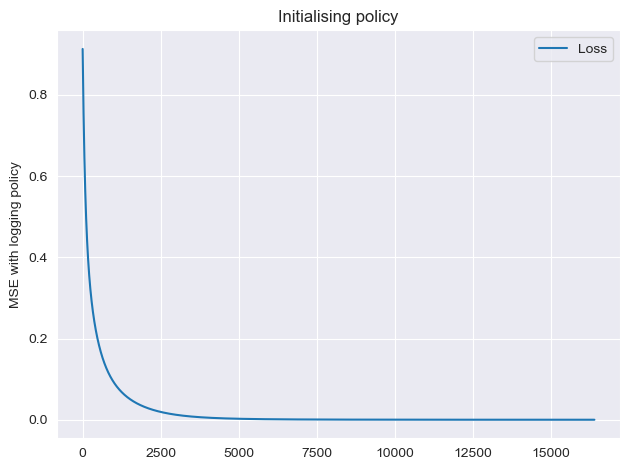

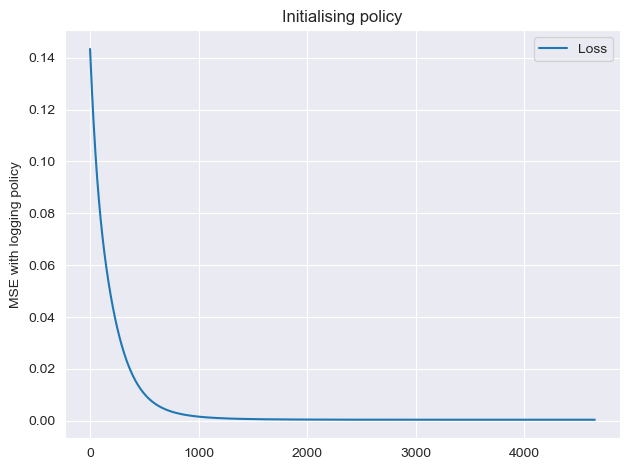

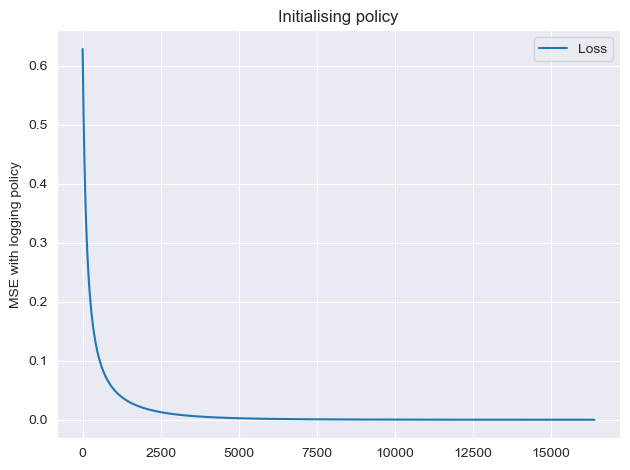

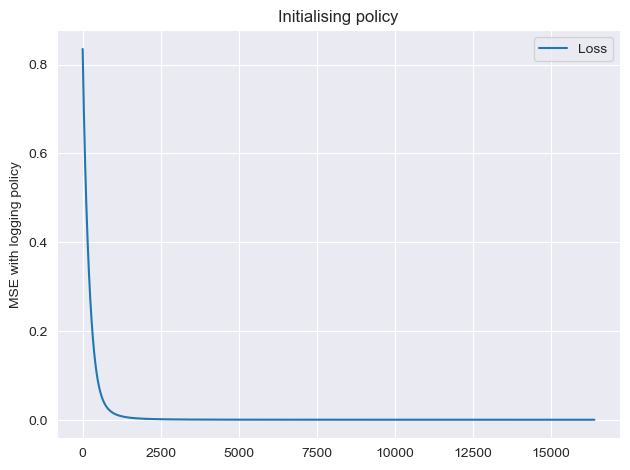

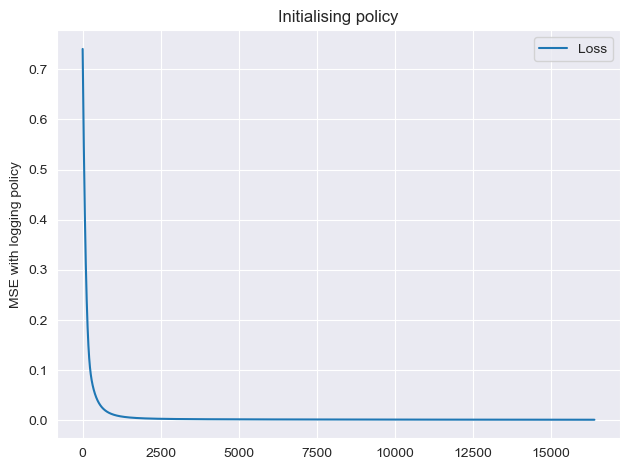

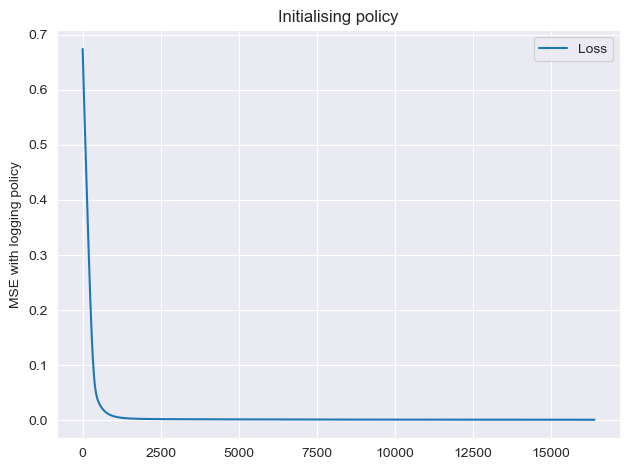

In [10]:
# Placeholders for output
auction_revenue = []
social_welfare = []
social_surplus = []
# Run repeated auctions
# This logic is encoded in the `simulation_run()` method in main.py
for i in tqdm(range(num_iter)):
    print( f'number of iteration: {i}\n')
    # Simulate impression opportunities
    for _ in range(rounds_per_iter):
        auction.simulate_opportunity()

    # Log 'Gross utility' or welfare
    social_welfare.append(sum([agent.gross_utility for agent in auction.agents]))

    # Log 'Net utility' or surplus
    social_surplus.append(sum([agent.net_utility for agent in auction.agents]))

    # Update agents (does nothing in this example, as we have truthful oracles)
    # Clear running metrics
    for agent_id, agent in enumerate(auction.agents):
        print(f'agent: {agent_id}\n' )
        agent.update(iteration=i)
        agent.clear_utility()
        agent.clear_logs()

    # Log revenue
    auction_revenue.append(auction.revenue)
    auction.clear_revenue()

# Rescale metrics per auction round
auction_revenue = np.array(auction_revenue) / rounds_per_iter
social_welfare = np.array(social_welfare) / rounds_per_iter
social_surplus = np.array(social_surplus) / rounds_per_iter

# Save Auction

In [12]:
pickle.dump(auction, open('DR_H_auction.pickle', 'wb'))

# Read Auction

In [3]:
auction = pickle.load(open('DR_H_auction.pickle', 'rb'))

# data generation

In [13]:
# just take the first agent's data (dont know is it correct)
# Q2 the bidder updates seems does not use the utilities but the estimated_CTRs instead
# it seems to only use the utilities to calculate the welfare and surplus
# Input: context
# Action: bid/ gamma
# Output: reward
trained_welfare = {}
trained_surplus = {}

offline_data = {'train':{}, 'val': {}, 'test':{}}


num_data = [80000, 10000, 10000]

for i, data_set in enumerate(offline_data.keys()):
    for _ in range(num_data[i]):
        auction.simulate_opportunity()
    print(auction.revenue)
    for agent_id, agent in enumerate(auction.agents):
        contexts = np.array(list(opp.context for opp in agent.logs))
        bids = np.array(list(opp.bid for opp in agent.logs))
        prices = np.array(list(opp.price for opp in agent.logs))
        second_prices = np.array(list(opp.second_price for opp in agent.logs))
        values = np.array(list(opp.value for opp in agent.logs))
        outcomes = np.array(list(opp.outcome for opp in agent.logs))
        won_mask = np.array(list(opp.won for opp in agent.logs))
        estimated_CTRs = np.array(list(opp.estimated_CTR for opp in agent.logs))
        true_CTRs = np.array(list(opp.true_CTR for opp in agent.logs))
        gammas = np.array(list(opp.detach().numpy() for opp in agent.bidder.gammas))
        utilities = np.zeros_like(values)
        utilities[won_mask] = (values[won_mask] * outcomes[won_mask]) - prices[won_mask]
        offline_data[data_set][agent_id] = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), gammas.reshape(-1,1), true_CTRs.reshape(-1,1), prices.reshape(-1, 1),second_prices.reshape(-1,1), won_mask.reshape(-1, 1),outcomes.reshape(-1, 1),utilities.reshape(-1, 1)))
        agent.clear_utility()
        agent.clear_logs()
        # may consider including estimated_CTRs as input features as well
    auction.clear_revenue()

40970.92571984728
5127.306286335648
5139.144337078962


# Save Data

In [14]:
data_dir = f"../data_{estimator}_{competition}/"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
for data_set in offline_data.keys():
    for agent_id in offline_data[data_set].keys():
        np.savetxt(f'{data_dir}{data_set}_{agent_id}.csv', offline_data[data_set][agent_id])

In [15]:
from split_data import split_data

In [16]:
# split_data
for data_set in offline_data.keys():
    for agent_id in offline_data[data_set].keys():
        split_data(estimator=estimator, competition=competition, data_set=data_set, agent_num=str(agent_id), row_num=1000, data_dir='/Users/keithwu/Documents/GitHub/auction-gym/data_DR_H/')

# Read data

In [5]:
offline_data_key = {'context': 0, 'estimated_CTR': 5, 'value': 6, 'bid': 7, 'gamma': 8, 'true_CTR': 9, 'price': 10, 'second_price': 11, 'won_mask': 12, 'outcome': 13, 'utility': 14}

In [6]:
def read_csv_game_record_auction(csv_dir):
    data = np.genfromtxt(csv_dir, delimiter=' ')
    return data

In [7]:
offline_data = {'train': {}, 'val': {},'test': {}}
for agent_id in range(agent_num):
    offline_data['train'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}/train_{agent_id}.csv")
    offline_data['val'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}/val_{agent_id}.csv")
    offline_data['test'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}/test_{agent_id}.csv")

# CUTree

In [17]:
# bid value
min_split_int = 50 # default value in Linear Model U Tree
for agent_id in offline_data['train'].keys():
    best_params_ = None
    best_score_ = -100
    for max_depth in [10, 20, 35]:

        problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=agent_id, split_size=1000)
        CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=10000)

        input_train_data = offline_data['train'][agent_id][:, :5]
        label_train_data = offline_data['train'][agent_id][:, 7]

        input_val_data = offline_data['val'][agent_id][:, :5]
        label_val_data = offline_data['val'][agent_id][:, 7]

        train_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}/', read_game_number=54, data_set='train')
        val_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}/', read_game_number=54, data_set='val')

        score = r2_score(label_val_data, val_preds)
        if score > best_score_:
            best_params_ = {'max_depth': max_depth}
            best_score_ = score
    print("Agent: ", agent_id)
    print("Param for GS", best_params_)
    #print("R2 score for GS", best_score_)

    # print("Train R2 score:", r2_score(label_train_data, train_preds))
    # print("Val R2 score:", r2_score(label_val_data, val_preds))
    # print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    # print("Val MSE: ", mean_squared_error(label_val_data, val_preds))

<ipykernel.iostream.OutStream object at 0x106e57b50> starting from 54
<ipykernel.iostream.OutStream object at 0x106e57b50> finishing read tree
<ipykernel.iostream.OutStream object at 0x106e57b50> starting from 54
<ipykernel.iostream.OutStream object at 0x106e57b50> finishing read tree
<ipykernel.iostream.OutStream object at 0x106e57b50> starting from 54
<ipykernel.iostream.OutStream object at 0x106e57b50> finishing read tree
<ipykernel.iostream.OutStream object at 0x106e57b50> starting from 54
<ipykernel.iostream.OutStream object at 0x106e57b50> finishing read tree
<ipykernel.iostream.OutStream object at 0x106e57b50> starting from 54
<ipykernel.iostream.OutStream object at 0x106e57b50> finishing read tree
<ipykernel.iostream.OutStream object at 0x106e57b50> starting from 54
<ipykernel.iostream.OutStream object at 0x106e57b50> finishing read tree
Agent:  0
Param for GS {'max_depth': 20}
<ipykernel.iostream.OutStream object at 0x106e57b50> starting from 54
<ipykernel.iostream.OutStream o

In [5]:
best_params_utree = {0: 20, 1: 10, 2: 35, 3:20, 4:20, 5: 20}

In [19]:
train_avg_r2_utree = []
train_avg_mse_utree = []

test_avg_r2_utree = []
test_avg_mse_utree = []

In [25]:
agent_id = 5
max_depth = 20
min_split_int = 50

problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=agent_id, split_size=1000,games_directory="../data_DR_L_split_1000/train/")
CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=10000, training_mode='')

input_train_data = offline_data['train'][agent_id][:, :5]
label_train_data = offline_data['train'][agent_id][:, 7]

input_test_data = offline_data['test'][agent_id][:, :5]
label_test_data = offline_data['test'][agent_id][:, 7]

train_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}/', read_game_number=54, data_set='train')
test_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}/', read_game_number=54, data_set='test')

print("Train R2 score:", r2_score(label_train_data, train_preds))
print("Test R2 score:", r2_score(label_test_data, test_preds))
print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
train_avg_r2_utree.append(r2_score(label_train_data, train_preds))
train_avg_mse_utree.append(mean_squared_error(label_train_data, train_preds))
test_avg_r2_utree.append(r2_score(label_test_data, test_preds))
test_avg_mse_utree.append(mean_squared_error(label_test_data, test_preds))

<ipykernel.iostream.OutStream object at 0x106e57b50> starting from 54
<ipykernel.iostream.OutStream object at 0x106e57b50> finishing read tree
<ipykernel.iostream.OutStream object at 0x106e57b50> starting from 54
<ipykernel.iostream.OutStream object at 0x106e57b50> finishing read tree
Train R2 score: 0.8868870495262496
Test R2 score: 0.8519612254623294
Train MSE:  0.0035776731884893304
Test MSE:  0.004802822074167439


In [26]:
print(statistics.mean(train_avg_r2_utree))
print(statistics.mean(train_avg_mse_utree))
print(statistics.mean(test_avg_r2_utree))
print(statistics.mean(test_avg_mse_utree))

0.8567083413157073
0.006124928922230648
0.8164990581343853
0.00796348038262615


# M5 Tree

In [39]:
# model = M5Prime(use_smoothing=True, use_pruning=False)
# for agent_id in offline_data['train'].keys():
#     input_train_data = offline_data['train'][agent_id][:, :5]
#     label_train_data = offline_data['train'][agent_id][:, 7]
#     print("Agent", agent_id)
#     best_estimator = model.fit(input_train_data, label_train_data)
#     input_test_data = offline_data['test'][agent_id][:, :5]
#     label_test_data = offline_data['test'][agent_id][:, 7]
#
#     train_preds = best_estimator.predict(input_train_data)
#     test_preds = best_estimator.predict(input_test_data)
#     print("Train R2 score:", r2_score(label_train_data, train_preds))
#     print("Test R2 score:", r2_score(label_test_data, test_preds))
#     print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
#     print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

In [27]:
param_grid = {
    'max_depth': [ 10, 20, 35],
    #'min_samples_split': [2, 4, 10, 20, 50],
}

In [28]:
def gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data):
    best_params_ = None
    best_score_ = -100
    for max_depth in param_grid['max_depth']:
        #for min_samples_split in param_grid['min_samples_split']:
        model = model_class(max_depth= max_depth, random_state=0)
        model.fit(input_train_data, label_train_data)
        score = model.score(input_val_data, label_val_data)
        if score > best_score_:
            best_params_ = {'max_depth': max_depth}
            best_score_ = score


    print("Param for GS", best_params_)
    print("R2 score for GS", best_score_)
    best_model = model_class(**best_params_, random_state=0)
    return best_model

In [29]:
model_class = M5Prime
# without smoothing
context_bid_estimators_M5Tree = {}

train_avg_r2_m5 = []
train_avg_mse_m5 = []

test_avg_r2_m5 = []
test_avg_mse_m5 = []
# context with bid
for agent_id in offline_data['train'].keys():
    print("Agent", agent_id)
    input_train_data = offline_data['train'][agent_id][:, :5]
    label_train_data = offline_data['train'][agent_id][:, 7]
    input_val_data = offline_data['val'][agent_id][:, :5]
    label_val_data = offline_data['val'][agent_id][:, 7]
    input_test_data = offline_data['test'][agent_id][:, :5]
    label_test_data = offline_data['test'][agent_id][:, 7]

    best_estimator = gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data)
    best_estimator.fit(input_train_data, label_train_data)
    print("Train R2 score:", best_estimator.score(input_train_data, label_train_data))
    train_avg_r2_m5.append(best_estimator.score(input_train_data, label_train_data))
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))
    test_avg_r2_m5.append(best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds = best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    train_avg_mse_m5.append(mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    test_avg_mse_m5.append(mean_squared_error(label_test_data, test_preds))
    context_bid_estimators_M5Tree[agent_id] = best_estimator

Agent 0
Param for GS {'max_depth': 35}
R2 score for GS 0.8915340345708169
Train R2 score: 0.9250122269174312
Test R2 score: 0.8936723316863546
Train MSE:  0.0023984457786001313
Test MSE:  0.00347099967607448
Agent 1
Param for GS {'max_depth': 20}
R2 score for GS 0.7194433866253223
Train R2 score: 0.7933573149185859
Test R2 score: 0.6694936350659394
Train MSE:  0.008648938271467737
Test MSE:  0.013762198352473881
Agent 2
Param for GS {'max_depth': 35}
R2 score for GS 0.9548261727493188
Train R2 score: 0.9622832896610415
Test R2 score: 0.9494938648177876
Train MSE:  0.0020250060236007227
Test MSE:  0.0027812440245972674
Agent 3
Param for GS {'max_depth': 35}
R2 score for GS 0.9207740072734591
Train R2 score: 0.945288058066966
Test R2 score: 0.9233465361057439
Train MSE:  0.0024301220394709134
Test MSE:  0.0034398704585827103
Agent 4
Param for GS {'max_depth': 35}
R2 score for GS 0.821890091623815
Train R2 score: 0.886638100924895
Test R2 score: 0.8338766116734129
Train MSE:  0.0061023238

In [30]:
print(statistics.mean(train_avg_r2_m5))
print(statistics.mean(test_avg_r2_m5))
print(statistics.mean(train_avg_mse_m5))
print(statistics.mean(test_avg_mse_m5))

0.9067158003008627
0.8617471204644538
0.0039818546170533944
0.005934265255353335


In [31]:
# context with bid
model_class = tree.DecisionTreeRegressor
context_bid_estimators_rTree = {}
train_avg_r2_rtree = []
train_avg_mse_rtree = []

test_avg_r2_rtree = []
test_avg_mse_rtree = []
for agent_id in offline_data['train'].keys():
    print("Agent", agent_id)
    input_train_data = offline_data['train'][agent_id][:, :5]
    label_train_data = offline_data['train'][agent_id][:, 7]
    input_val_data = offline_data['val'][agent_id][:, :5]
    label_val_data = offline_data['val'][agent_id][:, 7]
    input_test_data = offline_data['test'][agent_id][:, :5]
    label_test_data = offline_data['test'][agent_id][:, 7]

    best_estimator = gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data)
    best_estimator.fit(input_train_data, label_train_data)
    print("Train R2 score:", best_estimator.score(input_train_data, label_train_data))
    train_avg_r2_rtree.append(best_estimator.score(input_train_data, label_train_data))
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))
    test_avg_r2_rtree.append(best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds = best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    train_avg_mse_rtree.append(mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    test_avg_mse_rtree.append(mean_squared_error(label_test_data, test_preds))
    context_bid_estimators_rTree[agent_id] = best_estimator

Agent 0
Param for GS {'max_depth': 10}
R2 score for GS 0.8130659192790568
Train R2 score: 0.8642730565952614
Test R2 score: 0.8191426094314155
Train MSE:  0.004341157245634567
Test MSE:  0.005903975456580858
Agent 1
Param for GS {'max_depth': 10}
R2 score for GS 0.642667214781969
Train R2 score: 0.7334015959996802
Test R2 score: 0.6004414227939151
Train MSE:  0.011158358393195164
Test MSE:  0.01663751436084887
Agent 2
Param for GS {'max_depth': 35}
R2 score for GS 0.9057986826052569
Train R2 score: 0.9999999598524909
Test R2 score: 0.9021700034302076
Train MSE:  2.155515338494788e-09
Test MSE:  0.005387248349224961
Agent 3
Param for GS {'max_depth': 35}
R2 score for GS 0.8593997953163148
Train R2 score: 0.9999315121119656
Test R2 score: 0.8741998847982015
Train MSE:  3.042003633372357e-06
Test MSE:  0.00564535609983562
Agent 4
Param for GS {'max_depth': 10}
R2 score for GS 0.7102997062681612
Train R2 score: 0.8039945826163856
Test R2 score: 0.7188223771681721
Train MSE:  0.010551062956

In [32]:
print(statistics.mean(train_avg_r2_rtree))
print(statistics.mean(test_avg_r2_rtree))
print(statistics.mean(train_avg_mse_rtree))
print(statistics.mean(test_avg_mse_rtree))

0.8979629699154293
0.7885710969184405
0.004415138293776279
0.009105207295746135


In [9]:
# M5Tree
model_class = M5Prime
context_bid_estimators_M5Tree = {}
best_params = {0: 35, 1: 20, 2: 35, 3: 35, 4: 35, 5: 35}
for agent_id in offline_data['train'].keys():
    best_estimator = model_class(max_depth= best_params[agent_id], random_state=0)
    best_estimator.fit(offline_data['train'][agent_id][:, :5], offline_data['train'][agent_id][:, 7])
    context_bid_estimators_M5Tree[agent_id] = best_estimator

# RTree
model_class = tree.DecisionTreeRegressor
context_bid_estimators_rTree = {}
best_params = {0: 10, 1: 10, 2: 35, 3: 35, 4: 10, 5: 20}
for agent_id in offline_data['train'].keys():
    best_estimator = model_class(max_depth= best_params[agent_id], random_state=0)
    best_estimator.fit(offline_data['train'][agent_id][:, :5], offline_data['train'][agent_id][:, 7])
    context_bid_estimators_rTree[agent_id] = best_estimator

In [10]:
def utree_wrapper_predict_flex(contexts, agent_id, max_depth):
    min_split_int = 50
    read_game_number = 54
    utree_save_path = f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/'
    problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=agent_id, split_size=1000)
    CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=10000)
    utree = pickle.load(open(utree_save_path + 'pickle_Game_File_' + str(read_game_number) + '.p', 'rb'))
    return CUTreeAgent.predict(contexts, utree)

In [11]:
def utree_wrapper_model(agent_id, max_depth):
    min_split_int = 50
    read_game_number = 54
    utree_save_path = f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/'
    problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=agent_id, split_size=1000)
    CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=10000)
    utree = pickle.load(open(utree_save_path + 'pickle_Game_File_' + str(read_game_number) + '.p', 'rb'))
    return CUTreeAgent, utree

In [12]:
original_auction = pickle.load(open('DR_H_auction.pickle', 'rb'))
original_agents = deepcopy(original_auction.agents)
rng = original_auction.rng

In [16]:
def get_surrogate_utilities_utree(offline_data, offline_data_key ,context_num=5):
    surrogate_utilities = {}
    avg_r2 = []
    for agent_id in offline_data['train'].keys():
        surrogate_logs = {'outcomes':[], 'won_mask':[], 'prices':[]}
        data_set = 'test'
        surrogate_agent_id = agent_id

        surrogate_bid = utree_wrapper_predict_flex(offline_data[data_set][surrogate_agent_id][:, :context_num], agent_id, best_params_utree[agent_id])
        for i in range(len(offline_data[data_set][surrogate_agent_id])):
            # win_mask
            if offline_data[data_set][surrogate_agent_id][i, offline_data_key['won_mask']] == 1:
                if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['bid']]) or (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['second_price']]):
                    surrogate_logs['won_mask'].append(True)
                    surrogate_logs['outcomes'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['outcome']])
                    surrogate_logs['prices'].append(surrogate_bid[i])
                else:
                    surrogate_logs['won_mask'].append(False)
                    surrogate_logs['outcomes'].append(0)
                    surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])
            else:
                if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']]):
                    surrogate_logs['won_mask'].append(True)
                    # This creates randomness in the surrogate model
                    outcome = rng.binomial(1, offline_data[data_set][surrogate_agent_id][i, offline_data_key['true_CTR']])
                    surrogate_logs['outcomes'].append(outcome)
                    surrogate_logs['prices'].append(surrogate_bid[i])
                else:
                    surrogate_logs['won_mask'].append(False)
                    surrogate_logs['outcomes'].append(0)
                    surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])

        surrogate_won_mask = np.array(surrogate_logs['won_mask'])
        surrogate_outcomes = np.array(surrogate_logs['outcomes'])
        surrogate_prices = np.array(surrogate_logs['prices'])
        surrogate_utilities[agent_id] = np.zeros_like(offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']])
        surrogate_utilities[agent_id][surrogate_won_mask] = (offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']][surrogate_won_mask] * surrogate_outcomes[surrogate_won_mask]) - surrogate_prices[surrogate_won_mask]
        print(f"Agent: {agent_id}")
        print(f"Original utility: {offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']].mean()}")
        print(f"Surrogate utility: {surrogate_utilities[agent_id].mean()}" )
        print(f"R2 score: {r2_score(offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities[agent_id])}")
        avg_r2.append(r2_score(offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities[agent_id]))
    return surrogate_utilities, statistics.mean(avg_r2)

In [17]:
def get_surrogate_utilities(context_bid_estimators,  offline_data, offline_data_key ,context_num=5):
    surrogate_utilities = {}
    avg_r2 = []
    for agent_id in offline_data['train'].keys():
        surrogate_logs = {'outcomes':[], 'won_mask':[], 'prices':[]}
        data_set = 'test'
        surrogate_agent_id = agent_id
        surrogate_bid = context_bid_estimators[surrogate_agent_id].predict(offline_data[data_set][surrogate_agent_id][:, :context_num])
        for i in range(len(offline_data[data_set][surrogate_agent_id])):
            # win_mask
            if offline_data[data_set][surrogate_agent_id][i, offline_data_key['won_mask']] == 1:
                if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['bid']]) or (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['second_price']]):
                    surrogate_logs['won_mask'].append(True)
                    surrogate_logs['outcomes'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['outcome']])
                    surrogate_logs['prices'].append(surrogate_bid[i])
                else:
                    surrogate_logs['won_mask'].append(False)
                    surrogate_logs['outcomes'].append(0)
                    surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])
            else:
                if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']]):
                    surrogate_logs['won_mask'].append(True)
                    # This creates randomness in the surrogate model
                    outcome = rng.binomial(1, offline_data[data_set][surrogate_agent_id][i, offline_data_key['true_CTR']])
                    surrogate_logs['outcomes'].append(outcome)
                    surrogate_logs['prices'].append(surrogate_bid[i])
                else:
                    surrogate_logs['won_mask'].append(False)
                    surrogate_logs['outcomes'].append(0)
                    surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])

        surrogate_won_mask = np.array(surrogate_logs['won_mask'])
        surrogate_outcomes = np.array(surrogate_logs['outcomes'])
        surrogate_prices = np.array(surrogate_logs['prices'])
        surrogate_utilities[agent_id] = np.zeros_like(offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']])
        surrogate_utilities[agent_id][surrogate_won_mask] = (offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']][surrogate_won_mask] * surrogate_outcomes[surrogate_won_mask]) - surrogate_prices[surrogate_won_mask]
        print(f"Agent: {agent_id}")
        print(f"Original utility: {offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']].mean()}")
        print(f"Surrogate utility: {surrogate_utilities[agent_id].mean()}" )
        print(f"R2 score: {r2_score(offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities[agent_id])}")
        avg_r2.append(r2_score(offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities[agent_id]))
    return surrogate_utilities, statistics.mean(avg_r2)

In [18]:
def print_agent_replace_metric(surrogate_avg_r2, surrogate_utilities, offline_data):
    print("R2")
    print(surrogate_avg_r2)
    surrogate_sum_utilities = 0
    perc_chg_utilities = []

    for agent_id in offline_data['train'].keys():
        surrogate_sum_utilities += surrogate_utilities[agent_id].sum()
    print("surrogate")
    print(surrogate_sum_utilities/10000)
    sum_utilities_DR = 0
    for agent_id in offline_data['train'].keys():
        sum_utilities_DR += offline_data['test'][agent_id][:, offline_data_key['utility']].sum()
        perc_chg_utilities.append((surrogate_utilities[agent_id].sum() - offline_data['test'][agent_id][:, offline_data_key['utility']].sum())/ offline_data['test'][agent_id][:, offline_data_key['utility']].sum())
    print("DR")
    print(sum_utilities_DR/10000)
    print("% change in social surplus")
    print((surrogate_sum_utilities-sum_utilities_DR)/sum_utilities_DR*100)
    print("Avg % change in net utility")
    print(statistics.mean(perc_chg_utilities)*100)

In [19]:
surrogate_utilities_utree, surrogate_avg_r2_utree =get_surrogate_utilities_utree(offline_data=offline_data,offline_data_key=offline_data_key,context_num=5)

Agent: 0
Original utility: 0.04681886507063396
Surrogate utility: 0.045901661530800525
R2 score: 0.8601611423412963
Agent: 1
Original utility: 0.025709505420716067
Surrogate utility: 0.01988681146264381
R2 score: 0.6190321886973627
Agent: 2
Original utility: 0.013194648564209181
Surrogate utility: 0.012128020902959682
R2 score: 0.7391847629434034
Agent: 3
Original utility: 0.08031928068249507
Surrogate utility: 0.07877788602250041
R2 score: 0.8006525105302899
Agent: 4
Original utility: 0.008707351234502756
Surrogate utility: 0.006753324883699561
R2 score: 0.8118726555889643
Agent: 5
Original utility: 0.04276510800530097
Surrogate utility: 0.03879206020229215
R2 score: 0.8796912901694612


In [20]:
print_agent_replace_metric(surrogate_avg_r2_utree, surrogate_utilities_utree, offline_data)

R2
0.7850990917117963
surrogate
0.13468522992740453
DR
0.14489609171158965
% change in social surplus
-7.047023603997172
Avg % change in net utility
-11.056907981825995


In [21]:
surrogate_utilities_rtree, surrogate_avg_r2_rtree =get_surrogate_utilities(context_bid_estimators_rTree, offline_data=offline_data,offline_data_key=offline_data_key,context_num=5)

Agent: 0
Original utility: 0.04681886507063396
Surrogate utility: 0.040928005737041064
R2 score: 0.7645037696840514
Agent: 1
Original utility: 0.025709505420716067
Surrogate utility: 0.01915572378223816
R2 score: 0.4953432227033945
Agent: 2
Original utility: 0.013194648564209181
Surrogate utility: 0.010672272775308488
R2 score: 0.7158980336438239
Agent: 3
Original utility: 0.08031928068249507
Surrogate utility: 0.07662739653705923
R2 score: 0.8062348465293381
Agent: 4
Original utility: 0.008707351234502756
Surrogate utility: 0.0030973641094568234
R2 score: 0.7075784666396403
Agent: 5
Original utility: 0.04276510800530097
Surrogate utility: 0.0408191033810821
R2 score: 0.8420511846916732


In [22]:
print_agent_replace_metric(surrogate_avg_r2_rtree, surrogate_utilities_rtree, offline_data)

R2
0.7219349206486536
surrogate
0.12739462902311735
DR
0.14489609171158965
% change in social surplus
-12.078629921439365
Avg % change in net utility
-21.794281700721793


In [23]:
surrogate_utilities_m5tree, surrogate_avg_r2_m5tree =get_surrogate_utilities(context_bid_estimators_M5Tree, offline_data=offline_data,offline_data_key=offline_data_key,context_num=5)

Agent: 0
Original utility: 0.04681886507063396
Surrogate utility: 0.04445977523084596
R2 score: 0.8844452207353942
Agent: 1
Original utility: 0.025709505420716067
Surrogate utility: 0.020972914173869785
R2 score: 0.6844913922726413
Agent: 2
Original utility: 0.013194648564209181
Surrogate utility: 0.013406803706500416
R2 score: 0.8233496436149409
Agent: 3
Original utility: 0.08031928068249507
Surrogate utility: 0.0778178361898444
R2 score: 0.8337237567321628
Agent: 4
Original utility: 0.008707351234502756
Surrogate utility: 0.00885247748182272
R2 score: 0.8583314806692046
Agent: 5
Original utility: 0.04276510800530097
Surrogate utility: 0.04402629127572416
R2 score: 0.9124409058513006


In [24]:
print_agent_replace_metric(surrogate_avg_r2_m5tree, surrogate_utilities_m5tree, offline_data)

R2
0.8327970666459408
surrogate
0.13954171415232505
DR
0.14489609171158965
% change in social surplus
-3.695322279583832
Avg % change in net utility
-3.3921576531245528


# Auction with original model

In [13]:
# Auction with original model
auction_trained = deepcopy(original_auction)
# Placeholders for output
auction_revenue_trained = []
social_welfare_trained = []
social_surplus_trained = []
rounds_per_iter = 10000
utilities_trained ={key: 0 for key in range(6)}

for i in tqdm(range(3)):
    for _ in range(rounds_per_iter):
        # Simulate impression opportunities
        auction_trained.simulate_opportunity()

# Log 'Gross utility' or welfare
    social_welfare_trained.append(sum([agent.gross_utility for agent in auction_trained.agents]))

    # Log 'Net utility' or surplus
    social_surplus_trained.append(sum([agent.net_utility for agent in auction_trained.agents]))

    # Update agents (does nothing in this example, as we have truthful oracles)
    # Clear running metrics
    for agent_id, agent in enumerate(auction_trained.agents):
        print(f'agent: {agent_id}\n' )
        utilities_trained[agent_id]+= agent.net_utility
        agent.clear_utility()
        agent.clear_logs()

    # Log revenue
    auction_revenue_trained.append(auction_trained.revenue)
    auction_trained.clear_revenue()

# Rescale metrics per auction round
auction_revenue_trained = np.array(auction_revenue_trained) / rounds_per_iter
social_welfare_trained = np.array(social_welfare_trained) / rounds_per_iter
social_surplus_trained = np.array(social_surplus_trained) / rounds_per_iter
print(auction_revenue_trained.mean())
print(social_welfare_trained.mean())
print(social_surplus_trained.mean())

  0%|          | 0/3 [00:00<?, ?it/s]

agent: 0

agent: 1

agent: 2

agent: 3

agent: 4

agent: 5

agent: 0

agent: 1

agent: 2

agent: 3

agent: 4

agent: 5

agent: 0

agent: 1

agent: 2

agent: 3

agent: 4

agent: 5

0.5118348827458297
0.6497449096644305
0.13791002691859958


In [50]:
def surrogate_agent_utree(auction, agents,  rounds_per_iter=10000, rng=None):
    auction_surrogate = deepcopy(auction)
    utilities_dict = {
    'Agent 0 Replaced': {key: 0 for key in range(6)},
    'Agent 1 Replaced': {key: 0 for key in range(6)},
    'Agent 2 Replaced': {key: 0 for key in range(6)},
    'Agent 3 Replaced': {key: 0 for key in range(6)},
    'Agent 4 Replaced': {key: 0 for key in range(6)},
    'Agent 5 Replaced': {key: 0 for key in range(6)}
    }
    avg_auction_revenue_surrogate = []
    avg_social_welfare_surrogate = []
    avg_social_surplus_surrogate = []
    for replacing_agent_id in range(6):
        print(f'replacing agent: {replacing_agent_id}\n')
        check_data = {}
        agents_surrogate = deepcopy(agents)
        #agents are still the trained agents from black box
        utree_model, utree = utree_wrapper_model(replacing_agent_id, best_params_utree[replacing_agent_id])
        agents_surrogate[replacing_agent_id].bidder = SurrogateBidder_utree(rng=rng, model=utree_model, utree=utree)
        for agent_id in range(6):
            print(agents_surrogate[agent_id].bidder)

        auction_surrogate.agents = agents_surrogate

        # Placeholders for output
        auction_revenue_surrogate = []
        social_welfare_surrogate = []
        social_surplus_surrogate = []
        # Run repeated auctions
        # This logic is encoded in the `simulation_run()` method in main.py

        for i in tqdm(range(3)):
            for _ in range(rounds_per_iter):
                # Simulate impression opportunities
                auction_surrogate.simulate_opportunity()

            # Log 'Gross utility' or welfare
            social_welfare_surrogate.append(sum([agent.gross_utility for agent in auction_surrogate.agents]))

            # Log 'Net utility' or surplus
            social_surplus_surrogate.append(sum([agent.net_utility for agent in auction_surrogate.agents]))

            # Update agents (does nothing in this example, as we have truthful oracles)
            # Clear running metrics
            for agent_id, agent in enumerate(auction_surrogate.agents):
                contexts = np.array(list(opp.context for opp in agent.logs))
                bids = np.array(list(opp.bid for opp in agent.logs))
                prices = np.array(list(opp.price for opp in agent.logs))
                second_prices = np.array(list(opp.second_price for opp in agent.logs))
                values = np.array(list(opp.value for opp in agent.logs))
                outcomes = np.array(list(opp.outcome for opp in agent.logs))
                won_mask = np.array(list(opp.won for opp in agent.logs))
                estimated_CTRs = np.array(list(opp.estimated_CTR for opp in agent.logs))
                true_CTRs = np.array(list(opp.true_CTR for opp in agent.logs))
                #gammas = np.array(list(opp.detach().numpy() for opp in agent.bidder.gammas))
                utilities = np.zeros_like(values)
                utilities[won_mask] = (values[won_mask] * outcomes[won_mask]) - prices[won_mask]
                check_data[agent_id] = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), bids.reshape(-1, 1), true_CTRs.reshape(-1,1), prices.reshape(-1, 1),second_prices.reshape(-1,1), won_mask.reshape(-1, 1),outcomes.reshape(-1, 1),utilities.reshape(-1, 1)))
                utilities_dict[f'Agent {replacing_agent_id} Replaced'][agent_id]+= agent.net_utility
                agent.clear_utility()
                agent.clear_logs()

            # Log revenue
            auction_revenue_surrogate.append(auction_surrogate.revenue)
            auction_surrogate.clear_revenue()

        # Rescale metrics per auction round
        auction_revenue_surrogate = np.array(auction_revenue_surrogate) / rounds_per_iter
        social_welfare_surrogate = np.array(social_welfare_surrogate) / rounds_per_iter
        social_surplus_surrogate = np.array(social_surplus_surrogate) / rounds_per_iter

        print(auction_revenue_surrogate.mean())
        print(social_welfare_surrogate.mean())
        print(social_surplus_surrogate.mean())
        avg_auction_revenue_surrogate.append(auction_revenue_surrogate.mean())
        avg_social_welfare_surrogate.append(social_welfare_surrogate.mean())
        avg_social_surplus_surrogate.append(social_surplus_surrogate.mean())

    print('**********************************')
    print(f'Avg. Auction Revenue over 3 replacements {np.array(avg_auction_revenue_surrogate).mean()}')
    print(f'Avg. Social Welfare over 3 replacements {np.array(avg_social_welfare_surrogate).mean()}')
    print(f'Avg. Social Surplus over 3 replacements {np.array(avg_social_surplus_surrogate).mean()}')

    return check_data, utilities_dict

In [42]:
def surrogate_agent(auction, agents, context_bid_estimators, rounds_per_iter=10000, rng=None):
    auction_surrogate = deepcopy(auction)
    utilities_dict = {
    'Agent 0 Replaced': {key: 0 for key in range(6)},
    'Agent 1 Replaced': {key: 0 for key in range(6)},
    'Agent 2 Replaced': {key: 0 for key in range(6)},
    'Agent 3 Replaced': {key: 0 for key in range(6)},
    'Agent 4 Replaced': {key: 0 for key in range(6)},
    'Agent 5 Replaced': {key: 0 for key in range(6)}
    }
    avg_auction_revenue_surrogate = []
    avg_social_welfare_surrogate = []
    avg_social_surplus_surrogate = []
    for replacing_agent_id in range(6):
        print(f'replacing agent: {replacing_agent_id}\n')
        check_data = {}
        agents_surrogate = deepcopy(agents)
        #agents are still the trained agents from black box
        agents_surrogate[replacing_agent_id].bidder = SurrogateBidder(rng=rng, model=context_bid_estimators[replacing_agent_id])
        for agent_id in range(6):
            print(agents_surrogate[agent_id].bidder)

        auction_surrogate.agents = agents_surrogate

        # Placeholders for output
        auction_revenue_surrogate = []
        social_welfare_surrogate = []
        social_surplus_surrogate = []
        # Run repeated auctions
        # This logic is encoded in the `simulation_run()` method in main.py

        for i in tqdm(range(3)):
            for _ in range(rounds_per_iter):
                # Simulate impression opportunities
                auction_surrogate.simulate_opportunity()

            # Log 'Gross utility' or welfare
            social_welfare_surrogate.append(sum([agent.gross_utility for agent in auction_surrogate.agents]))

            # Log 'Net utility' or surplus
            social_surplus_surrogate.append(sum([agent.net_utility for agent in auction_surrogate.agents]))

            # Update agents (does nothing in this example, as we have truthful oracles)
            # Clear running metrics
            for agent_id, agent in enumerate(auction_surrogate.agents):
                contexts = np.array(list(opp.context for opp in agent.logs))
                bids = np.array(list(opp.bid for opp in agent.logs))
                prices = np.array(list(opp.price for opp in agent.logs))
                second_prices = np.array(list(opp.second_price for opp in agent.logs))
                values = np.array(list(opp.value for opp in agent.logs))
                outcomes = np.array(list(opp.outcome for opp in agent.logs))
                won_mask = np.array(list(opp.won for opp in agent.logs))
                estimated_CTRs = np.array(list(opp.estimated_CTR for opp in agent.logs))
                true_CTRs = np.array(list(opp.true_CTR for opp in agent.logs))
                #gammas = np.array(list(opp.detach().numpy() for opp in agent.bidder.gammas))
                utilities = np.zeros_like(values)
                utilities[won_mask] = (values[won_mask] * outcomes[won_mask]) - prices[won_mask]
                check_data[agent_id] = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), bids.reshape(-1, 1), true_CTRs.reshape(-1,1), prices.reshape(-1, 1),second_prices.reshape(-1,1), won_mask.reshape(-1, 1),outcomes.reshape(-1, 1),utilities.reshape(-1, 1)))
                utilities_dict[f'Agent {replacing_agent_id} Replaced'][agent_id]+= agent.net_utility
                agent.clear_utility()
                agent.clear_logs()

            # Log revenue
            auction_revenue_surrogate.append(auction_surrogate.revenue)
            auction_surrogate.clear_revenue()

        # Rescale metrics per auction round
        auction_revenue_surrogate = np.array(auction_revenue_surrogate) / rounds_per_iter
        social_welfare_surrogate = np.array(social_welfare_surrogate) / rounds_per_iter
        social_surplus_surrogate = np.array(social_surplus_surrogate) / rounds_per_iter

        print(auction_revenue_surrogate.mean())
        print(social_welfare_surrogate.mean())
        print(social_surplus_surrogate.mean())
        avg_auction_revenue_surrogate.append(auction_revenue_surrogate.mean())
        avg_social_welfare_surrogate.append(social_welfare_surrogate.mean())
        avg_social_surplus_surrogate.append(social_surplus_surrogate.mean())

    print('**********************************')
    print(f'Avg. Auction Revenue over 3 replacements {np.array(avg_auction_revenue_surrogate).mean()}')
    print(f'Avg. Social Welfare over 3 replacements {np.array(avg_social_welfare_surrogate).mean()}')
    print(f'Avg. Social Surplus over 3 replacements {np.array(avg_social_surplus_surrogate).mean()}')

    return check_data, utilities_dict

In [43]:
surrogate_agent_rTree, utilities_dict_rTree = surrogate_agent(original_auction, original_agents, context_bid_estimators_rTree, rounds_per_iter=10000, rng=original_auction.rng)

replacing agent: 0



  0%|          | 0/3 [00:00<?, ?it/s]

0.5107484996958994
0.647745888646089
0.1369973889501905
replacing agent: 1



  0%|          | 0/3 [00:00<?, ?it/s]

0.5105426307043353
0.6427115071497816
0.13216887644544384
replacing agent: 2



  0%|          | 0/3 [00:00<?, ?it/s]

0.5127603736314649
0.6499707575657115
0.13721038393424528
replacing agent: 3



  0%|          | 0/3 [00:00<?, ?it/s]

0.5105791441759564
0.6468268218919818
0.1362476777160255
replacing agent: 4



  0%|          | 0/3 [00:00<?, ?it/s]

0.5089054888050418
0.6441150224929767
0.13520953368793254
replacing agent: 5



  0%|          | 0/3 [00:00<?, ?it/s]

0.5124473289186591
0.6446298626021939
0.13218253368353475
**********************************
Avg. Auction Revenue over 3 replacements 0.5109972443218928
Avg. Social Welfare over 3 replacements 0.6459999767247891
Avg. Social Surplus over 3 replacements 0.1350027324028954


In [44]:
df_utilities_dict_rTree = pd.DataFrame(utilities_dict_rTree)
df_utilities_dict_rTree.index = [f"Agent{i}" for i in df_utilities_dict_rTree.index]
df_utilities_dict_rTree /= 3
print(df_utilities_dict_rTree)

        Agent 0 Replaced  Agent 1 Replaced  Agent 2 Replaced  \
Agent0        279.699234        292.017848        304.229948   
Agent1        143.734153         96.727175        165.727643   
Agent2         83.869689        103.253440         94.935865   
Agent3        482.623427        511.300600        475.349217   
Agent4         89.727840         61.549612         60.934341   
Agent5        290.319547        256.840089        270.926826   

        Agent 3 Replaced  Agent 4 Replaced  Agent 5 Replaced  
Agent0        299.801659        295.622749        307.288132  
Agent1        156.938697        152.820673        147.541878  
Agent2        100.331375         96.045743         99.936475  
Agent3        454.178659        485.934567        468.222043  
Agent4         62.537087         51.986396         56.921387  
Agent5        288.689300        269.685210        241.915422  


In [45]:
surrogate_agent_m5, utilities_dict_m5 = surrogate_agent(original_auction, original_agents, context_bid_estimators_M5Tree, rounds_per_iter=10000, rng=original_auction.rng)

replacing agent: 0



  0%|          | 0/3 [00:00<?, ?it/s]

0.5104405009314152
0.6497087429501414
0.1392682420187263
replacing agent: 1



  0%|          | 0/3 [00:00<?, ?it/s]

0.5097126331555781
0.6446038865761394
0.13489125342056174
replacing agent: 2



  0%|          | 0/3 [00:00<?, ?it/s]

0.5117110182901022
0.6528116024019305
0.14110058411182827
replacing agent: 3



  0%|          | 0/3 [00:00<?, ?it/s]

0.5091184278132078
0.6483615063712871
0.13924307855807866
replacing agent: 4



  0%|          | 0/3 [00:00<?, ?it/s]

0.5086973504318252
0.6465515971708076
0.13785424673898214
replacing agent: 5



  0%|          | 0/3 [00:00<?, ?it/s]

0.5115526451771591
0.6456462268697635
0.13409358169260457
**********************************
Avg. Auction Revenue over 3 replacements 0.5102054292998813
Avg. Social Welfare over 3 replacements 0.6479472603900116
Avg. Social Surplus over 3 replacements 0.1377418310901303


In [46]:
utilities_dict_m5

{'Agent 0 Replaced': {0: 887.9797978968508,
  1: 429.0853093986315,
  2: 256.1614111943173,
  3: 1447.6994829673772,
  4: 271.9329005404753,
  5: 885.1883585641372},
 'Agent 1 Replaced': {0: 908.0168293676468,
  1: 367.40559989602417,
  2: 303.8250494429127,
  3: 1547.6909072893095,
  4: 147.88167470174758,
  5: 771.9175419192118},
 'Agent 2 Replaced': {0: 909.4165587511895,
  1: 509.6080281317947,
  2: 305.3484519530791,
  3: 1456.486462712887,
  4: 202.51679278515775,
  5: 849.6412290207401},
 'Agent 3 Replaced': {0: 908.8301418985891,
  1: 477.6792289226436,
  2: 302.57167765783214,
  3: 1432.3387875841515,
  4: 192.04694208778625,
  5: 863.8255785913573},
 'Agent 4 Replaced': {0: 872.0635608352368,
  1: 450.32797610011585,
  2: 291.77031800718896,
  3: 1462.0499843878765,
  4: 271.43593757960366,
  5: 787.9796252594424},
 'Agent 5 Replaced': {0: 913.544672563824,
  1: 456.21772091300704,
  2: 293.33406993458647,
  3: 1440.6968857682027,
  4: 159.09070121346062,
  5: 759.92340038505

In [14]:
utilities_trained

{0: 902.5127199753483,
 1: 411.9910453377047,
 2: 252.4381933988363,
 3: 1423.7520658673368,
 4: 289.32844371578517,
 5: 857.2783392629758}

In [20]:
for x in utilities_trained:
    print(utilities_trained[x]/3)

300.8375733251161
137.33034844590156
84.14606446627876
474.58402195577895
96.4428145719284
285.75944642099194


In [47]:
utilities_dict_m5
df_utilities_dict_m5 = pd.DataFrame(utilities_dict_m5)
df_utilities_dict_m5.index = [f"Agent{i}" for i in df_utilities_dict_m5.index]
df_utilities_dict_m5 /= 3

In [48]:
df_utilities_dict_m5

,Agent 0 Replaced,Agent 1 Replaced,Agent 2 Replaced,Agent 3 Replaced,Agent 4 Replaced,Agent 5 Replaced
Agent0,295.993266,302.672276,303.138853,302.943381,290.687854,304.514891
Agent1,143.028436,122.468533,169.869343,159.226410,150.109325,152.072574
Agent2,85.387137,101.275016,101.782817,100.857226,97.256773,97.778023
Agent3,482.566494,515.896969,485.495488,477.446263,487.349995,480.232295
Agent4,90.644300,49.293892,67.505598,64.015647,90.478646,53.030234
Agent5,295.062786,257.305847,283.213743,287.941860,262.659875,253.307800


In [51]:
surrogate_agent_uTree, utilities_dict_uTree = surrogate_agent_utree(original_auction, original_agents, rounds_per_iter=10000, rng=original_auction.rng)

replacing agent: 0



  0%|          | 0/3 [00:00<?, ?it/s]

0.5107152391295914
0.6488362235321983
0.13812098440260656
replacing agent: 1



  0%|          | 0/3 [00:00<?, ?it/s]

0.5095144870098606
0.6435566369112212
0.13404214990136043
replacing agent: 2



  0%|          | 0/3 [00:00<?, ?it/s]

0.5124256848518556
0.6493510622043903
0.1369253773525332
replacing agent: 3



  0%|          | 0/3 [00:00<?, ?it/s]

0.5104461817592894
0.6476980220985707
0.1372518403392812
replacing agent: 4



  0%|          | 0/3 [00:00<?, ?it/s]

0.5083848990662747
0.6440016278906113
0.13561672882433604
replacing agent: 5



  0%|          | 0/3 [00:00<?, ?it/s]

0.5127346820778914
0.6446080970812398
0.13187341500334793
**********************************
Avg. Auction Revenue over 3 replacements 0.5107035289824605
Avg. Social Welfare over 3 replacements 0.6463419449530386
Avg. Social Surplus over 3 replacements 0.13563841597057755


In [54]:
df_utilities_dict_uTree = pd.DataFrame(utilities_dict_uTree)
df_utilities_dict_uTree.index = [f"Agent{i}" for i in df_utilities_dict_uTree.index]
df_utilities_dict_uTree /= 3

In [55]:
df_utilities_dict_uTree

,Agent 0 Replaced,Agent 1 Replaced,Agent 2 Replaced,Agent 3 Replaced,Agent 4 Replaced,Agent 5 Replaced
Agent0,287.577996,295.251455,301.377624,299.356280,281.779139,304.452785
Agent1,135.836625,115.546047,167.087137,162.241590,153.587712,153.934960
Agent2,88.653431,103.473110,82.217606,97.148502,90.870386,100.465102
Agent3,484.338351,502.328095,474.735963,467.824472,491.717793,467.933654
Agent4,92.599417,60.220441,62.531022,59.588047,77.637172,54.003233
Agent5,292.204024,263.602352,281.304421,286.359513,260.575087,237.944415


In [26]:
offline_data['test'][0]

array([[-1.03643407, -0.59656047,  1.28075066, ...,  0.        ,
         0.        ,  0.        ],
       [-0.94179813,  0.61731398,  0.43508539, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.45227856, -0.70905141,  0.28750739, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.83713042,  1.64602887, -0.0677316 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.7428608 , -0.94410756, -0.86874466, ...,  0.        ,
         0.        ,  0.        ],
       [-0.39420502,  0.226457  , -0.59194616, ...,  1.        ,
         0.        , -0.23703136]])

In [21]:
for x in utilities_trained:
    print(utilities_trained[x]/3)

300.8375733251161
137.33034844590156
84.14606446627876
474.58402195577895
96.4428145719284
285.75944642099194


In [57]:
def surrogate_auction(auction, agents, context_bid_estimators, rounds_per_iter=10000, rng=None):
    agents_surrogate = deepcopy(agents)
    auction_surrogate = deepcopy(auction)
    #agents are still the trained agents from black box
    for i, agent in enumerate(agents_surrogate):
        agent.bidder = SurrogateBidder(rng=rng, model=context_bid_estimators[i])
    auction_surrogate.agents = agents_surrogate

    # Placeholders for output
    auction_revenue_surrogate = []
    social_welfare_surrogate = []
    social_surplus_surrogate = []
    # Run repeated auctions
    # This logic is encoded in the `simulation_run()` method in main.py
    for i in tqdm(range(3)):
        for _ in range(rounds_per_iter):
            # Simulate impression opportunities
            auction_surrogate.simulate_opportunity()

        # Log 'Gross utility' or welfare
        social_welfare_surrogate.append(sum([agent.gross_utility for agent in auction_surrogate.agents]))

        # Log 'Net utility' or surplus
        social_surplus_surrogate.append(sum([agent.net_utility for agent in auction_surrogate.agents]))

        # Update agents (does nothing in this example, as we have truthful oracles)
        # Clear running metrics
        for agent_id, agent in enumerate(auction_surrogate.agents):
            agent.clear_utility()
            agent.clear_logs()

        # Log revenue
        auction_revenue_surrogate.append(auction_surrogate.revenue)
        auction_surrogate.clear_revenue()

    # Rescale metrics per auction round
    auction_revenue_surrogate = np.array(auction_revenue_surrogate) / rounds_per_iter
    social_welfare_surrogate = np.array(social_welfare_surrogate) / rounds_per_iter
    social_surplus_surrogate = np.array(social_surplus_surrogate) / rounds_per_iter

    print(auction_revenue_surrogate.mean())
    print(social_welfare_surrogate.mean())
    print(social_surplus_surrogate.mean())

In [58]:
def surrogate_auction_utree(auction, agents, rounds_per_iter=10000, rng=None):

    agents_surrogate = deepcopy(agents)
    auction_surrogate = deepcopy(auction)
    #agents are still the trained agents from black box
    for i, agent in enumerate(agents_surrogate):
        utree_model, utree = utree_wrapper_model(i, best_params_utree[i])
        agent.bidder = SurrogateBidder_utree(rng=rng, model=utree_model, utree=utree)
    auction_surrogate.agents = agents_surrogate

    # Placeholders for output
    auction_revenue_surrogate = []
    social_welfare_surrogate = []
    social_surplus_surrogate = []
    # Run repeated auctions
    # This logic is encoded in the `simulation_run()` method in main.py
    for i in tqdm(range(3)):
        for _ in range(rounds_per_iter):
            # Simulate impression opportunities
            auction_surrogate.simulate_opportunity()

        # Log 'Gross utility' or welfare
        social_welfare_surrogate.append(sum([agent.gross_utility for agent in auction_surrogate.agents]))

        # Log 'Net utility' or surplus
        social_surplus_surrogate.append(sum([agent.net_utility for agent in auction_surrogate.agents]))

        # Update agents (does nothing in this example, as we have truthful oracles)
        # Clear running metrics
        for agent_id, agent in enumerate(auction_surrogate.agents):
            agent.clear_utility()
            agent.clear_logs()

        # Log revenue
        auction_revenue_surrogate.append(auction_surrogate.revenue)
        auction_surrogate.clear_revenue()

    # Rescale metrics per auction round
    auction_revenue_surrogate = np.array(auction_revenue_surrogate) / rounds_per_iter
    social_welfare_surrogate = np.array(social_welfare_surrogate) / rounds_per_iter
    social_surplus_surrogate = np.array(social_surplus_surrogate) / rounds_per_iter

    print(auction_revenue_surrogate.mean())
    print(social_welfare_surrogate.mean())
    print(social_surplus_surrogate.mean())

In [59]:
surrogate_auction(original_auction, original_agents, context_bid_estimators_rTree, rounds_per_iter=10000, rng=rng)

  0%|          | 0/3 [00:00<?, ?it/s]

0.5066003371891098
0.6399159262368029
0.13331558904769128


In [60]:
surrogate_auction(original_auction, original_agents, context_bid_estimators_M5Tree, rounds_per_iter=10000, rng=rng)

  0%|          | 0/3 [00:00<?, ?it/s]

0.501936885125935
0.6424167226012196
0.14047983747528311


In [61]:
surrogate_auction_utree(original_auction, original_agents, rounds_per_iter=10000, rng=rng)

  0%|          | 0/3 [00:00<?, ?it/s]

0.5039546062928482
0.6422348802110279
0.1382802739181779


In [102]:
def utree_wrapper_predict(contexts):
    agent_id = 1
    max_depth = 10
    min_split_int = 50
    read_game_number = 54
    utree_save_path = f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/'
    problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=agent_id, split_size=1000)
    CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=10000)
    utree = pickle.load(open(utree_save_path + 'pickle_Game_File_' + str(read_game_number) + '.p', 'rb'))

    return CUTreeAgent.predict(contexts, utree=utree)

In [74]:
def dr_wrapper_predict(context):
    return auction.predict(agent_id,context)

# Only do the worst performing agent by Avg R2 score

In [100]:
agent_id = 1
num_contexts = 5
num_samples = 500
random_indices = np.random.choice(offline_data['test'][agent_id].shape[0], num_samples, replace=False)
subset_data = offline_data['test'][agent_id][random_indices, :5]

In [103]:
background = {}
explainer_DR = {}
shap_values_DR = {}
explainer_rTree = {}
shap_values_rTree = {}
explainer_m5Tree  = {}
shap_values_m5Tree = {}
explainer_utree = {}
shap_values_utree = {}

background[agent_id] = shap.kmeans(offline_data['train'][agent_id][:, :num_contexts], 10)
explainer_utree[agent_id] = shap.KernelExplainer(utree_wrapper_predict, background[agent_id])
shap_values_utree[agent_id] = explainer_utree[agent_id].shap_values(subset_data)

explainer_DR[agent_id] = shap.KernelExplainer(dr_wrapper_predict, background[agent_id])
shap_values_DR[agent_id] = explainer_DR[agent_id].shap_values(subset_data)

explainer_rTree[agent_id] = shap.KernelExplainer(context_bid_estimators_rTree[agent_id].predict, background[agent_id])
shap_values_rTree[agent_id] = explainer_rTree[agent_id].shap_values(subset_data)

explainer_m5Tree[agent_id] = shap.KernelExplainer(context_bid_estimators_M5Tree[agent_id].predict, background[agent_id])
shap_values_m5Tree[agent_id] = explainer_m5Tree[agent_id].shap_values(subset_data)

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

In [79]:
mean_abs_shap = np.abs(shap_values_DR[agent_id]).mean(axis=0).tolist()
mean_abs_shap_rtree = np.abs(shap_values_rTree[agent_id]).mean(axis=0).tolist()
mean_abs_shap_m5 = np.abs(shap_values_m5Tree[agent_id]).mean(axis=0).tolist()
mean_abs_shap_utree = np.abs(shap_values_utree[agent_id]).mean(axis=0).tolist()
mean_abs_shap.extend(mean_abs_shap_rtree)
mean_abs_shap.extend(mean_abs_shap_m5)
mean_abs_shap.extend(mean_abs_shap_utree)
df = pd.DataFrame({'Features': [str(i) for _ in range(4) for i in range(num_contexts)], 'Mean Absolute SHAP': mean_abs_shap, 'Model': ['DR']*num_contexts + ['CART']*num_contexts + ['M5Tree']*num_contexts + ['LMUT']*num_contexts})

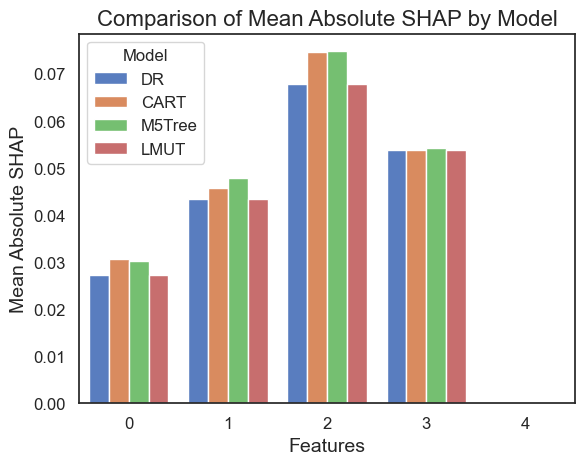

In [106]:
sns.set(style='white')
palette = sns.color_palette("muted")

sns_plot = sns.barplot(x='Features', y='Mean Absolute SHAP', hue='Model', data=df, palette=palette)
sns_plot.set_title("Comparison of Mean Absolute SHAP by Model", fontsize=16)
sns_plot.set_xlabel('Features', fontsize=14)
sns_plot.set_ylabel('Mean Absolute SHAP', fontsize=14)
sns_plot.tick_params(axis='x', labelsize=12)
sns_plot.tick_params(axis='y', labelsize=12)
sns_plot.legend(title='Model', fontsize=12)
sns_plot.figure.savefig(f"{estimator}_{competition}.png")

In [107]:
mean_abs_shap_m5

[0.03020135137013132,
 0.04783031947196069,
 0.07476263815716475,
 0.054163165776054706,
 0.0]

In [108]:
mean_abs_shap_utree

[0.027220920625072195,
 0.043424841929201284,
 0.06785853141417528,
 0.05379587276341679,
 0.0]